In [330]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from catboost import Pool, CatBoostClassifier, cv

In [331]:
def display(y_test,y_pred):
    plt.figure(figsize=(10,8))
    plt.title('PREDICTION VS ACTUAL ', fontsize=24 , fontstyle='italic')
    plt.plot(range(len(y_test)), np.sort(y_test), '.')
    plt.plot(range(len(y_test)),np.sort(y_pred),c='r')
    plt.show()

In [332]:
def score(y_pred,y_test,print_range=0.91):
    from sklearn.metrics import confusion_matrix , accuracy_score
    print('confusion_matrix : ', confusion_matrix(y_pred,y_test))
    print('Accuracy         : ', accuracy_score(y_pred,y_test))
    return accuracy_score(y_pred,y_test)

In [333]:
def hypothesis(model):
    try:
        print(type(model).__name__,' Model coefficient ',model.coef_)
        print(type(model).__name__,' Model collinearity ',model.intercept_)
    except:
        print(type(model).__name__,' Has no coefficient and collinearity')

In [334]:
def outliers_with_IQR(data,key,kernal=1.5):
    import statistics
    med = int(len(data[key])/2)
    sorted_data = sorted(data[key])
    Q1 = statistics.median(sorted_data[:med])
    Q2 = statistics.median(sorted_data[med:])
    iqr = Q2 - Q1
    outliers_range_1 = Q1 - iqr*kernal
    outliers_range_2 = Q2 + iqr*kernal
    data = data[data[key]>outliers_range_1]
    data = data[data[key]<outliers_range_2]
    return data

In [335]:
def outliers_with_IQR(data,keys,kernal=1.5):
    import statistics
    for key in keys:
        med = int(len(data[key])/2)
        sorted_data = sorted(data[key])
        Q1 = statistics.median(sorted_data[:med])
        Q2 = statistics.median(sorted_data[med:])
        iqr = Q2 - Q1
        outliers_range_1 = Q1 - iqr*kernal
        outliers_range_2 = Q2 + iqr*kernal
        data = data[data[key]>outliers_range_1]
        data = data[data[key]<outliers_range_2]

    return data

In [336]:
## Get Data

In [337]:
dataSet = pd.read_csv('heart.csv')

In [338]:
# Check labeled data

In [339]:
dataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [340]:
# Check Nullable Data

In [341]:
dataSet.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [342]:
# Split Data To Features and targets

In [343]:
X = dataSet.iloc[:,[0,2,3,4,7,8,9,12]].values
y = dataSet.iloc[:,-1].values


In [344]:
np.info(X)

class:  ndarray
shape:  (303, 8)
strides:  (8, 2424)
itemsize:  8
aligned:  True
contiguous:  False
fortran:  True
data pointer: 0x166cf099010
byteorder:  little
byteswap:  False
type: float64


In [345]:
pd.DataFrame(X).describe()

,0,1,2,3,4,5,6,7
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.966997,131.623762,246.264026,149.646865,0.326733,1.039604,2.313531
std,9.082101,1.032052,17.538143,51.830751,22.905161,0.469794,1.161075,0.612277
min,29.000000,0.000000,94.000000,126.000000,71.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,120.000000,211.000000,133.500000,0.000000,0.000000,2.000000
50%,55.000000,1.000000,130.000000,240.000000,153.000000,0.000000,0.800000,2.000000
75%,61.000000,2.000000,140.000000,274.500000,166.000000,1.000000,1.600000,3.000000
max,77.000000,3.000000,200.000000,564.000000,202.000000,1.000000,6.200000,3.000000


In [346]:
pd.DataFrame(X).describe()

,0,1,2,3,4,5,6,7
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.966997,131.623762,246.264026,149.646865,0.326733,1.039604,2.313531
std,9.082101,1.032052,17.538143,51.830751,22.905161,0.469794,1.161075,0.612277
min,29.000000,0.000000,94.000000,126.000000,71.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,120.000000,211.000000,133.500000,0.000000,0.000000,2.000000
50%,55.000000,1.000000,130.000000,240.000000,153.000000,0.000000,0.800000,2.000000
75%,61.000000,2.000000,140.000000,274.500000,166.000000,1.000000,1.600000,3.000000
max,77.000000,3.000000,200.000000,564.000000,202.000000,1.000000,6.200000,3.000000


C:\Users\Geek\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000166D4FBFDA0>,
      dtype=object)

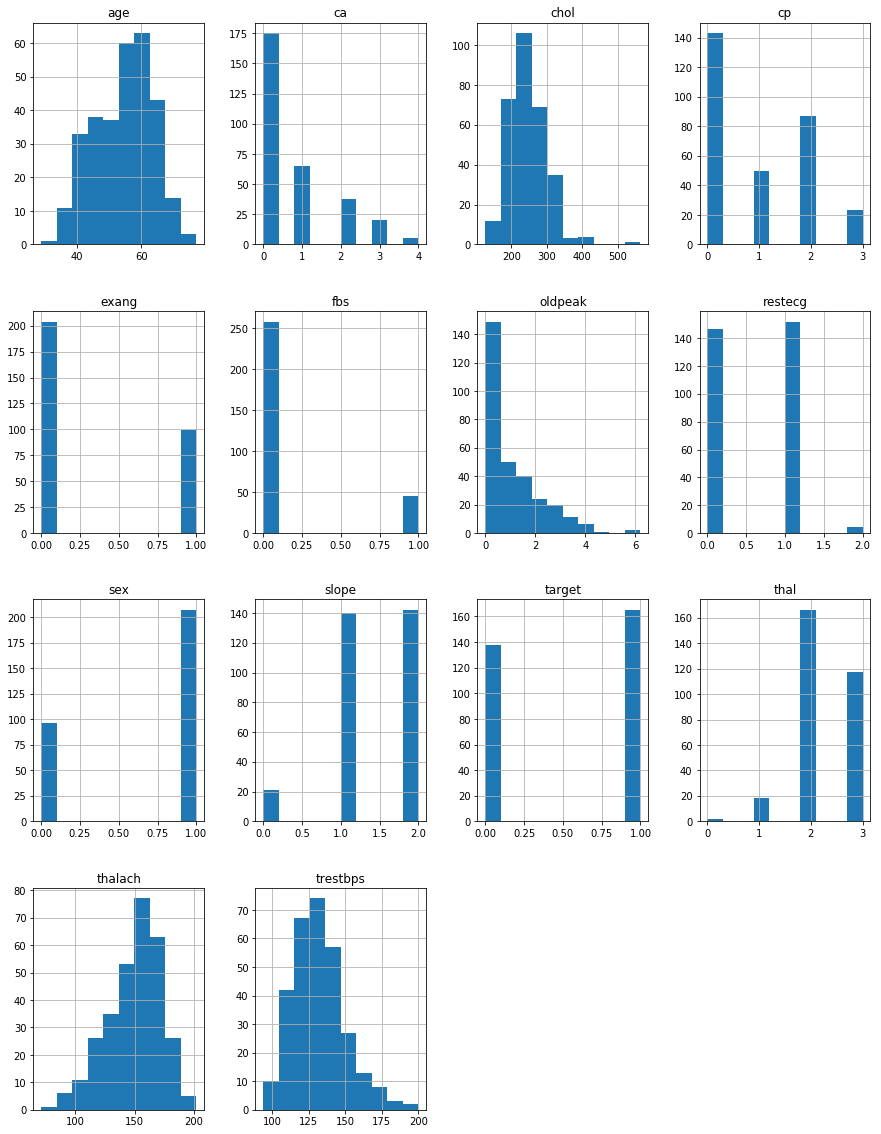

In [347]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
dataSet.hist(ax = ax)

In [349]:
for x in range(1000):
    
    from sklearn.model_selection import train_test_split
    X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=.2,random_state=x)
    for i in range(1000):
        print('split and model is ',x,i)
        model = RandomForestClassifier(n_estimators=65,random_state=i)
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        score(y_pred,y_test)

        

split and model is  0 0
confusion_matrix :  [[22  5]
 [ 5 29]]
Accuracy         :  0.8360655737704918
split and model is  0 1
confusion_matrix :  [[23  3]
 [ 4 31]]
Accuracy         :  0.8852459016393442
split and model is  0 2
confusion_matrix :  [[22  4]
 [ 5 30]]
Accuracy         :  0.8524590163934426
split and model is  0 3
confusion_matrix :  [[23  4]
 [ 4 30]]
Accuracy         :  0.8688524590163934
split and model is  0 4
confusion_matrix :  [[24  5]
 [ 3 29]]
Accuracy         :  0.8688524590163934
split and model is  0 5
confusion_matrix :  [[24  2]
 [ 3 32]]
Accuracy         :  0.9180327868852459
split and model is  0 6
confusion_matrix :  [[24  4]
 [ 3 30]]
Accuracy         :  0.8852459016393442
split and model is  0 7
confusion_matrix :  [[23  2]
 [ 4 32]]
Accuracy         :  0.9016393442622951
split and model is  0 8
confusion_matrix :  [[24  4]
 [ 3 30]]
Accuracy         :  0.8852459016393442
split and model is  0 9
confusion_matrix :  [[22  3]
 [ 5 31]]
Accuracy         : 

confusion_matrix :  [[23  3]
 [ 4 31]]
Accuracy         :  0.8852459016393442
split and model is  0 81
confusion_matrix :  [[23  4]
 [ 4 30]]
Accuracy         :  0.8688524590163934
split and model is  0 82
confusion_matrix :  [[21  3]
 [ 6 31]]
Accuracy         :  0.8524590163934426
split and model is  0 83
confusion_matrix :  [[24  3]
 [ 3 31]]
Accuracy         :  0.9016393442622951
split and model is  0 84
confusion_matrix :  [[23  5]
 [ 4 29]]
Accuracy         :  0.8524590163934426
split and model is  0 85
confusion_matrix :  [[23  4]
 [ 4 30]]
Accuracy         :  0.8688524590163934
split and model is  0 86
confusion_matrix :  [[24  3]
 [ 3 31]]
Accuracy         :  0.9016393442622951
split and model is  0 87
confusion_matrix :  [[23  3]
 [ 4 31]]
Accuracy         :  0.8852459016393442
split and model is  0 88
confusion_matrix :  [[23  2]
 [ 4 32]]
Accuracy         :  0.9016393442622951
split and model is  0 89
confusion_matrix :  [[24  5]
 [ 3 29]]
Accuracy         :  0.868852459016

confusion_matrix :  [[22  6]
 [ 5 28]]
Accuracy         :  0.819672131147541
split and model is  0 160
confusion_matrix :  [[24  2]
 [ 3 32]]
Accuracy         :  0.9180327868852459
split and model is  0 161
confusion_matrix :  [[21  3]
 [ 6 31]]
Accuracy         :  0.8524590163934426
split and model is  0 162
confusion_matrix :  [[21  3]
 [ 6 31]]
Accuracy         :  0.8524590163934426
split and model is  0 163
confusion_matrix :  [[22  2]
 [ 5 32]]
Accuracy         :  0.8852459016393442
split and model is  0 164
confusion_matrix :  [[23  5]
 [ 4 29]]
Accuracy         :  0.8524590163934426
split and model is  0 165
confusion_matrix :  [[22  4]
 [ 5 30]]
Accuracy         :  0.8524590163934426
split and model is  0 166
confusion_matrix :  [[24  4]
 [ 3 30]]
Accuracy         :  0.8852459016393442
split and model is  0 167
confusion_matrix :  [[23  4]
 [ 4 30]]
Accuracy         :  0.8688524590163934
split and model is  0 168
confusion_matrix :  [[23  4]
 [ 4 30]]
Accuracy         :  0.8688

confusion_matrix :  [[23  4]
 [ 4 30]]
Accuracy         :  0.8688524590163934
split and model is  0 239
confusion_matrix :  [[24  3]
 [ 3 31]]
Accuracy         :  0.9016393442622951
split and model is  0 240
confusion_matrix :  [[22  3]
 [ 5 31]]
Accuracy         :  0.8688524590163934
split and model is  0 241
confusion_matrix :  [[22  3]
 [ 5 31]]
Accuracy         :  0.8688524590163934
split and model is  0 242
confusion_matrix :  [[23  3]
 [ 4 31]]
Accuracy         :  0.8852459016393442
split and model is  0 243
confusion_matrix :  [[22  4]
 [ 5 30]]
Accuracy         :  0.8524590163934426
split and model is  0 244
confusion_matrix :  [[25  2]
 [ 2 32]]
Accuracy         :  0.9344262295081968
split and model is  0 245
confusion_matrix :  [[24  3]
 [ 3 31]]
Accuracy         :  0.9016393442622951
split and model is  0 246
confusion_matrix :  [[23  4]
 [ 4 30]]
Accuracy         :  0.8688524590163934
split and model is  0 247
confusion_matrix :  [[22  3]
 [ 5 31]]
Accuracy         :  0.868

confusion_matrix :  [[23  4]
 [ 4 30]]
Accuracy         :  0.8688524590163934
split and model is  0 320
confusion_matrix :  [[22  4]
 [ 5 30]]
Accuracy         :  0.8524590163934426
split and model is  0 321
confusion_matrix :  [[23  5]
 [ 4 29]]
Accuracy         :  0.8524590163934426
split and model is  0 322
confusion_matrix :  [[24  3]
 [ 3 31]]
Accuracy         :  0.9016393442622951
split and model is  0 323
confusion_matrix :  [[23  3]
 [ 4 31]]
Accuracy         :  0.8852459016393442
split and model is  0 324
confusion_matrix :  [[22  3]
 [ 5 31]]
Accuracy         :  0.8688524590163934
split and model is  0 325
confusion_matrix :  [[24  4]
 [ 3 30]]
Accuracy         :  0.8852459016393442
split and model is  0 326
confusion_matrix :  [[23  3]
 [ 4 31]]
Accuracy         :  0.8852459016393442
split and model is  0 327
confusion_matrix :  [[25  5]
 [ 2 29]]
Accuracy         :  0.8852459016393442
split and model is  0 328
confusion_matrix :  [[21  2]
 [ 6 32]]
Accuracy         :  0.868

confusion_matrix :  [[20  5]
 [ 7 29]]
Accuracy         :  0.8032786885245902
split and model is  0 401
confusion_matrix :  [[23  3]
 [ 4 31]]
Accuracy         :  0.8852459016393442
split and model is  0 402
confusion_matrix :  [[24  4]
 [ 3 30]]
Accuracy         :  0.8852459016393442
split and model is  0 403
confusion_matrix :  [[23  2]
 [ 4 32]]
Accuracy         :  0.9016393442622951
split and model is  0 404
confusion_matrix :  [[24  3]
 [ 3 31]]
Accuracy         :  0.9016393442622951
split and model is  0 405
confusion_matrix :  [[24  3]
 [ 3 31]]
Accuracy         :  0.9016393442622951
split and model is  0 406
confusion_matrix :  [[23  3]
 [ 4 31]]
Accuracy         :  0.8852459016393442
split and model is  0 407
confusion_matrix :  [[21  3]
 [ 6 31]]
Accuracy         :  0.8524590163934426
split and model is  0 408
confusion_matrix :  [[23  5]
 [ 4 29]]
Accuracy         :  0.8524590163934426
split and model is  0 409
confusion_matrix :  [[21  3]
 [ 6 31]]
Accuracy         :  0.852

confusion_matrix :  [[23  6]
 [ 4 28]]
Accuracy         :  0.8360655737704918
split and model is  0 482
confusion_matrix :  [[22  5]
 [ 5 29]]
Accuracy         :  0.8360655737704918
split and model is  0 483
confusion_matrix :  [[22  3]
 [ 5 31]]
Accuracy         :  0.8688524590163934
split and model is  0 484
confusion_matrix :  [[24  3]
 [ 3 31]]
Accuracy         :  0.9016393442622951
split and model is  0 485
confusion_matrix :  [[25  3]
 [ 2 31]]
Accuracy         :  0.9180327868852459
split and model is  0 486
confusion_matrix :  [[22  4]
 [ 5 30]]
Accuracy         :  0.8524590163934426
split and model is  0 487
confusion_matrix :  [[22  5]
 [ 5 29]]
Accuracy         :  0.8360655737704918
split and model is  0 488
confusion_matrix :  [[25  4]
 [ 2 30]]
Accuracy         :  0.9016393442622951
split and model is  0 489
confusion_matrix :  [[22  5]
 [ 5 29]]
Accuracy         :  0.8360655737704918
split and model is  0 490
confusion_matrix :  [[22  2]
 [ 5 32]]
Accuracy         :  0.885

confusion_matrix :  [[23  5]
 [ 4 29]]
Accuracy         :  0.8524590163934426
split and model is  0 561
confusion_matrix :  [[24  5]
 [ 3 29]]
Accuracy         :  0.8688524590163934
split and model is  0 562
confusion_matrix :  [[23  3]
 [ 4 31]]
Accuracy         :  0.8852459016393442
split and model is  0 563
confusion_matrix :  [[24  2]
 [ 3 32]]
Accuracy         :  0.9180327868852459
split and model is  0 564
confusion_matrix :  [[23  5]
 [ 4 29]]
Accuracy         :  0.8524590163934426
split and model is  0 565
confusion_matrix :  [[23  5]
 [ 4 29]]
Accuracy         :  0.8524590163934426
split and model is  0 566
confusion_matrix :  [[22  4]
 [ 5 30]]
Accuracy         :  0.8524590163934426
split and model is  0 567
confusion_matrix :  [[22  5]
 [ 5 29]]
Accuracy         :  0.8360655737704918
split and model is  0 568
confusion_matrix :  [[23  3]
 [ 4 31]]
Accuracy         :  0.8852459016393442
split and model is  0 569
confusion_matrix :  [[22  5]
 [ 5 29]]
Accuracy         :  0.836

confusion_matrix :  [[21  1]
 [ 6 33]]
Accuracy         :  0.8852459016393442
split and model is  0 641
confusion_matrix :  [[21  3]
 [ 6 31]]
Accuracy         :  0.8524590163934426
split and model is  0 642
confusion_matrix :  [[23  4]
 [ 4 30]]
Accuracy         :  0.8688524590163934
split and model is  0 643
confusion_matrix :  [[22  2]
 [ 5 32]]
Accuracy         :  0.8852459016393442
split and model is  0 644
confusion_matrix :  [[22  4]
 [ 5 30]]
Accuracy         :  0.8524590163934426
split and model is  0 645
confusion_matrix :  [[24  4]
 [ 3 30]]
Accuracy         :  0.8852459016393442
split and model is  0 646
confusion_matrix :  [[23  3]
 [ 4 31]]
Accuracy         :  0.8852459016393442
split and model is  0 647
confusion_matrix :  [[23  1]
 [ 4 33]]
Accuracy         :  0.9180327868852459
split and model is  0 648
confusion_matrix :  [[24  4]
 [ 3 30]]
Accuracy         :  0.8852459016393442
split and model is  0 649
confusion_matrix :  [[23  4]
 [ 4 30]]
Accuracy         :  0.868

confusion_matrix :  [[24  3]
 [ 3 31]]
Accuracy         :  0.9016393442622951
split and model is  0 722
confusion_matrix :  [[22  2]
 [ 5 32]]
Accuracy         :  0.8852459016393442
split and model is  0 723
confusion_matrix :  [[23  3]
 [ 4 31]]
Accuracy         :  0.8852459016393442
split and model is  0 724
confusion_matrix :  [[24  3]
 [ 3 31]]
Accuracy         :  0.9016393442622951
split and model is  0 725
confusion_matrix :  [[23  3]
 [ 4 31]]
Accuracy         :  0.8852459016393442
split and model is  0 726
confusion_matrix :  [[22  2]
 [ 5 32]]
Accuracy         :  0.8852459016393442
split and model is  0 727
confusion_matrix :  [[24  4]
 [ 3 30]]
Accuracy         :  0.8852459016393442
split and model is  0 728
confusion_matrix :  [[24  5]
 [ 3 29]]
Accuracy         :  0.8688524590163934
split and model is  0 729
confusion_matrix :  [[23  4]
 [ 4 30]]
Accuracy         :  0.8688524590163934
split and model is  0 730
confusion_matrix :  [[23  3]
 [ 4 31]]
Accuracy         :  0.885

confusion_matrix :  [[23  4]
 [ 4 30]]
Accuracy         :  0.8688524590163934
split and model is  0 802
confusion_matrix :  [[22  3]
 [ 5 31]]
Accuracy         :  0.8688524590163934
split and model is  0 803
confusion_matrix :  [[22  3]
 [ 5 31]]
Accuracy         :  0.8688524590163934
split and model is  0 804
confusion_matrix :  [[21  3]
 [ 6 31]]
Accuracy         :  0.8524590163934426
split and model is  0 805
confusion_matrix :  [[23  4]
 [ 4 30]]
Accuracy         :  0.8688524590163934
split and model is  0 806
confusion_matrix :  [[24  6]
 [ 3 28]]
Accuracy         :  0.8524590163934426
split and model is  0 807
confusion_matrix :  [[23  4]
 [ 4 30]]
Accuracy         :  0.8688524590163934
split and model is  0 808
confusion_matrix :  [[23  3]
 [ 4 31]]
Accuracy         :  0.8852459016393442
split and model is  0 809
confusion_matrix :  [[21  2]
 [ 6 32]]
Accuracy         :  0.8688524590163934
split and model is  0 810
confusion_matrix :  [[24  2]
 [ 3 32]]
Accuracy         :  0.918

confusion_matrix :  [[23  2]
 [ 4 32]]
Accuracy         :  0.9016393442622951
split and model is  0 883
confusion_matrix :  [[22  3]
 [ 5 31]]
Accuracy         :  0.8688524590163934
split and model is  0 884
confusion_matrix :  [[22  2]
 [ 5 32]]
Accuracy         :  0.8852459016393442
split and model is  0 885
confusion_matrix :  [[24  4]
 [ 3 30]]
Accuracy         :  0.8852459016393442
split and model is  0 886
confusion_matrix :  [[22  6]
 [ 5 28]]
Accuracy         :  0.819672131147541
split and model is  0 887
confusion_matrix :  [[23  5]
 [ 4 29]]
Accuracy         :  0.8524590163934426
split and model is  0 888
confusion_matrix :  [[22  3]
 [ 5 31]]
Accuracy         :  0.8688524590163934
split and model is  0 889
confusion_matrix :  [[23  5]
 [ 4 29]]
Accuracy         :  0.8524590163934426
split and model is  0 890
confusion_matrix :  [[22  2]
 [ 5 32]]
Accuracy         :  0.8852459016393442
split and model is  0 891
confusion_matrix :  [[24  2]
 [ 3 32]]
Accuracy         :  0.9180

confusion_matrix :  [[22  5]
 [ 5 29]]
Accuracy         :  0.8360655737704918
split and model is  0 964
confusion_matrix :  [[25  4]
 [ 2 30]]
Accuracy         :  0.9016393442622951
split and model is  0 965
confusion_matrix :  [[22  5]
 [ 5 29]]
Accuracy         :  0.8360655737704918
split and model is  0 966
confusion_matrix :  [[22  4]
 [ 5 30]]
Accuracy         :  0.8524590163934426
split and model is  0 967
confusion_matrix :  [[21  4]
 [ 6 30]]
Accuracy         :  0.8360655737704918
split and model is  0 968
confusion_matrix :  [[24  4]
 [ 3 30]]
Accuracy         :  0.8852459016393442
split and model is  0 969
confusion_matrix :  [[22  3]
 [ 5 31]]
Accuracy         :  0.8688524590163934
split and model is  0 970
confusion_matrix :  [[22  6]
 [ 5 28]]
Accuracy         :  0.819672131147541
split and model is  0 971
confusion_matrix :  [[23  4]
 [ 4 30]]
Accuracy         :  0.8688524590163934
split and model is  0 972
confusion_matrix :  [[23  3]
 [ 4 31]]
Accuracy         :  0.8852

confusion_matrix :  [[22  9]
 [ 8 22]]
Accuracy         :  0.7213114754098361
split and model is  1 45
confusion_matrix :  [[20  7]
 [10 24]]
Accuracy         :  0.7213114754098361
split and model is  1 46
confusion_matrix :  [[20  8]
 [10 23]]
Accuracy         :  0.7049180327868853
split and model is  1 47
confusion_matrix :  [[19  8]
 [11 23]]
Accuracy         :  0.6885245901639344
split and model is  1 48
confusion_matrix :  [[19  9]
 [11 22]]
Accuracy         :  0.6721311475409836
split and model is  1 49
confusion_matrix :  [[19  8]
 [11 23]]
Accuracy         :  0.6885245901639344
split and model is  1 50
confusion_matrix :  [[20  9]
 [10 22]]
Accuracy         :  0.6885245901639344
split and model is  1 51
confusion_matrix :  [[20  7]
 [10 24]]
Accuracy         :  0.7213114754098361
split and model is  1 52
confusion_matrix :  [[21  6]
 [ 9 25]]
Accuracy         :  0.7540983606557377
split and model is  1 53
confusion_matrix :  [[19  7]
 [11 24]]
Accuracy         :  0.704918032786

confusion_matrix :  [[19  7]
 [11 24]]
Accuracy         :  0.7049180327868853
split and model is  1 126
confusion_matrix :  [[19  9]
 [11 22]]
Accuracy         :  0.6721311475409836
split and model is  1 127
confusion_matrix :  [[19  7]
 [11 24]]
Accuracy         :  0.7049180327868853
split and model is  1 128
confusion_matrix :  [[21  8]
 [ 9 23]]
Accuracy         :  0.7213114754098361
split and model is  1 129
confusion_matrix :  [[19  8]
 [11 23]]
Accuracy         :  0.6885245901639344
split and model is  1 130
confusion_matrix :  [[21  7]
 [ 9 24]]
Accuracy         :  0.7377049180327869
split and model is  1 131
confusion_matrix :  [[19  8]
 [11 23]]
Accuracy         :  0.6885245901639344
split and model is  1 132
confusion_matrix :  [[19  9]
 [11 22]]
Accuracy         :  0.6721311475409836
split and model is  1 133
confusion_matrix :  [[20  7]
 [10 24]]
Accuracy         :  0.7213114754098361
split and model is  1 134
confusion_matrix :  [[18  8]
 [12 23]]
Accuracy         :  0.672

confusion_matrix :  [[20  8]
 [10 23]]
Accuracy         :  0.7049180327868853
split and model is  1 206
confusion_matrix :  [[19  7]
 [11 24]]
Accuracy         :  0.7049180327868853
split and model is  1 207
confusion_matrix :  [[20  7]
 [10 24]]
Accuracy         :  0.7213114754098361
split and model is  1 208
confusion_matrix :  [[19  7]
 [11 24]]
Accuracy         :  0.7049180327868853
split and model is  1 209
confusion_matrix :  [[18  6]
 [12 25]]
Accuracy         :  0.7049180327868853
split and model is  1 210
confusion_matrix :  [[20  7]
 [10 24]]
Accuracy         :  0.7213114754098361
split and model is  1 211
confusion_matrix :  [[20  8]
 [10 23]]
Accuracy         :  0.7049180327868853
split and model is  1 212
confusion_matrix :  [[20  8]
 [10 23]]
Accuracy         :  0.7049180327868853
split and model is  1 213
confusion_matrix :  [[19  9]
 [11 22]]
Accuracy         :  0.6721311475409836
split and model is  1 214
confusion_matrix :  [[20  7]
 [10 24]]
Accuracy         :  0.721

confusion_matrix :  [[18  9]
 [12 22]]
Accuracy         :  0.6557377049180327
split and model is  1 285
confusion_matrix :  [[19  7]
 [11 24]]
Accuracy         :  0.7049180327868853
split and model is  1 286
confusion_matrix :  [[20  8]
 [10 23]]
Accuracy         :  0.7049180327868853
split and model is  1 287
confusion_matrix :  [[18  7]
 [12 24]]
Accuracy         :  0.6885245901639344
split and model is  1 288
confusion_matrix :  [[18  7]
 [12 24]]
Accuracy         :  0.6885245901639344
split and model is  1 289
confusion_matrix :  [[18  7]
 [12 24]]
Accuracy         :  0.6885245901639344
split and model is  1 290
confusion_matrix :  [[20  8]
 [10 23]]
Accuracy         :  0.7049180327868853
split and model is  1 291
confusion_matrix :  [[19  8]
 [11 23]]
Accuracy         :  0.6885245901639344
split and model is  1 292
confusion_matrix :  [[20  8]
 [10 23]]
Accuracy         :  0.7049180327868853
split and model is  1 293
confusion_matrix :  [[20  8]
 [10 23]]
Accuracy         :  0.704

confusion_matrix :  [[20  7]
 [10 24]]
Accuracy         :  0.7213114754098361
split and model is  1 365
confusion_matrix :  [[19  9]
 [11 22]]
Accuracy         :  0.6721311475409836
split and model is  1 366
confusion_matrix :  [[20  8]
 [10 23]]
Accuracy         :  0.7049180327868853
split and model is  1 367
confusion_matrix :  [[20  7]
 [10 24]]
Accuracy         :  0.7213114754098361
split and model is  1 368
confusion_matrix :  [[21  7]
 [ 9 24]]
Accuracy         :  0.7377049180327869
split and model is  1 369
confusion_matrix :  [[18  7]
 [12 24]]
Accuracy         :  0.6885245901639344
split and model is  1 370
confusion_matrix :  [[19  8]
 [11 23]]
Accuracy         :  0.6885245901639344
split and model is  1 371
confusion_matrix :  [[22  7]
 [ 8 24]]
Accuracy         :  0.7540983606557377
split and model is  1 372
confusion_matrix :  [[19  8]
 [11 23]]
Accuracy         :  0.6885245901639344
split and model is  1 373
confusion_matrix :  [[20  8]
 [10 23]]
Accuracy         :  0.704

confusion_matrix :  [[21  8]
 [ 9 23]]
Accuracy         :  0.7213114754098361
split and model is  1 445
confusion_matrix :  [[19  6]
 [11 25]]
Accuracy         :  0.7213114754098361
split and model is  1 446
confusion_matrix :  [[19  7]
 [11 24]]
Accuracy         :  0.7049180327868853
split and model is  1 447
confusion_matrix :  [[19  7]
 [11 24]]
Accuracy         :  0.7049180327868853
split and model is  1 448
confusion_matrix :  [[19  7]
 [11 24]]
Accuracy         :  0.7049180327868853
split and model is  1 449
confusion_matrix :  [[21  7]
 [ 9 24]]
Accuracy         :  0.7377049180327869
split and model is  1 450
confusion_matrix :  [[20  8]
 [10 23]]
Accuracy         :  0.7049180327868853
split and model is  1 451
confusion_matrix :  [[18  8]
 [12 23]]
Accuracy         :  0.6721311475409836
split and model is  1 452
confusion_matrix :  [[19  8]
 [11 23]]
Accuracy         :  0.6885245901639344
split and model is  1 453
confusion_matrix :  [[20  8]
 [10 23]]
Accuracy         :  0.704

confusion_matrix :  [[19  7]
 [11 24]]
Accuracy         :  0.7049180327868853
split and model is  1 524
confusion_matrix :  [[20  9]
 [10 22]]
Accuracy         :  0.6885245901639344
split and model is  1 525
confusion_matrix :  [[21  8]
 [ 9 23]]
Accuracy         :  0.7213114754098361
split and model is  1 526
confusion_matrix :  [[19 10]
 [11 21]]
Accuracy         :  0.6557377049180327
split and model is  1 527
confusion_matrix :  [[19  9]
 [11 22]]
Accuracy         :  0.6721311475409836
split and model is  1 528
confusion_matrix :  [[20  9]
 [10 22]]
Accuracy         :  0.6885245901639344
split and model is  1 529
confusion_matrix :  [[19  6]
 [11 25]]
Accuracy         :  0.7213114754098361
split and model is  1 530
confusion_matrix :  [[19  9]
 [11 22]]
Accuracy         :  0.6721311475409836
split and model is  1 531
confusion_matrix :  [[19  8]
 [11 23]]
Accuracy         :  0.6885245901639344
split and model is  1 532
confusion_matrix :  [[22 10]
 [ 8 21]]
Accuracy         :  0.704

confusion_matrix :  [[18  8]
 [12 23]]
Accuracy         :  0.6721311475409836
split and model is  1 603
confusion_matrix :  [[19  7]
 [11 24]]
Accuracy         :  0.7049180327868853
split and model is  1 604
confusion_matrix :  [[19  7]
 [11 24]]
Accuracy         :  0.7049180327868853
split and model is  1 605
confusion_matrix :  [[19 10]
 [11 21]]
Accuracy         :  0.6557377049180327
split and model is  1 606
confusion_matrix :  [[20  8]
 [10 23]]
Accuracy         :  0.7049180327868853
split and model is  1 607
confusion_matrix :  [[20  8]
 [10 23]]
Accuracy         :  0.7049180327868853
split and model is  1 608
confusion_matrix :  [[20  8]
 [10 23]]
Accuracy         :  0.7049180327868853
split and model is  1 609
confusion_matrix :  [[20  9]
 [10 22]]
Accuracy         :  0.6885245901639344
split and model is  1 610
confusion_matrix :  [[19  7]
 [11 24]]
Accuracy         :  0.7049180327868853
split and model is  1 611
confusion_matrix :  [[20  8]
 [10 23]]
Accuracy         :  0.704

confusion_matrix :  [[20  6]
 [10 25]]
Accuracy         :  0.7377049180327869
split and model is  1 682
confusion_matrix :  [[18  8]
 [12 23]]
Accuracy         :  0.6721311475409836
split and model is  1 683
confusion_matrix :  [[19  8]
 [11 23]]
Accuracy         :  0.6885245901639344
split and model is  1 684
confusion_matrix :  [[19  8]
 [11 23]]
Accuracy         :  0.6885245901639344
split and model is  1 685
confusion_matrix :  [[19  7]
 [11 24]]
Accuracy         :  0.7049180327868853
split and model is  1 686
confusion_matrix :  [[20  8]
 [10 23]]
Accuracy         :  0.7049180327868853
split and model is  1 687
confusion_matrix :  [[19  8]
 [11 23]]
Accuracy         :  0.6885245901639344
split and model is  1 688
confusion_matrix :  [[21  7]
 [ 9 24]]
Accuracy         :  0.7377049180327869
split and model is  1 689
confusion_matrix :  [[21  7]
 [ 9 24]]
Accuracy         :  0.7377049180327869
split and model is  1 690
confusion_matrix :  [[18  7]
 [12 24]]
Accuracy         :  0.688

confusion_matrix :  [[18  8]
 [12 23]]
Accuracy         :  0.6721311475409836
split and model is  1 762
confusion_matrix :  [[19  8]
 [11 23]]
Accuracy         :  0.6885245901639344
split and model is  1 763
confusion_matrix :  [[21  8]
 [ 9 23]]
Accuracy         :  0.7213114754098361
split and model is  1 764
confusion_matrix :  [[21  8]
 [ 9 23]]
Accuracy         :  0.7213114754098361
split and model is  1 765
confusion_matrix :  [[20  9]
 [10 22]]
Accuracy         :  0.6885245901639344
split and model is  1 766
confusion_matrix :  [[19  7]
 [11 24]]
Accuracy         :  0.7049180327868853
split and model is  1 767
confusion_matrix :  [[19  9]
 [11 22]]
Accuracy         :  0.6721311475409836
split and model is  1 768
confusion_matrix :  [[19  6]
 [11 25]]
Accuracy         :  0.7213114754098361
split and model is  1 769
confusion_matrix :  [[20  8]
 [10 23]]
Accuracy         :  0.7049180327868853
split and model is  1 770
confusion_matrix :  [[20  8]
 [10 23]]
Accuracy         :  0.704

confusion_matrix :  [[19  8]
 [11 23]]
Accuracy         :  0.6885245901639344
split and model is  1 841
confusion_matrix :  [[19  8]
 [11 23]]
Accuracy         :  0.6885245901639344
split and model is  1 842
confusion_matrix :  [[19  8]
 [11 23]]
Accuracy         :  0.6885245901639344
split and model is  1 843
confusion_matrix :  [[19  9]
 [11 22]]
Accuracy         :  0.6721311475409836
split and model is  1 844
confusion_matrix :  [[20  8]
 [10 23]]
Accuracy         :  0.7049180327868853
split and model is  1 845
confusion_matrix :  [[17  8]
 [13 23]]
Accuracy         :  0.6557377049180327
split and model is  1 846
confusion_matrix :  [[21  9]
 [ 9 22]]
Accuracy         :  0.7049180327868853
split and model is  1 847
confusion_matrix :  [[20  8]
 [10 23]]
Accuracy         :  0.7049180327868853
split and model is  1 848
confusion_matrix :  [[19  8]
 [11 23]]
Accuracy         :  0.6885245901639344
split and model is  1 849
confusion_matrix :  [[19  8]
 [11 23]]
Accuracy         :  0.688

confusion_matrix :  [[18  9]
 [12 22]]
Accuracy         :  0.6557377049180327
split and model is  1 920
confusion_matrix :  [[19  6]
 [11 25]]
Accuracy         :  0.7213114754098361
split and model is  1 921
confusion_matrix :  [[20  7]
 [10 24]]
Accuracy         :  0.7213114754098361
split and model is  1 922
confusion_matrix :  [[20  9]
 [10 22]]
Accuracy         :  0.6885245901639344
split and model is  1 923
confusion_matrix :  [[19  7]
 [11 24]]
Accuracy         :  0.7049180327868853
split and model is  1 924
confusion_matrix :  [[18  8]
 [12 23]]
Accuracy         :  0.6721311475409836
split and model is  1 925
confusion_matrix :  [[19  8]
 [11 23]]
Accuracy         :  0.6885245901639344
split and model is  1 926
confusion_matrix :  [[19  8]
 [11 23]]
Accuracy         :  0.6885245901639344
split and model is  1 927
confusion_matrix :  [[20  7]
 [10 24]]
Accuracy         :  0.7213114754098361
split and model is  1 928
confusion_matrix :  [[20  8]
 [10 23]]
Accuracy         :  0.704

confusion_matrix :  [[27  3]
 [ 5 26]]
Accuracy         :  0.8688524590163934
split and model is  2 1
confusion_matrix :  [[25  3]
 [ 7 26]]
Accuracy         :  0.8360655737704918
split and model is  2 2
confusion_matrix :  [[25  2]
 [ 7 27]]
Accuracy         :  0.8524590163934426
split and model is  2 3
confusion_matrix :  [[27  3]
 [ 5 26]]
Accuracy         :  0.8688524590163934
split and model is  2 4
confusion_matrix :  [[25  3]
 [ 7 26]]
Accuracy         :  0.8360655737704918
split and model is  2 5
confusion_matrix :  [[26  3]
 [ 6 26]]
Accuracy         :  0.8524590163934426
split and model is  2 6
confusion_matrix :  [[26  2]
 [ 6 27]]
Accuracy         :  0.8688524590163934
split and model is  2 7
confusion_matrix :  [[26  2]
 [ 6 27]]
Accuracy         :  0.8688524590163934
split and model is  2 8
confusion_matrix :  [[27  2]
 [ 5 27]]
Accuracy         :  0.8852459016393442
split and model is  2 9
confusion_matrix :  [[26  2]
 [ 6 27]]
Accuracy         :  0.8688524590163934
spli

confusion_matrix :  [[27  4]
 [ 5 25]]
Accuracy         :  0.8524590163934426
split and model is  2 83
confusion_matrix :  [[25  3]
 [ 7 26]]
Accuracy         :  0.8360655737704918
split and model is  2 84
confusion_matrix :  [[26  2]
 [ 6 27]]
Accuracy         :  0.8688524590163934
split and model is  2 85
confusion_matrix :  [[27  3]
 [ 5 26]]
Accuracy         :  0.8688524590163934
split and model is  2 86
confusion_matrix :  [[25  4]
 [ 7 25]]
Accuracy         :  0.819672131147541
split and model is  2 87
confusion_matrix :  [[26  2]
 [ 6 27]]
Accuracy         :  0.8688524590163934
split and model is  2 88
confusion_matrix :  [[24  4]
 [ 8 25]]
Accuracy         :  0.8032786885245902
split and model is  2 89
confusion_matrix :  [[25  4]
 [ 7 25]]
Accuracy         :  0.819672131147541
split and model is  2 90
confusion_matrix :  [[26  4]
 [ 6 25]]
Accuracy         :  0.8360655737704918
split and model is  2 91
confusion_matrix :  [[25  3]
 [ 7 26]]
Accuracy         :  0.83606557377049

confusion_matrix :  [[26  3]
 [ 6 26]]
Accuracy         :  0.8524590163934426
split and model is  2 165
confusion_matrix :  [[27  2]
 [ 5 27]]
Accuracy         :  0.8852459016393442
split and model is  2 166
confusion_matrix :  [[27  2]
 [ 5 27]]
Accuracy         :  0.8852459016393442
split and model is  2 167
confusion_matrix :  [[27  4]
 [ 5 25]]
Accuracy         :  0.8524590163934426
split and model is  2 168
confusion_matrix :  [[26  4]
 [ 6 25]]
Accuracy         :  0.8360655737704918
split and model is  2 169
confusion_matrix :  [[26  3]
 [ 6 26]]
Accuracy         :  0.8524590163934426
split and model is  2 170
confusion_matrix :  [[27  2]
 [ 5 27]]
Accuracy         :  0.8852459016393442
split and model is  2 171
confusion_matrix :  [[26  3]
 [ 6 26]]
Accuracy         :  0.8524590163934426
split and model is  2 172
confusion_matrix :  [[27  2]
 [ 5 27]]
Accuracy         :  0.8852459016393442
split and model is  2 173
confusion_matrix :  [[24  2]
 [ 8 27]]
Accuracy         :  0.836

confusion_matrix :  [[26  2]
 [ 6 27]]
Accuracy         :  0.8688524590163934
split and model is  2 245
confusion_matrix :  [[25  2]
 [ 7 27]]
Accuracy         :  0.8524590163934426
split and model is  2 246
confusion_matrix :  [[26  3]
 [ 6 26]]
Accuracy         :  0.8524590163934426
split and model is  2 247
confusion_matrix :  [[27  2]
 [ 5 27]]
Accuracy         :  0.8852459016393442
split and model is  2 248
confusion_matrix :  [[26  3]
 [ 6 26]]
Accuracy         :  0.8524590163934426
split and model is  2 249
confusion_matrix :  [[25  5]
 [ 7 24]]
Accuracy         :  0.8032786885245902
split and model is  2 250
confusion_matrix :  [[27  3]
 [ 5 26]]
Accuracy         :  0.8688524590163934
split and model is  2 251
confusion_matrix :  [[27  3]
 [ 5 26]]
Accuracy         :  0.8688524590163934
split and model is  2 252
confusion_matrix :  [[26  2]
 [ 6 27]]
Accuracy         :  0.8688524590163934
split and model is  2 253
confusion_matrix :  [[25  3]
 [ 7 26]]
Accuracy         :  0.836

confusion_matrix :  [[26  2]
 [ 6 27]]
Accuracy         :  0.8688524590163934
split and model is  2 325
confusion_matrix :  [[25  3]
 [ 7 26]]
Accuracy         :  0.8360655737704918
split and model is  2 326
confusion_matrix :  [[27  2]
 [ 5 27]]
Accuracy         :  0.8852459016393442
split and model is  2 327
confusion_matrix :  [[26  3]
 [ 6 26]]
Accuracy         :  0.8524590163934426
split and model is  2 328
confusion_matrix :  [[26  2]
 [ 6 27]]
Accuracy         :  0.8688524590163934
split and model is  2 329
confusion_matrix :  [[27  3]
 [ 5 26]]
Accuracy         :  0.8688524590163934
split and model is  2 330
confusion_matrix :  [[26  3]
 [ 6 26]]
Accuracy         :  0.8524590163934426
split and model is  2 331
confusion_matrix :  [[27  4]
 [ 5 25]]
Accuracy         :  0.8524590163934426
split and model is  2 332
confusion_matrix :  [[26  2]
 [ 6 27]]
Accuracy         :  0.8688524590163934
split and model is  2 333
confusion_matrix :  [[26  3]
 [ 6 26]]
Accuracy         :  0.852

confusion_matrix :  [[26  4]
 [ 6 25]]
Accuracy         :  0.8360655737704918
split and model is  2 404
confusion_matrix :  [[25  4]
 [ 7 25]]
Accuracy         :  0.819672131147541
split and model is  2 405
confusion_matrix :  [[25  3]
 [ 7 26]]
Accuracy         :  0.8360655737704918
split and model is  2 406
confusion_matrix :  [[27  2]
 [ 5 27]]
Accuracy         :  0.8852459016393442
split and model is  2 407
confusion_matrix :  [[26  3]
 [ 6 26]]
Accuracy         :  0.8524590163934426
split and model is  2 408
confusion_matrix :  [[27  3]
 [ 5 26]]
Accuracy         :  0.8688524590163934
split and model is  2 409
confusion_matrix :  [[26  3]
 [ 6 26]]
Accuracy         :  0.8524590163934426
split and model is  2 410
confusion_matrix :  [[26  3]
 [ 6 26]]
Accuracy         :  0.8524590163934426
split and model is  2 411
confusion_matrix :  [[26  2]
 [ 6 27]]
Accuracy         :  0.8688524590163934
split and model is  2 412
confusion_matrix :  [[26  3]
 [ 6 26]]
Accuracy         :  0.8524

confusion_matrix :  [[26  3]
 [ 6 26]]
Accuracy         :  0.8524590163934426
split and model is  2 483
confusion_matrix :  [[27  4]
 [ 5 25]]
Accuracy         :  0.8524590163934426
split and model is  2 484
confusion_matrix :  [[27  2]
 [ 5 27]]
Accuracy         :  0.8852459016393442
split and model is  2 485
confusion_matrix :  [[26  3]
 [ 6 26]]
Accuracy         :  0.8524590163934426
split and model is  2 486
confusion_matrix :  [[26  3]
 [ 6 26]]
Accuracy         :  0.8524590163934426
split and model is  2 487
confusion_matrix :  [[26  3]
 [ 6 26]]
Accuracy         :  0.8524590163934426
split and model is  2 488
confusion_matrix :  [[26  3]
 [ 6 26]]
Accuracy         :  0.8524590163934426
split and model is  2 489
confusion_matrix :  [[27  4]
 [ 5 25]]
Accuracy         :  0.8524590163934426
split and model is  2 490
confusion_matrix :  [[26  3]
 [ 6 26]]
Accuracy         :  0.8524590163934426
split and model is  2 491
confusion_matrix :  [[27  2]
 [ 5 27]]
Accuracy         :  0.885

confusion_matrix :  [[26  2]
 [ 6 27]]
Accuracy         :  0.8688524590163934
split and model is  2 562
confusion_matrix :  [[26  4]
 [ 6 25]]
Accuracy         :  0.8360655737704918
split and model is  2 563
confusion_matrix :  [[26  3]
 [ 6 26]]
Accuracy         :  0.8524590163934426
split and model is  2 564
confusion_matrix :  [[26  3]
 [ 6 26]]
Accuracy         :  0.8524590163934426
split and model is  2 565
confusion_matrix :  [[26  3]
 [ 6 26]]
Accuracy         :  0.8524590163934426
split and model is  2 566
confusion_matrix :  [[26  3]
 [ 6 26]]
Accuracy         :  0.8524590163934426
split and model is  2 567
confusion_matrix :  [[27  3]
 [ 5 26]]
Accuracy         :  0.8688524590163934
split and model is  2 568
confusion_matrix :  [[25  3]
 [ 7 26]]
Accuracy         :  0.8360655737704918
split and model is  2 569
confusion_matrix :  [[26  2]
 [ 6 27]]
Accuracy         :  0.8688524590163934
split and model is  2 570
confusion_matrix :  [[25  3]
 [ 7 26]]
Accuracy         :  0.836

confusion_matrix :  [[27  2]
 [ 5 27]]
Accuracy         :  0.8852459016393442
split and model is  2 642
confusion_matrix :  [[27  3]
 [ 5 26]]
Accuracy         :  0.8688524590163934
split and model is  2 643
confusion_matrix :  [[26  2]
 [ 6 27]]
Accuracy         :  0.8688524590163934
split and model is  2 644
confusion_matrix :  [[25  2]
 [ 7 27]]
Accuracy         :  0.8524590163934426
split and model is  2 645
confusion_matrix :  [[26  2]
 [ 6 27]]
Accuracy         :  0.8688524590163934
split and model is  2 646
confusion_matrix :  [[26  2]
 [ 6 27]]
Accuracy         :  0.8688524590163934
split and model is  2 647
confusion_matrix :  [[26  3]
 [ 6 26]]
Accuracy         :  0.8524590163934426
split and model is  2 648
confusion_matrix :  [[25  2]
 [ 7 27]]
Accuracy         :  0.8524590163934426
split and model is  2 649
confusion_matrix :  [[26  2]
 [ 6 27]]
Accuracy         :  0.8688524590163934
split and model is  2 650
confusion_matrix :  [[26  3]
 [ 6 26]]
Accuracy         :  0.852

confusion_matrix :  [[26  2]
 [ 6 27]]
Accuracy         :  0.8688524590163934
split and model is  2 721
confusion_matrix :  [[27  3]
 [ 5 26]]
Accuracy         :  0.8688524590163934
split and model is  2 722
confusion_matrix :  [[25  2]
 [ 7 27]]
Accuracy         :  0.8524590163934426
split and model is  2 723
confusion_matrix :  [[26  4]
 [ 6 25]]
Accuracy         :  0.8360655737704918
split and model is  2 724
confusion_matrix :  [[26  3]
 [ 6 26]]
Accuracy         :  0.8524590163934426
split and model is  2 725
confusion_matrix :  [[25  3]
 [ 7 26]]
Accuracy         :  0.8360655737704918
split and model is  2 726
confusion_matrix :  [[26  3]
 [ 6 26]]
Accuracy         :  0.8524590163934426
split and model is  2 727
confusion_matrix :  [[27  3]
 [ 5 26]]
Accuracy         :  0.8688524590163934
split and model is  2 728
confusion_matrix :  [[26  3]
 [ 6 26]]
Accuracy         :  0.8524590163934426
split and model is  2 729
confusion_matrix :  [[27  2]
 [ 5 27]]
Accuracy         :  0.885

confusion_matrix :  [[27  2]
 [ 5 27]]
Accuracy         :  0.8852459016393442
split and model is  2 800
confusion_matrix :  [[27  3]
 [ 5 26]]
Accuracy         :  0.8688524590163934
split and model is  2 801
confusion_matrix :  [[25  2]
 [ 7 27]]
Accuracy         :  0.8524590163934426
split and model is  2 802
confusion_matrix :  [[25  3]
 [ 7 26]]
Accuracy         :  0.8360655737704918
split and model is  2 803
confusion_matrix :  [[25  2]
 [ 7 27]]
Accuracy         :  0.8524590163934426
split and model is  2 804
confusion_matrix :  [[26  2]
 [ 6 27]]
Accuracy         :  0.8688524590163934
split and model is  2 805
confusion_matrix :  [[26  3]
 [ 6 26]]
Accuracy         :  0.8524590163934426
split and model is  2 806
confusion_matrix :  [[27  2]
 [ 5 27]]
Accuracy         :  0.8852459016393442
split and model is  2 807
confusion_matrix :  [[24  3]
 [ 8 26]]
Accuracy         :  0.819672131147541
split and model is  2 808
confusion_matrix :  [[25  3]
 [ 7 26]]
Accuracy         :  0.8360

confusion_matrix :  [[27  4]
 [ 5 25]]
Accuracy         :  0.8524590163934426
split and model is  2 880
confusion_matrix :  [[27  3]
 [ 5 26]]
Accuracy         :  0.8688524590163934
split and model is  2 881
confusion_matrix :  [[26  2]
 [ 6 27]]
Accuracy         :  0.8688524590163934
split and model is  2 882
confusion_matrix :  [[27  3]
 [ 5 26]]
Accuracy         :  0.8688524590163934
split and model is  2 883
confusion_matrix :  [[27  2]
 [ 5 27]]
Accuracy         :  0.8852459016393442
split and model is  2 884
confusion_matrix :  [[27  3]
 [ 5 26]]
Accuracy         :  0.8688524590163934
split and model is  2 885
confusion_matrix :  [[27  3]
 [ 5 26]]
Accuracy         :  0.8688524590163934
split and model is  2 886
confusion_matrix :  [[25  3]
 [ 7 26]]
Accuracy         :  0.8360655737704918
split and model is  2 887
confusion_matrix :  [[26  3]
 [ 6 26]]
Accuracy         :  0.8524590163934426
split and model is  2 888
confusion_matrix :  [[26  2]
 [ 6 27]]
Accuracy         :  0.868

confusion_matrix :  [[26  3]
 [ 6 26]]
Accuracy         :  0.8524590163934426
split and model is  2 961
confusion_matrix :  [[27  2]
 [ 5 27]]
Accuracy         :  0.8852459016393442
split and model is  2 962
confusion_matrix :  [[26  3]
 [ 6 26]]
Accuracy         :  0.8524590163934426
split and model is  2 963
confusion_matrix :  [[26  4]
 [ 6 25]]
Accuracy         :  0.8360655737704918
split and model is  2 964
confusion_matrix :  [[27  2]
 [ 5 27]]
Accuracy         :  0.8852459016393442
split and model is  2 965
confusion_matrix :  [[24  4]
 [ 8 25]]
Accuracy         :  0.8032786885245902
split and model is  2 966
confusion_matrix :  [[25  3]
 [ 7 26]]
Accuracy         :  0.8360655737704918
split and model is  2 967
confusion_matrix :  [[26  3]
 [ 6 26]]
Accuracy         :  0.8524590163934426
split and model is  2 968
confusion_matrix :  [[25  3]
 [ 7 26]]
Accuracy         :  0.8360655737704918
split and model is  2 969
confusion_matrix :  [[26  3]
 [ 6 26]]
Accuracy         :  0.852

confusion_matrix :  [[15  4]
 [ 6 36]]
Accuracy         :  0.8360655737704918
split and model is  3 43
confusion_matrix :  [[16  7]
 [ 5 33]]
Accuracy         :  0.8032786885245902
split and model is  3 44
confusion_matrix :  [[15  8]
 [ 6 32]]
Accuracy         :  0.7704918032786885
split and model is  3 45
confusion_matrix :  [[15  8]
 [ 6 32]]
Accuracy         :  0.7704918032786885
split and model is  3 46
confusion_matrix :  [[16  4]
 [ 5 36]]
Accuracy         :  0.8524590163934426
split and model is  3 47
confusion_matrix :  [[15  6]
 [ 6 34]]
Accuracy         :  0.8032786885245902
split and model is  3 48
confusion_matrix :  [[15  6]
 [ 6 34]]
Accuracy         :  0.8032786885245902
split and model is  3 49
confusion_matrix :  [[15  5]
 [ 6 35]]
Accuracy         :  0.819672131147541
split and model is  3 50
confusion_matrix :  [[14  5]
 [ 7 35]]
Accuracy         :  0.8032786885245902
split and model is  3 51
confusion_matrix :  [[15  5]
 [ 6 35]]
Accuracy         :  0.8196721311475

confusion_matrix :  [[16  6]
 [ 5 34]]
Accuracy         :  0.819672131147541
split and model is  3 124
confusion_matrix :  [[15  8]
 [ 6 32]]
Accuracy         :  0.7704918032786885
split and model is  3 125
confusion_matrix :  [[15  6]
 [ 6 34]]
Accuracy         :  0.8032786885245902
split and model is  3 126
confusion_matrix :  [[15  7]
 [ 6 33]]
Accuracy         :  0.7868852459016393
split and model is  3 127
confusion_matrix :  [[15  5]
 [ 6 35]]
Accuracy         :  0.819672131147541
split and model is  3 128
confusion_matrix :  [[15  7]
 [ 6 33]]
Accuracy         :  0.7868852459016393
split and model is  3 129
confusion_matrix :  [[16  5]
 [ 5 35]]
Accuracy         :  0.8360655737704918
split and model is  3 130
confusion_matrix :  [[15  7]
 [ 6 33]]
Accuracy         :  0.7868852459016393
split and model is  3 131
confusion_matrix :  [[14  6]
 [ 7 34]]
Accuracy         :  0.7868852459016393
split and model is  3 132
confusion_matrix :  [[15  5]
 [ 6 35]]
Accuracy         :  0.81967

confusion_matrix :  [[15  4]
 [ 6 36]]
Accuracy         :  0.8360655737704918
split and model is  3 203
confusion_matrix :  [[15  6]
 [ 6 34]]
Accuracy         :  0.8032786885245902
split and model is  3 204
confusion_matrix :  [[15  5]
 [ 6 35]]
Accuracy         :  0.819672131147541
split and model is  3 205
confusion_matrix :  [[15  6]
 [ 6 34]]
Accuracy         :  0.8032786885245902
split and model is  3 206
confusion_matrix :  [[15  7]
 [ 6 33]]
Accuracy         :  0.7868852459016393
split and model is  3 207
confusion_matrix :  [[15  4]
 [ 6 36]]
Accuracy         :  0.8360655737704918
split and model is  3 208
confusion_matrix :  [[15  6]
 [ 6 34]]
Accuracy         :  0.8032786885245902
split and model is  3 209
confusion_matrix :  [[15  7]
 [ 6 33]]
Accuracy         :  0.7868852459016393
split and model is  3 210
confusion_matrix :  [[15  5]
 [ 6 35]]
Accuracy         :  0.819672131147541
split and model is  3 211
confusion_matrix :  [[15  6]
 [ 6 34]]
Accuracy         :  0.80327

confusion_matrix :  [[15  7]
 [ 6 33]]
Accuracy         :  0.7868852459016393
split and model is  3 284
confusion_matrix :  [[13  6]
 [ 8 34]]
Accuracy         :  0.7704918032786885
split and model is  3 285
confusion_matrix :  [[14  8]
 [ 7 32]]
Accuracy         :  0.7540983606557377
split and model is  3 286
confusion_matrix :  [[15  5]
 [ 6 35]]
Accuracy         :  0.819672131147541
split and model is  3 287
confusion_matrix :  [[15  3]
 [ 6 37]]
Accuracy         :  0.8524590163934426
split and model is  3 288
confusion_matrix :  [[14  7]
 [ 7 33]]
Accuracy         :  0.7704918032786885
split and model is  3 289
confusion_matrix :  [[14  5]
 [ 7 35]]
Accuracy         :  0.8032786885245902
split and model is  3 290
confusion_matrix :  [[15  5]
 [ 6 35]]
Accuracy         :  0.819672131147541
split and model is  3 291
confusion_matrix :  [[15  3]
 [ 6 37]]
Accuracy         :  0.8524590163934426
split and model is  3 292
confusion_matrix :  [[14  5]
 [ 7 35]]
Accuracy         :  0.80327

confusion_matrix :  [[16  7]
 [ 5 33]]
Accuracy         :  0.8032786885245902
split and model is  3 363
confusion_matrix :  [[15  6]
 [ 6 34]]
Accuracy         :  0.8032786885245902
split and model is  3 364
confusion_matrix :  [[15  7]
 [ 6 33]]
Accuracy         :  0.7868852459016393
split and model is  3 365
confusion_matrix :  [[16  6]
 [ 5 34]]
Accuracy         :  0.819672131147541
split and model is  3 366
confusion_matrix :  [[15  5]
 [ 6 35]]
Accuracy         :  0.819672131147541
split and model is  3 367
confusion_matrix :  [[15  7]
 [ 6 33]]
Accuracy         :  0.7868852459016393
split and model is  3 368
confusion_matrix :  [[15  6]
 [ 6 34]]
Accuracy         :  0.8032786885245902
split and model is  3 369
confusion_matrix :  [[15  5]
 [ 6 35]]
Accuracy         :  0.819672131147541
split and model is  3 370
confusion_matrix :  [[15  6]
 [ 6 34]]
Accuracy         :  0.8032786885245902
split and model is  3 371
confusion_matrix :  [[14  6]
 [ 7 34]]
Accuracy         :  0.786885

confusion_matrix :  [[16  5]
 [ 5 35]]
Accuracy         :  0.8360655737704918
split and model is  3 444
confusion_matrix :  [[15  5]
 [ 6 35]]
Accuracy         :  0.819672131147541
split and model is  3 445
confusion_matrix :  [[16  5]
 [ 5 35]]
Accuracy         :  0.8360655737704918
split and model is  3 446
confusion_matrix :  [[15  7]
 [ 6 33]]
Accuracy         :  0.7868852459016393
split and model is  3 447
confusion_matrix :  [[15  6]
 [ 6 34]]
Accuracy         :  0.8032786885245902
split and model is  3 448
confusion_matrix :  [[15  4]
 [ 6 36]]
Accuracy         :  0.8360655737704918
split and model is  3 449
confusion_matrix :  [[15  6]
 [ 6 34]]
Accuracy         :  0.8032786885245902
split and model is  3 450
confusion_matrix :  [[14  7]
 [ 7 33]]
Accuracy         :  0.7704918032786885
split and model is  3 451
confusion_matrix :  [[15  6]
 [ 6 34]]
Accuracy         :  0.8032786885245902
split and model is  3 452
confusion_matrix :  [[15  6]
 [ 6 34]]
Accuracy         :  0.8032

confusion_matrix :  [[15  5]
 [ 6 35]]
Accuracy         :  0.819672131147541
split and model is  3 523
confusion_matrix :  [[15  3]
 [ 6 37]]
Accuracy         :  0.8524590163934426
split and model is  3 524
confusion_matrix :  [[16  3]
 [ 5 37]]
Accuracy         :  0.8688524590163934
split and model is  3 525
confusion_matrix :  [[15  4]
 [ 6 36]]
Accuracy         :  0.8360655737704918
split and model is  3 526
confusion_matrix :  [[16  9]
 [ 5 31]]
Accuracy         :  0.7704918032786885
split and model is  3 527
confusion_matrix :  [[15  7]
 [ 6 33]]
Accuracy         :  0.7868852459016393
split and model is  3 528
confusion_matrix :  [[15  5]
 [ 6 35]]
Accuracy         :  0.819672131147541
split and model is  3 529
confusion_matrix :  [[15  4]
 [ 6 36]]
Accuracy         :  0.8360655737704918
split and model is  3 530
confusion_matrix :  [[14  7]
 [ 7 33]]
Accuracy         :  0.7704918032786885
split and model is  3 531
confusion_matrix :  [[15  5]
 [ 6 35]]
Accuracy         :  0.81967

confusion_matrix :  [[15  8]
 [ 6 32]]
Accuracy         :  0.7704918032786885
split and model is  3 604
confusion_matrix :  [[16  6]
 [ 5 34]]
Accuracy         :  0.819672131147541
split and model is  3 605
confusion_matrix :  [[15  6]
 [ 6 34]]
Accuracy         :  0.8032786885245902
split and model is  3 606
confusion_matrix :  [[15  6]
 [ 6 34]]
Accuracy         :  0.8032786885245902
split and model is  3 607
confusion_matrix :  [[16  6]
 [ 5 34]]
Accuracy         :  0.819672131147541
split and model is  3 608
confusion_matrix :  [[15  6]
 [ 6 34]]
Accuracy         :  0.8032786885245902
split and model is  3 609
confusion_matrix :  [[14  6]
 [ 7 34]]
Accuracy         :  0.7868852459016393
split and model is  3 610
confusion_matrix :  [[14  6]
 [ 7 34]]
Accuracy         :  0.7868852459016393
split and model is  3 611
confusion_matrix :  [[15  6]
 [ 6 34]]
Accuracy         :  0.8032786885245902
split and model is  3 612
confusion_matrix :  [[15  7]
 [ 6 33]]
Accuracy         :  0.78688

 [ 6 35]]
Accuracy         :  0.819672131147541
split and model is  3 684
confusion_matrix :  [[16  7]
 [ 5 33]]
Accuracy         :  0.8032786885245902
split and model is  3 685
confusion_matrix :  [[14  5]
 [ 7 35]]
Accuracy         :  0.8032786885245902
split and model is  3 686
confusion_matrix :  [[15  7]
 [ 6 33]]
Accuracy         :  0.7868852459016393
split and model is  3 687
confusion_matrix :  [[15  7]
 [ 6 33]]
Accuracy         :  0.7868852459016393
split and model is  3 688
confusion_matrix :  [[15  6]
 [ 6 34]]
Accuracy         :  0.8032786885245902
split and model is  3 689
confusion_matrix :  [[15  7]
 [ 6 33]]
Accuracy         :  0.7868852459016393
split and model is  3 690
confusion_matrix :  [[15  5]
 [ 6 35]]
Accuracy         :  0.819672131147541
split and model is  3 691
confusion_matrix :  [[15  9]
 [ 6 31]]
Accuracy         :  0.7540983606557377
split and model is  3 692
confusion_matrix :  [[15  6]
 [ 6 34]]
Accuracy         :  0.8032786885245902
split and model i

confusion_matrix :  [[16  6]
 [ 5 34]]
Accuracy         :  0.819672131147541
split and model is  3 765
confusion_matrix :  [[15  6]
 [ 6 34]]
Accuracy         :  0.8032786885245902
split and model is  3 766
confusion_matrix :  [[15  8]
 [ 6 32]]
Accuracy         :  0.7704918032786885
split and model is  3 767
confusion_matrix :  [[15  6]
 [ 6 34]]
Accuracy         :  0.8032786885245902
split and model is  3 768
confusion_matrix :  [[15  6]
 [ 6 34]]
Accuracy         :  0.8032786885245902
split and model is  3 769
confusion_matrix :  [[15  6]
 [ 6 34]]
Accuracy         :  0.8032786885245902
split and model is  3 770
confusion_matrix :  [[15  6]
 [ 6 34]]
Accuracy         :  0.8032786885245902
split and model is  3 771
confusion_matrix :  [[15  3]
 [ 6 37]]
Accuracy         :  0.8524590163934426
split and model is  3 772
confusion_matrix :  [[16  8]
 [ 5 32]]
Accuracy         :  0.7868852459016393
split and model is  3 773
confusion_matrix :  [[15  6]
 [ 6 34]]
Accuracy         :  0.8032

confusion_matrix :  [[15  8]
 [ 6 32]]
Accuracy         :  0.7704918032786885
split and model is  3 847
confusion_matrix :  [[16  7]
 [ 5 33]]
Accuracy         :  0.8032786885245902
split and model is  3 848
confusion_matrix :  [[15  8]
 [ 6 32]]
Accuracy         :  0.7704918032786885
split and model is  3 849
confusion_matrix :  [[15  4]
 [ 6 36]]
Accuracy         :  0.8360655737704918
split and model is  3 850
confusion_matrix :  [[15  5]
 [ 6 35]]
Accuracy         :  0.819672131147541
split and model is  3 851
confusion_matrix :  [[15  7]
 [ 6 33]]
Accuracy         :  0.7868852459016393
split and model is  3 852
confusion_matrix :  [[16  5]
 [ 5 35]]
Accuracy         :  0.8360655737704918
split and model is  3 853
confusion_matrix :  [[15  5]
 [ 6 35]]
Accuracy         :  0.819672131147541
split and model is  3 854
confusion_matrix :  [[15  6]
 [ 6 34]]
Accuracy         :  0.8032786885245902
split and model is  3 855
confusion_matrix :  [[15  6]
 [ 6 34]]
Accuracy         :  0.80327

confusion_matrix :  [[16  6]
 [ 5 34]]
Accuracy         :  0.819672131147541
split and model is  3 926
confusion_matrix :  [[15  8]
 [ 6 32]]
Accuracy         :  0.7704918032786885
split and model is  3 927
confusion_matrix :  [[15  3]
 [ 6 37]]
Accuracy         :  0.8524590163934426
split and model is  3 928
confusion_matrix :  [[14  8]
 [ 7 32]]
Accuracy         :  0.7540983606557377
split and model is  3 929
confusion_matrix :  [[15  5]
 [ 6 35]]
Accuracy         :  0.819672131147541
split and model is  3 930
confusion_matrix :  [[15  4]
 [ 6 36]]
Accuracy         :  0.8360655737704918
split and model is  3 931
confusion_matrix :  [[14  4]
 [ 7 36]]
Accuracy         :  0.819672131147541
split and model is  3 932
confusion_matrix :  [[16  7]
 [ 5 33]]
Accuracy         :  0.8032786885245902
split and model is  3 933
confusion_matrix :  [[15  8]
 [ 6 32]]
Accuracy         :  0.7704918032786885
split and model is  3 934
confusion_matrix :  [[16  6]
 [ 5 34]]
Accuracy         :  0.819672

confusion_matrix :  [[21  4]
 [ 4 32]]
Accuracy         :  0.8688524590163934
split and model is  4 6
confusion_matrix :  [[22  4]
 [ 3 32]]
Accuracy         :  0.8852459016393442
split and model is  4 7
confusion_matrix :  [[22  6]
 [ 3 30]]
Accuracy         :  0.8524590163934426
split and model is  4 8
confusion_matrix :  [[22  6]
 [ 3 30]]
Accuracy         :  0.8524590163934426
split and model is  4 9
confusion_matrix :  [[21  4]
 [ 4 32]]
Accuracy         :  0.8688524590163934
split and model is  4 10
confusion_matrix :  [[21  4]
 [ 4 32]]
Accuracy         :  0.8688524590163934
split and model is  4 11
confusion_matrix :  [[21  8]
 [ 4 28]]
Accuracy         :  0.8032786885245902
split and model is  4 12
confusion_matrix :  [[20  5]
 [ 5 31]]
Accuracy         :  0.8360655737704918
split and model is  4 13
confusion_matrix :  [[22  5]
 [ 3 31]]
Accuracy         :  0.8688524590163934
split and model is  4 14
confusion_matrix :  [[22  5]
 [ 3 31]]
Accuracy         :  0.8688524590163934

confusion_matrix :  [[20  5]
 [ 5 31]]
Accuracy         :  0.8360655737704918
split and model is  4 86
confusion_matrix :  [[20  4]
 [ 5 32]]
Accuracy         :  0.8524590163934426
split and model is  4 87
confusion_matrix :  [[22  7]
 [ 3 29]]
Accuracy         :  0.8360655737704918
split and model is  4 88
confusion_matrix :  [[22  6]
 [ 3 30]]
Accuracy         :  0.8524590163934426
split and model is  4 89
confusion_matrix :  [[21  5]
 [ 4 31]]
Accuracy         :  0.8524590163934426
split and model is  4 90
confusion_matrix :  [[22  4]
 [ 3 32]]
Accuracy         :  0.8852459016393442
split and model is  4 91
confusion_matrix :  [[19  5]
 [ 6 31]]
Accuracy         :  0.819672131147541
split and model is  4 92
confusion_matrix :  [[21  5]
 [ 4 31]]
Accuracy         :  0.8524590163934426
split and model is  4 93
confusion_matrix :  [[20  6]
 [ 5 30]]
Accuracy         :  0.819672131147541
split and model is  4 94
confusion_matrix :  [[20  6]
 [ 5 30]]
Accuracy         :  0.81967213114754

confusion_matrix :  [[21  5]
 [ 4 31]]
Accuracy         :  0.8524590163934426
split and model is  4 167
confusion_matrix :  [[21  6]
 [ 4 30]]
Accuracy         :  0.8360655737704918
split and model is  4 168
confusion_matrix :  [[21  4]
 [ 4 32]]
Accuracy         :  0.8688524590163934
split and model is  4 169
confusion_matrix :  [[20  5]
 [ 5 31]]
Accuracy         :  0.8360655737704918
split and model is  4 170
confusion_matrix :  [[22  6]
 [ 3 30]]
Accuracy         :  0.8524590163934426
split and model is  4 171
confusion_matrix :  [[21  4]
 [ 4 32]]
Accuracy         :  0.8688524590163934
split and model is  4 172
confusion_matrix :  [[21  4]
 [ 4 32]]
Accuracy         :  0.8688524590163934
split and model is  4 173
confusion_matrix :  [[20  5]
 [ 5 31]]
Accuracy         :  0.8360655737704918
split and model is  4 174
confusion_matrix :  [[22  6]
 [ 3 30]]
Accuracy         :  0.8524590163934426
split and model is  4 175
confusion_matrix :  [[22  5]
 [ 3 31]]
Accuracy         :  0.868

confusion_matrix :  [[21  5]
 [ 4 31]]
Accuracy         :  0.8524590163934426
split and model is  4 248
confusion_matrix :  [[21  6]
 [ 4 30]]
Accuracy         :  0.8360655737704918
split and model is  4 249
confusion_matrix :  [[22  6]
 [ 3 30]]
Accuracy         :  0.8524590163934426
split and model is  4 250
confusion_matrix :  [[20  7]
 [ 5 29]]
Accuracy         :  0.8032786885245902
split and model is  4 251
confusion_matrix :  [[21  6]
 [ 4 30]]
Accuracy         :  0.8360655737704918
split and model is  4 252
confusion_matrix :  [[22  6]
 [ 3 30]]
Accuracy         :  0.8524590163934426
split and model is  4 253
confusion_matrix :  [[21  5]
 [ 4 31]]
Accuracy         :  0.8524590163934426
split and model is  4 254
confusion_matrix :  [[19  5]
 [ 6 31]]
Accuracy         :  0.819672131147541
split and model is  4 255
confusion_matrix :  [[22  5]
 [ 3 31]]
Accuracy         :  0.8688524590163934
split and model is  4 256
confusion_matrix :  [[22  6]
 [ 3 30]]
Accuracy         :  0.8524

confusion_matrix :  [[22  5]
 [ 3 31]]
Accuracy         :  0.8688524590163934
split and model is  4 327
confusion_matrix :  [[21  6]
 [ 4 30]]
Accuracy         :  0.8360655737704918
split and model is  4 328
confusion_matrix :  [[20  5]
 [ 5 31]]
Accuracy         :  0.8360655737704918
split and model is  4 329
confusion_matrix :  [[20  5]
 [ 5 31]]
Accuracy         :  0.8360655737704918
split and model is  4 330
confusion_matrix :  [[21  7]
 [ 4 29]]
Accuracy         :  0.819672131147541
split and model is  4 331
confusion_matrix :  [[21  6]
 [ 4 30]]
Accuracy         :  0.8360655737704918
split and model is  4 332
confusion_matrix :  [[21  5]
 [ 4 31]]
Accuracy         :  0.8524590163934426
split and model is  4 333
confusion_matrix :  [[21  5]
 [ 4 31]]
Accuracy         :  0.8524590163934426
split and model is  4 334
confusion_matrix :  [[21  6]
 [ 4 30]]
Accuracy         :  0.8360655737704918
split and model is  4 335
confusion_matrix :  [[21  5]
 [ 4 31]]
Accuracy         :  0.8524

confusion_matrix :  [[21  6]
 [ 4 30]]
Accuracy         :  0.8360655737704918
split and model is  4 408
confusion_matrix :  [[20  6]
 [ 5 30]]
Accuracy         :  0.819672131147541
split and model is  4 409
confusion_matrix :  [[21  4]
 [ 4 32]]
Accuracy         :  0.8688524590163934
split and model is  4 410
confusion_matrix :  [[21  6]
 [ 4 30]]
Accuracy         :  0.8360655737704918
split and model is  4 411
confusion_matrix :  [[21  5]
 [ 4 31]]
Accuracy         :  0.8524590163934426
split and model is  4 412
confusion_matrix :  [[21  5]
 [ 4 31]]
Accuracy         :  0.8524590163934426
split and model is  4 413
confusion_matrix :  [[22  4]
 [ 3 32]]
Accuracy         :  0.8852459016393442
split and model is  4 414
confusion_matrix :  [[21  4]
 [ 4 32]]
Accuracy         :  0.8688524590163934
split and model is  4 415
confusion_matrix :  [[22  4]
 [ 3 32]]
Accuracy         :  0.8852459016393442
split and model is  4 416
confusion_matrix :  [[21  5]
 [ 4 31]]
Accuracy         :  0.8524

confusion_matrix :  [[20  5]
 [ 5 31]]
Accuracy         :  0.8360655737704918
split and model is  4 488
confusion_matrix :  [[22  5]
 [ 3 31]]
Accuracy         :  0.8688524590163934
split and model is  4 489
confusion_matrix :  [[21  6]
 [ 4 30]]
Accuracy         :  0.8360655737704918
split and model is  4 490
confusion_matrix :  [[21  5]
 [ 4 31]]
Accuracy         :  0.8524590163934426
split and model is  4 491
confusion_matrix :  [[20  7]
 [ 5 29]]
Accuracy         :  0.8032786885245902
split and model is  4 492
confusion_matrix :  [[20  6]
 [ 5 30]]
Accuracy         :  0.819672131147541
split and model is  4 493
confusion_matrix :  [[21  6]
 [ 4 30]]
Accuracy         :  0.8360655737704918
split and model is  4 494
confusion_matrix :  [[21  5]
 [ 4 31]]
Accuracy         :  0.8524590163934426
split and model is  4 495
confusion_matrix :  [[21  5]
 [ 4 31]]
Accuracy         :  0.8524590163934426
split and model is  4 496
confusion_matrix :  [[22  4]
 [ 3 32]]
Accuracy         :  0.8852

Accuracy         :  0.8852459016393442
split and model is  4 569
confusion_matrix :  [[20  6]
 [ 5 30]]
Accuracy         :  0.819672131147541
split and model is  4 570
confusion_matrix :  [[22  4]
 [ 3 32]]
Accuracy         :  0.8852459016393442
split and model is  4 571
confusion_matrix :  [[22  5]
 [ 3 31]]
Accuracy         :  0.8688524590163934
split and model is  4 572
confusion_matrix :  [[21  5]
 [ 4 31]]
Accuracy         :  0.8524590163934426
split and model is  4 573
confusion_matrix :  [[21  5]
 [ 4 31]]
Accuracy         :  0.8524590163934426
split and model is  4 574
confusion_matrix :  [[21  6]
 [ 4 30]]
Accuracy         :  0.8360655737704918
split and model is  4 575
confusion_matrix :  [[20  5]
 [ 5 31]]
Accuracy         :  0.8360655737704918
split and model is  4 576
confusion_matrix :  [[20  6]
 [ 5 30]]
Accuracy         :  0.819672131147541
split and model is  4 577
confusion_matrix :  [[22  6]
 [ 3 30]]
Accuracy         :  0.8524590163934426
split and model is  4 578
c

confusion_matrix :  [[21  4]
 [ 4 32]]
Accuracy         :  0.8688524590163934
split and model is  4 651
confusion_matrix :  [[22  5]
 [ 3 31]]
Accuracy         :  0.8688524590163934
split and model is  4 652
confusion_matrix :  [[21  4]
 [ 4 32]]
Accuracy         :  0.8688524590163934
split and model is  4 653
confusion_matrix :  [[22  5]
 [ 3 31]]
Accuracy         :  0.8688524590163934
split and model is  4 654
confusion_matrix :  [[20  6]
 [ 5 30]]
Accuracy         :  0.819672131147541
split and model is  4 655
confusion_matrix :  [[21  4]
 [ 4 32]]
Accuracy         :  0.8688524590163934
split and model is  4 656
confusion_matrix :  [[21  4]
 [ 4 32]]
Accuracy         :  0.8688524590163934
split and model is  4 657
confusion_matrix :  [[20  7]
 [ 5 29]]
Accuracy         :  0.8032786885245902
split and model is  4 658
confusion_matrix :  [[22  8]
 [ 3 28]]
Accuracy         :  0.819672131147541
split and model is  4 659
confusion_matrix :  [[20  5]
 [ 5 31]]
Accuracy         :  0.83606

confusion_matrix :  [[22  5]
 [ 3 31]]
Accuracy         :  0.8688524590163934
split and model is  4 731
confusion_matrix :  [[21  5]
 [ 4 31]]
Accuracy         :  0.8524590163934426
split and model is  4 732
confusion_matrix :  [[20  5]
 [ 5 31]]
Accuracy         :  0.8360655737704918
split and model is  4 733
confusion_matrix :  [[22  5]
 [ 3 31]]
Accuracy         :  0.8688524590163934
split and model is  4 734
confusion_matrix :  [[22  4]
 [ 3 32]]
Accuracy         :  0.8852459016393442
split and model is  4 735
confusion_matrix :  [[20  4]
 [ 5 32]]
Accuracy         :  0.8524590163934426
split and model is  4 736
confusion_matrix :  [[20  4]
 [ 5 32]]
Accuracy         :  0.8524590163934426
split and model is  4 737
confusion_matrix :  [[21  6]
 [ 4 30]]
Accuracy         :  0.8360655737704918
split and model is  4 738
confusion_matrix :  [[21  4]
 [ 4 32]]
Accuracy         :  0.8688524590163934
split and model is  4 739
confusion_matrix :  [[21  4]
 [ 4 32]]
Accuracy         :  0.868

confusion_matrix :  [[21  5]
 [ 4 31]]
Accuracy         :  0.8524590163934426
split and model is  4 811
confusion_matrix :  [[21  5]
 [ 4 31]]
Accuracy         :  0.8524590163934426
split and model is  4 812
confusion_matrix :  [[21  4]
 [ 4 32]]
Accuracy         :  0.8688524590163934
split and model is  4 813
confusion_matrix :  [[21  4]
 [ 4 32]]
Accuracy         :  0.8688524590163934
split and model is  4 814
confusion_matrix :  [[21  5]
 [ 4 31]]
Accuracy         :  0.8524590163934426
split and model is  4 815
confusion_matrix :  [[20  4]
 [ 5 32]]
Accuracy         :  0.8524590163934426
split and model is  4 816
confusion_matrix :  [[22  5]
 [ 3 31]]
Accuracy         :  0.8688524590163934
split and model is  4 817
confusion_matrix :  [[20  7]
 [ 5 29]]
Accuracy         :  0.8032786885245902
split and model is  4 818
confusion_matrix :  [[20  4]
 [ 5 32]]
Accuracy         :  0.8524590163934426
split and model is  4 819
confusion_matrix :  [[21  5]
 [ 4 31]]
Accuracy         :  0.852

confusion_matrix :  [[21  6]
 [ 4 30]]
Accuracy         :  0.8360655737704918
split and model is  4 892
confusion_matrix :  [[21  5]
 [ 4 31]]
Accuracy         :  0.8524590163934426
split and model is  4 893
confusion_matrix :  [[21  4]
 [ 4 32]]
Accuracy         :  0.8688524590163934
split and model is  4 894
confusion_matrix :  [[21  4]
 [ 4 32]]
Accuracy         :  0.8688524590163934
split and model is  4 895
confusion_matrix :  [[21  6]
 [ 4 30]]
Accuracy         :  0.8360655737704918
split and model is  4 896
confusion_matrix :  [[22  5]
 [ 3 31]]
Accuracy         :  0.8688524590163934
split and model is  4 897
confusion_matrix :  [[22  5]
 [ 3 31]]
Accuracy         :  0.8688524590163934
split and model is  4 898
confusion_matrix :  [[21  5]
 [ 4 31]]
Accuracy         :  0.8524590163934426
split and model is  4 899
confusion_matrix :  [[21  5]
 [ 4 31]]
Accuracy         :  0.8524590163934426
split and model is  4 900
confusion_matrix :  [[21  5]
 [ 4 31]]
Accuracy         :  0.852

confusion_matrix :  [[20  6]
 [ 5 30]]
Accuracy         :  0.819672131147541
split and model is  4 972
confusion_matrix :  [[22  6]
 [ 3 30]]
Accuracy         :  0.8524590163934426
split and model is  4 973
confusion_matrix :  [[20  4]
 [ 5 32]]
Accuracy         :  0.8524590163934426
split and model is  4 974
confusion_matrix :  [[21  4]
 [ 4 32]]
Accuracy         :  0.8688524590163934
split and model is  4 975
confusion_matrix :  [[20  6]
 [ 5 30]]
Accuracy         :  0.819672131147541
split and model is  4 976
confusion_matrix :  [[20  5]
 [ 5 31]]
Accuracy         :  0.8360655737704918
split and model is  4 977
confusion_matrix :  [[20  4]
 [ 5 32]]
Accuracy         :  0.8524590163934426
split and model is  4 978
confusion_matrix :  [[22  5]
 [ 3 31]]
Accuracy         :  0.8688524590163934
split and model is  4 979
confusion_matrix :  [[21  4]
 [ 4 32]]
Accuracy         :  0.8688524590163934
split and model is  4 980
confusion_matrix :  [[22  5]
 [ 3 31]]
Accuracy         :  0.86885

confusion_matrix :  [[22  2]
 [ 8 29]]
Accuracy         :  0.8360655737704918
split and model is  5 52
confusion_matrix :  [[23  3]
 [ 7 28]]
Accuracy         :  0.8360655737704918
split and model is  5 53
confusion_matrix :  [[23  3]
 [ 7 28]]
Accuracy         :  0.8360655737704918
split and model is  5 54
confusion_matrix :  [[25  3]
 [ 5 28]]
Accuracy         :  0.8688524590163934
split and model is  5 55
confusion_matrix :  [[24  3]
 [ 6 28]]
Accuracy         :  0.8524590163934426
split and model is  5 56
confusion_matrix :  [[22  2]
 [ 8 29]]
Accuracy         :  0.8360655737704918
split and model is  5 57
confusion_matrix :  [[26  2]
 [ 4 29]]
Accuracy         :  0.9016393442622951
split and model is  5 58
confusion_matrix :  [[22  2]
 [ 8 29]]
Accuracy         :  0.8360655737704918
split and model is  5 59
confusion_matrix :  [[23  3]
 [ 7 28]]
Accuracy         :  0.8360655737704918
split and model is  5 60
confusion_matrix :  [[24  3]
 [ 6 28]]
Accuracy         :  0.852459016393

confusion_matrix :  [[24  2]
 [ 6 29]]
Accuracy         :  0.8688524590163934
split and model is  5 133
confusion_matrix :  [[23  2]
 [ 7 29]]
Accuracy         :  0.8524590163934426
split and model is  5 134
confusion_matrix :  [[22  2]
 [ 8 29]]
Accuracy         :  0.8360655737704918
split and model is  5 135
confusion_matrix :  [[23  2]
 [ 7 29]]
Accuracy         :  0.8524590163934426
split and model is  5 136
confusion_matrix :  [[23  2]
 [ 7 29]]
Accuracy         :  0.8524590163934426
split and model is  5 137
confusion_matrix :  [[23  3]
 [ 7 28]]
Accuracy         :  0.8360655737704918
split and model is  5 138
confusion_matrix :  [[24  3]
 [ 6 28]]
Accuracy         :  0.8524590163934426
split and model is  5 139
confusion_matrix :  [[25  4]
 [ 5 27]]
Accuracy         :  0.8524590163934426
split and model is  5 140
confusion_matrix :  [[26  2]
 [ 4 29]]
Accuracy         :  0.9016393442622951
split and model is  5 141
confusion_matrix :  [[22  3]
 [ 8 28]]
Accuracy         :  0.819

confusion_matrix :  [[23  3]
 [ 7 28]]
Accuracy         :  0.8360655737704918
split and model is  5 215
confusion_matrix :  [[25  2]
 [ 5 29]]
Accuracy         :  0.8852459016393442
split and model is  5 216
confusion_matrix :  [[23  3]
 [ 7 28]]
Accuracy         :  0.8360655737704918
split and model is  5 217
confusion_matrix :  [[23  3]
 [ 7 28]]
Accuracy         :  0.8360655737704918
split and model is  5 218
confusion_matrix :  [[23  2]
 [ 7 29]]
Accuracy         :  0.8524590163934426
split and model is  5 219
confusion_matrix :  [[24  4]
 [ 6 27]]
Accuracy         :  0.8360655737704918
split and model is  5 220
confusion_matrix :  [[24  3]
 [ 6 28]]
Accuracy         :  0.8524590163934426
split and model is  5 221
confusion_matrix :  [[22  3]
 [ 8 28]]
Accuracy         :  0.819672131147541
split and model is  5 222
confusion_matrix :  [[25  3]
 [ 5 28]]
Accuracy         :  0.8688524590163934
split and model is  5 223
confusion_matrix :  [[23  3]
 [ 7 28]]
Accuracy         :  0.8360

confusion_matrix :  [[23  3]
 [ 7 28]]
Accuracy         :  0.8360655737704918
split and model is  5 296
confusion_matrix :  [[23  2]
 [ 7 29]]
Accuracy         :  0.8524590163934426
split and model is  5 297
confusion_matrix :  [[23  2]
 [ 7 29]]
Accuracy         :  0.8524590163934426
split and model is  5 298
confusion_matrix :  [[23  2]
 [ 7 29]]
Accuracy         :  0.8524590163934426
split and model is  5 299
confusion_matrix :  [[25  3]
 [ 5 28]]
Accuracy         :  0.8688524590163934
split and model is  5 300
confusion_matrix :  [[23  4]
 [ 7 27]]
Accuracy         :  0.819672131147541
split and model is  5 301
confusion_matrix :  [[25  2]
 [ 5 29]]
Accuracy         :  0.8852459016393442
split and model is  5 302
confusion_matrix :  [[23  3]
 [ 7 28]]
Accuracy         :  0.8360655737704918
split and model is  5 303
confusion_matrix :  [[24  3]
 [ 6 28]]
Accuracy         :  0.8524590163934426
split and model is  5 304
confusion_matrix :  [[24  2]
 [ 6 29]]
Accuracy         :  0.8688

confusion_matrix :  [[22  2]
 [ 8 29]]
Accuracy         :  0.8360655737704918
split and model is  5 376
confusion_matrix :  [[23  3]
 [ 7 28]]
Accuracy         :  0.8360655737704918
split and model is  5 377
confusion_matrix :  [[24  2]
 [ 6 29]]
Accuracy         :  0.8688524590163934
split and model is  5 378
confusion_matrix :  [[23  2]
 [ 7 29]]
Accuracy         :  0.8524590163934426
split and model is  5 379
confusion_matrix :  [[22  3]
 [ 8 28]]
Accuracy         :  0.819672131147541
split and model is  5 380
confusion_matrix :  [[25  3]
 [ 5 28]]
Accuracy         :  0.8688524590163934
split and model is  5 381
confusion_matrix :  [[24  2]
 [ 6 29]]
Accuracy         :  0.8688524590163934
split and model is  5 382
confusion_matrix :  [[23  2]
 [ 7 29]]
Accuracy         :  0.8524590163934426
split and model is  5 383
confusion_matrix :  [[23  2]
 [ 7 29]]
Accuracy         :  0.8524590163934426
split and model is  5 384
confusion_matrix :  [[23  3]
 [ 7 28]]
Accuracy         :  0.8360

confusion_matrix :  [[23  3]
 [ 7 28]]
Accuracy         :  0.8360655737704918
split and model is  5 455
confusion_matrix :  [[25  3]
 [ 5 28]]
Accuracy         :  0.8688524590163934
split and model is  5 456
confusion_matrix :  [[23  2]
 [ 7 29]]
Accuracy         :  0.8524590163934426
split and model is  5 457
confusion_matrix :  [[25  4]
 [ 5 27]]
Accuracy         :  0.8524590163934426
split and model is  5 458
confusion_matrix :  [[22  2]
 [ 8 29]]
Accuracy         :  0.8360655737704918
split and model is  5 459
confusion_matrix :  [[23  3]
 [ 7 28]]
Accuracy         :  0.8360655737704918
split and model is  5 460
confusion_matrix :  [[23  3]
 [ 7 28]]
Accuracy         :  0.8360655737704918
split and model is  5 461
confusion_matrix :  [[24  4]
 [ 6 27]]
Accuracy         :  0.8360655737704918
split and model is  5 462
confusion_matrix :  [[23  3]
 [ 7 28]]
Accuracy         :  0.8360655737704918
split and model is  5 463
confusion_matrix :  [[25  3]
 [ 5 28]]
Accuracy         :  0.868

confusion_matrix :  [[24  3]
 [ 6 28]]
Accuracy         :  0.8524590163934426
split and model is  5 537
confusion_matrix :  [[23  2]
 [ 7 29]]
Accuracy         :  0.8524590163934426
split and model is  5 538
confusion_matrix :  [[23  2]
 [ 7 29]]
Accuracy         :  0.8524590163934426
split and model is  5 539
confusion_matrix :  [[23  4]
 [ 7 27]]
Accuracy         :  0.819672131147541
split and model is  5 540
confusion_matrix :  [[23  2]
 [ 7 29]]
Accuracy         :  0.8524590163934426
split and model is  5 541
confusion_matrix :  [[23  2]
 [ 7 29]]
Accuracy         :  0.8524590163934426
split and model is  5 542
confusion_matrix :  [[22  2]
 [ 8 29]]
Accuracy         :  0.8360655737704918
split and model is  5 543
confusion_matrix :  [[24  2]
 [ 6 29]]
Accuracy         :  0.8688524590163934
split and model is  5 544
confusion_matrix :  [[23  2]
 [ 7 29]]
Accuracy         :  0.8524590163934426
split and model is  5 545
confusion_matrix :  [[24  3]
 [ 6 28]]
Accuracy         :  0.8524

confusion_matrix :  [[24  3]
 [ 6 28]]
Accuracy         :  0.8524590163934426
split and model is  5 616
confusion_matrix :  [[24  3]
 [ 6 28]]
Accuracy         :  0.8524590163934426
split and model is  5 617
confusion_matrix :  [[24  2]
 [ 6 29]]
Accuracy         :  0.8688524590163934
split and model is  5 618
confusion_matrix :  [[23  4]
 [ 7 27]]
Accuracy         :  0.819672131147541
split and model is  5 619
confusion_matrix :  [[25  3]
 [ 5 28]]
Accuracy         :  0.8688524590163934
split and model is  5 620
confusion_matrix :  [[23  2]
 [ 7 29]]
Accuracy         :  0.8524590163934426
split and model is  5 621
confusion_matrix :  [[23  3]
 [ 7 28]]
Accuracy         :  0.8360655737704918
split and model is  5 622
confusion_matrix :  [[22  4]
 [ 8 27]]
Accuracy         :  0.8032786885245902
split and model is  5 623
confusion_matrix :  [[24  2]
 [ 6 29]]
Accuracy         :  0.8688524590163934
split and model is  5 624
confusion_matrix :  [[22  2]
 [ 8 29]]
Accuracy         :  0.8360

confusion_matrix :  [[23  2]
 [ 7 29]]
Accuracy         :  0.8524590163934426
split and model is  5 696
confusion_matrix :  [[24  2]
 [ 6 29]]
Accuracy         :  0.8688524590163934
split and model is  5 697
confusion_matrix :  [[23  2]
 [ 7 29]]
Accuracy         :  0.8524590163934426
split and model is  5 698
confusion_matrix :  [[24  2]
 [ 6 29]]
Accuracy         :  0.8688524590163934
split and model is  5 699
confusion_matrix :  [[24  3]
 [ 6 28]]
Accuracy         :  0.8524590163934426
split and model is  5 700
confusion_matrix :  [[22  3]
 [ 8 28]]
Accuracy         :  0.819672131147541
split and model is  5 701
confusion_matrix :  [[24  4]
 [ 6 27]]
Accuracy         :  0.8360655737704918
split and model is  5 702
confusion_matrix :  [[22  2]
 [ 8 29]]
Accuracy         :  0.8360655737704918
split and model is  5 703
confusion_matrix :  [[25  2]
 [ 5 29]]
Accuracy         :  0.8852459016393442
split and model is  5 704
confusion_matrix :  [[22  2]
 [ 8 29]]
Accuracy         :  0.8360

confusion_matrix :  [[23  4]
 [ 7 27]]
Accuracy         :  0.819672131147541
split and model is  5 775
confusion_matrix :  [[23  2]
 [ 7 29]]
Accuracy         :  0.8524590163934426
split and model is  5 776
confusion_matrix :  [[23  5]
 [ 7 26]]
Accuracy         :  0.8032786885245902
split and model is  5 777
confusion_matrix :  [[23  4]
 [ 7 27]]
Accuracy         :  0.819672131147541
split and model is  5 778
confusion_matrix :  [[23  3]
 [ 7 28]]
Accuracy         :  0.8360655737704918
split and model is  5 779
confusion_matrix :  [[24  3]
 [ 6 28]]
Accuracy         :  0.8524590163934426
split and model is  5 780
confusion_matrix :  [[24  2]
 [ 6 29]]
Accuracy         :  0.8688524590163934
split and model is  5 781
confusion_matrix :  [[22  3]
 [ 8 28]]
Accuracy         :  0.819672131147541
split and model is  5 782
confusion_matrix :  [[25  2]
 [ 5 29]]
Accuracy         :  0.8852459016393442
split and model is  5 783
confusion_matrix :  [[23  2]
 [ 7 29]]
Accuracy         :  0.852459

confusion_matrix :  [[23  3]
 [ 7 28]]
Accuracy         :  0.8360655737704918
split and model is  5 856
confusion_matrix :  [[25  4]
 [ 5 27]]
Accuracy         :  0.8524590163934426
split and model is  5 857
confusion_matrix :  [[24  2]
 [ 6 29]]
Accuracy         :  0.8688524590163934
split and model is  5 858
confusion_matrix :  [[22  4]
 [ 8 27]]
Accuracy         :  0.8032786885245902
split and model is  5 859
confusion_matrix :  [[23  3]
 [ 7 28]]
Accuracy         :  0.8360655737704918
split and model is  5 860
confusion_matrix :  [[24  2]
 [ 6 29]]
Accuracy         :  0.8688524590163934
split and model is  5 861
confusion_matrix :  [[24  2]
 [ 6 29]]
Accuracy         :  0.8688524590163934
split and model is  5 862
confusion_matrix :  [[24  3]
 [ 6 28]]
Accuracy         :  0.8524590163934426
split and model is  5 863
confusion_matrix :  [[22  3]
 [ 8 28]]
Accuracy         :  0.819672131147541
split and model is  5 864
confusion_matrix :  [[22  2]
 [ 8 29]]
Accuracy         :  0.8360

confusion_matrix :  [[24  2]
 [ 6 29]]
Accuracy         :  0.8688524590163934
split and model is  5 935
confusion_matrix :  [[24  4]
 [ 6 27]]
Accuracy         :  0.8360655737704918
split and model is  5 936
confusion_matrix :  [[23  3]
 [ 7 28]]
Accuracy         :  0.8360655737704918
split and model is  5 937
confusion_matrix :  [[24  5]
 [ 6 26]]
Accuracy         :  0.819672131147541
split and model is  5 938
confusion_matrix :  [[22  3]
 [ 8 28]]
Accuracy         :  0.819672131147541
split and model is  5 939
confusion_matrix :  [[23  2]
 [ 7 29]]
Accuracy         :  0.8524590163934426
split and model is  5 940
confusion_matrix :  [[22  2]
 [ 8 29]]
Accuracy         :  0.8360655737704918
split and model is  5 941
confusion_matrix :  [[23  2]
 [ 7 29]]
Accuracy         :  0.8524590163934426
split and model is  5 942
confusion_matrix :  [[22  3]
 [ 8 28]]
Accuracy         :  0.819672131147541
split and model is  5 943
confusion_matrix :  [[23  4]
 [ 7 27]]
Accuracy         :  0.819672

confusion_matrix :  [[23  6]
 [ 8 24]]
Accuracy         :  0.7704918032786885
split and model is  6 15
confusion_matrix :  [[23  6]
 [ 8 24]]
Accuracy         :  0.7704918032786885
split and model is  6 16
confusion_matrix :  [[21  6]
 [10 24]]
Accuracy         :  0.7377049180327869
split and model is  6 17
confusion_matrix :  [[22  6]
 [ 9 24]]
Accuracy         :  0.7540983606557377
split and model is  6 18
confusion_matrix :  [[22  6]
 [ 9 24]]
Accuracy         :  0.7540983606557377
split and model is  6 19
confusion_matrix :  [[21  7]
 [10 23]]
Accuracy         :  0.7213114754098361
split and model is  6 20
confusion_matrix :  [[21  7]
 [10 23]]
Accuracy         :  0.7213114754098361
split and model is  6 21
confusion_matrix :  [[24  5]
 [ 7 25]]
Accuracy         :  0.8032786885245902
split and model is  6 22
confusion_matrix :  [[23  6]
 [ 8 24]]
Accuracy         :  0.7704918032786885
split and model is  6 23
confusion_matrix :  [[22  7]
 [ 9 23]]
Accuracy         :  0.737704918032

confusion_matrix :  [[22  7]
 [ 9 23]]
Accuracy         :  0.7377049180327869
split and model is  6 96
confusion_matrix :  [[21  7]
 [10 23]]
Accuracy         :  0.7213114754098361
split and model is  6 97
confusion_matrix :  [[23  8]
 [ 8 22]]
Accuracy         :  0.7377049180327869
split and model is  6 98
confusion_matrix :  [[23  7]
 [ 8 23]]
Accuracy         :  0.7540983606557377
split and model is  6 99
confusion_matrix :  [[21  7]
 [10 23]]
Accuracy         :  0.7213114754098361
split and model is  6 100
confusion_matrix :  [[22  5]
 [ 9 25]]
Accuracy         :  0.7704918032786885
split and model is  6 101
confusion_matrix :  [[21  7]
 [10 23]]
Accuracy         :  0.7213114754098361
split and model is  6 102
confusion_matrix :  [[24  8]
 [ 7 22]]
Accuracy         :  0.7540983606557377
split and model is  6 103
confusion_matrix :  [[23  6]
 [ 8 24]]
Accuracy         :  0.7704918032786885
split and model is  6 104
confusion_matrix :  [[21  7]
 [10 23]]
Accuracy         :  0.7213114

confusion_matrix :  [[22  7]
 [ 9 23]]
Accuracy         :  0.7377049180327869
split and model is  6 176
confusion_matrix :  [[23  6]
 [ 8 24]]
Accuracy         :  0.7704918032786885
split and model is  6 177
confusion_matrix :  [[21  6]
 [10 24]]
Accuracy         :  0.7377049180327869
split and model is  6 178
confusion_matrix :  [[23  9]
 [ 8 21]]
Accuracy         :  0.7213114754098361
split and model is  6 179
confusion_matrix :  [[22  6]
 [ 9 24]]
Accuracy         :  0.7540983606557377
split and model is  6 180
confusion_matrix :  [[21  6]
 [10 24]]
Accuracy         :  0.7377049180327869
split and model is  6 181
confusion_matrix :  [[21  7]
 [10 23]]
Accuracy         :  0.7213114754098361
split and model is  6 182
confusion_matrix :  [[21  7]
 [10 23]]
Accuracy         :  0.7213114754098361
split and model is  6 183
confusion_matrix :  [[21  7]
 [10 23]]
Accuracy         :  0.7213114754098361
split and model is  6 184
confusion_matrix :  [[22  7]
 [ 9 23]]
Accuracy         :  0.737

confusion_matrix :  [[24  8]
 [ 7 22]]
Accuracy         :  0.7540983606557377
split and model is  6 256
confusion_matrix :  [[21  7]
 [10 23]]
Accuracy         :  0.7213114754098361
split and model is  6 257
confusion_matrix :  [[23  8]
 [ 8 22]]
Accuracy         :  0.7377049180327869
split and model is  6 258
confusion_matrix :  [[22  7]
 [ 9 23]]
Accuracy         :  0.7377049180327869
split and model is  6 259
confusion_matrix :  [[21  5]
 [10 25]]
Accuracy         :  0.7540983606557377
split and model is  6 260
confusion_matrix :  [[22  6]
 [ 9 24]]
Accuracy         :  0.7540983606557377
split and model is  6 261
confusion_matrix :  [[23  6]
 [ 8 24]]
Accuracy         :  0.7704918032786885
split and model is  6 262
confusion_matrix :  [[23  8]
 [ 8 22]]
Accuracy         :  0.7377049180327869
split and model is  6 263
confusion_matrix :  [[23  7]
 [ 8 23]]
Accuracy         :  0.7540983606557377
split and model is  6 264
confusion_matrix :  [[24  8]
 [ 7 22]]
Accuracy         :  0.754

confusion_matrix :  [[21  7]
 [10 23]]
Accuracy         :  0.7213114754098361
split and model is  6 335
confusion_matrix :  [[23  6]
 [ 8 24]]
Accuracy         :  0.7704918032786885
split and model is  6 336
confusion_matrix :  [[21  5]
 [10 25]]
Accuracy         :  0.7540983606557377
split and model is  6 337
confusion_matrix :  [[21  6]
 [10 24]]
Accuracy         :  0.7377049180327869
split and model is  6 338
confusion_matrix :  [[23  6]
 [ 8 24]]
Accuracy         :  0.7704918032786885
split and model is  6 339
confusion_matrix :  [[22  6]
 [ 9 24]]
Accuracy         :  0.7540983606557377
split and model is  6 340
confusion_matrix :  [[23  5]
 [ 8 25]]
Accuracy         :  0.7868852459016393
split and model is  6 341
confusion_matrix :  [[21  7]
 [10 23]]
Accuracy         :  0.7213114754098361
split and model is  6 342
confusion_matrix :  [[22  6]
 [ 9 24]]
Accuracy         :  0.7540983606557377
split and model is  6 343
confusion_matrix :  [[22  8]
 [ 9 22]]
Accuracy         :  0.721

confusion_matrix :  [[22  7]
 [ 9 23]]
Accuracy         :  0.7377049180327869
split and model is  6 416
confusion_matrix :  [[23  6]
 [ 8 24]]
Accuracy         :  0.7704918032786885
split and model is  6 417
confusion_matrix :  [[23  8]
 [ 8 22]]
Accuracy         :  0.7377049180327869
split and model is  6 418
confusion_matrix :  [[22  5]
 [ 9 25]]
Accuracy         :  0.7704918032786885
split and model is  6 419
confusion_matrix :  [[22  5]
 [ 9 25]]
Accuracy         :  0.7704918032786885
split and model is  6 420
confusion_matrix :  [[23  8]
 [ 8 22]]
Accuracy         :  0.7377049180327869
split and model is  6 421
confusion_matrix :  [[22  6]
 [ 9 24]]
Accuracy         :  0.7540983606557377
split and model is  6 422
confusion_matrix :  [[21  7]
 [10 23]]
Accuracy         :  0.7213114754098361
split and model is  6 423
confusion_matrix :  [[24  7]
 [ 7 23]]
Accuracy         :  0.7704918032786885
split and model is  6 424
confusion_matrix :  [[21  7]
 [10 23]]
Accuracy         :  0.721

confusion_matrix :  [[22  7]
 [ 9 23]]
Accuracy         :  0.7377049180327869
split and model is  6 496
confusion_matrix :  [[22  7]
 [ 9 23]]
Accuracy         :  0.7377049180327869
split and model is  6 497
confusion_matrix :  [[23  5]
 [ 8 25]]
Accuracy         :  0.7868852459016393
split and model is  6 498
confusion_matrix :  [[22  7]
 [ 9 23]]
Accuracy         :  0.7377049180327869
split and model is  6 499
confusion_matrix :  [[21  7]
 [10 23]]
Accuracy         :  0.7213114754098361
split and model is  6 500
confusion_matrix :  [[22  8]
 [ 9 22]]
Accuracy         :  0.7213114754098361
split and model is  6 501
confusion_matrix :  [[21  6]
 [10 24]]
Accuracy         :  0.7377049180327869
split and model is  6 502
confusion_matrix :  [[22  6]
 [ 9 24]]
Accuracy         :  0.7540983606557377
split and model is  6 503
confusion_matrix :  [[23  5]
 [ 8 25]]
Accuracy         :  0.7868852459016393
split and model is  6 504
confusion_matrix :  [[22  7]
 [ 9 23]]
Accuracy         :  0.737

confusion_matrix :  [[22  7]
 [ 9 23]]
Accuracy         :  0.7377049180327869
split and model is  6 577
confusion_matrix :  [[21  6]
 [10 24]]
Accuracy         :  0.7377049180327869
split and model is  6 578
confusion_matrix :  [[22  7]
 [ 9 23]]
Accuracy         :  0.7377049180327869
split and model is  6 579
confusion_matrix :  [[22  7]
 [ 9 23]]
Accuracy         :  0.7377049180327869
split and model is  6 580
confusion_matrix :  [[22  7]
 [ 9 23]]
Accuracy         :  0.7377049180327869
split and model is  6 581
confusion_matrix :  [[23  6]
 [ 8 24]]
Accuracy         :  0.7704918032786885
split and model is  6 582
confusion_matrix :  [[22  7]
 [ 9 23]]
Accuracy         :  0.7377049180327869
split and model is  6 583
confusion_matrix :  [[22  8]
 [ 9 22]]
Accuracy         :  0.7213114754098361
split and model is  6 584
confusion_matrix :  [[24  6]
 [ 7 24]]
Accuracy         :  0.7868852459016393
split and model is  6 585
confusion_matrix :  [[23  6]
 [ 8 24]]
Accuracy         :  0.770

confusion_matrix :  [[21  7]
 [10 23]]
Accuracy         :  0.7213114754098361
split and model is  6 658
confusion_matrix :  [[22  7]
 [ 9 23]]
Accuracy         :  0.7377049180327869
split and model is  6 659
confusion_matrix :  [[22  7]
 [ 9 23]]
Accuracy         :  0.7377049180327869
split and model is  6 660
confusion_matrix :  [[22  7]
 [ 9 23]]
Accuracy         :  0.7377049180327869
split and model is  6 661
confusion_matrix :  [[22  7]
 [ 9 23]]
Accuracy         :  0.7377049180327869
split and model is  6 662
confusion_matrix :  [[23  6]
 [ 8 24]]
Accuracy         :  0.7704918032786885
split and model is  6 663
confusion_matrix :  [[22  6]
 [ 9 24]]
Accuracy         :  0.7540983606557377
split and model is  6 664
confusion_matrix :  [[24  7]
 [ 7 23]]
Accuracy         :  0.7704918032786885
split and model is  6 665
confusion_matrix :  [[23  7]
 [ 8 23]]
Accuracy         :  0.7540983606557377
split and model is  6 666
confusion_matrix :  [[23  7]
 [ 8 23]]
Accuracy         :  0.754

confusion_matrix :  [[21  6]
 [10 24]]
Accuracy         :  0.7377049180327869
split and model is  6 738
confusion_matrix :  [[24  7]
 [ 7 23]]
Accuracy         :  0.7704918032786885
split and model is  6 739
confusion_matrix :  [[23  7]
 [ 8 23]]
Accuracy         :  0.7540983606557377
split and model is  6 740
confusion_matrix :  [[23  7]
 [ 8 23]]
Accuracy         :  0.7540983606557377
split and model is  6 741
confusion_matrix :  [[22  6]
 [ 9 24]]
Accuracy         :  0.7540983606557377
split and model is  6 742
confusion_matrix :  [[23  7]
 [ 8 23]]
Accuracy         :  0.7540983606557377
split and model is  6 743
confusion_matrix :  [[22  7]
 [ 9 23]]
Accuracy         :  0.7377049180327869
split and model is  6 744
confusion_matrix :  [[21  7]
 [10 23]]
Accuracy         :  0.7213114754098361
split and model is  6 745
confusion_matrix :  [[23  7]
 [ 8 23]]
Accuracy         :  0.7540983606557377
split and model is  6 746
confusion_matrix :  [[22  8]
 [ 9 22]]
Accuracy         :  0.721

confusion_matrix :  [[22  5]
 [ 9 25]]
Accuracy         :  0.7704918032786885
split and model is  6 819
confusion_matrix :  [[21  7]
 [10 23]]
Accuracy         :  0.7213114754098361
split and model is  6 820
confusion_matrix :  [[23  6]
 [ 8 24]]
Accuracy         :  0.7704918032786885
split and model is  6 821
confusion_matrix :  [[23  5]
 [ 8 25]]
Accuracy         :  0.7868852459016393
split and model is  6 822
confusion_matrix :  [[22  7]
 [ 9 23]]
Accuracy         :  0.7377049180327869
split and model is  6 823
confusion_matrix :  [[23  7]
 [ 8 23]]
Accuracy         :  0.7540983606557377
split and model is  6 824
confusion_matrix :  [[22  8]
 [ 9 22]]
Accuracy         :  0.7213114754098361
split and model is  6 825
confusion_matrix :  [[23  5]
 [ 8 25]]
Accuracy         :  0.7868852459016393
split and model is  6 826
confusion_matrix :  [[21  6]
 [10 24]]
Accuracy         :  0.7377049180327869
split and model is  6 827
confusion_matrix :  [[21  6]
 [10 24]]
Accuracy         :  0.737

confusion_matrix :  [[22  7]
 [ 9 23]]
Accuracy         :  0.7377049180327869
split and model is  6 901
confusion_matrix :  [[21  7]
 [10 23]]
Accuracy         :  0.7213114754098361
split and model is  6 902
confusion_matrix :  [[21  8]
 [10 22]]
Accuracy         :  0.7049180327868853
split and model is  6 903
confusion_matrix :  [[23  7]
 [ 8 23]]
Accuracy         :  0.7540983606557377
split and model is  6 904
confusion_matrix :  [[23  5]
 [ 8 25]]
Accuracy         :  0.7868852459016393
split and model is  6 905
confusion_matrix :  [[23  6]
 [ 8 24]]
Accuracy         :  0.7704918032786885
split and model is  6 906
confusion_matrix :  [[22  5]
 [ 9 25]]
Accuracy         :  0.7704918032786885
split and model is  6 907
confusion_matrix :  [[23  5]
 [ 8 25]]
Accuracy         :  0.7868852459016393
split and model is  6 908
confusion_matrix :  [[22  7]
 [ 9 23]]
Accuracy         :  0.7377049180327869
split and model is  6 909
confusion_matrix :  [[21  6]
 [10 24]]
Accuracy         :  0.737

confusion_matrix :  [[23  6]
 [ 8 24]]
Accuracy         :  0.7704918032786885
split and model is  6 982
confusion_matrix :  [[22  6]
 [ 9 24]]
Accuracy         :  0.7540983606557377
split and model is  6 983
confusion_matrix :  [[23  8]
 [ 8 22]]
Accuracy         :  0.7377049180327869
split and model is  6 984
confusion_matrix :  [[22  8]
 [ 9 22]]
Accuracy         :  0.7213114754098361
split and model is  6 985
confusion_matrix :  [[21  7]
 [10 23]]
Accuracy         :  0.7213114754098361
split and model is  6 986
confusion_matrix :  [[21  8]
 [10 22]]
Accuracy         :  0.7049180327868853
split and model is  6 987
confusion_matrix :  [[23  7]
 [ 8 23]]
Accuracy         :  0.7540983606557377
split and model is  6 988
confusion_matrix :  [[22  6]
 [ 9 24]]
Accuracy         :  0.7540983606557377
split and model is  6 989
confusion_matrix :  [[23  8]
 [ 8 22]]
Accuracy         :  0.7377049180327869
split and model is  6 990
confusion_matrix :  [[23  7]
 [ 8 23]]
Accuracy         :  0.754

confusion_matrix :  [[15  5]
 [15 26]]
Accuracy         :  0.6721311475409836
split and model is  7 62
confusion_matrix :  [[18  5]
 [12 26]]
Accuracy         :  0.7213114754098361
split and model is  7 63
confusion_matrix :  [[18  5]
 [12 26]]
Accuracy         :  0.7213114754098361
split and model is  7 64
confusion_matrix :  [[17  5]
 [13 26]]
Accuracy         :  0.7049180327868853
split and model is  7 65
confusion_matrix :  [[17  5]
 [13 26]]
Accuracy         :  0.7049180327868853
split and model is  7 66
confusion_matrix :  [[17  5]
 [13 26]]
Accuracy         :  0.7049180327868853
split and model is  7 67
confusion_matrix :  [[17  5]
 [13 26]]
Accuracy         :  0.7049180327868853
split and model is  7 68
confusion_matrix :  [[15  5]
 [15 26]]
Accuracy         :  0.6721311475409836
split and model is  7 69
confusion_matrix :  [[18  5]
 [12 26]]
Accuracy         :  0.7213114754098361
split and model is  7 70
confusion_matrix :  [[15  5]
 [15 26]]
Accuracy         :  0.672131147540

confusion_matrix :  [[18  5]
 [12 26]]
Accuracy         :  0.7213114754098361
split and model is  7 141
confusion_matrix :  [[16  5]
 [14 26]]
Accuracy         :  0.6885245901639344
split and model is  7 142
confusion_matrix :  [[17  5]
 [13 26]]
Accuracy         :  0.7049180327868853
split and model is  7 143
confusion_matrix :  [[16  5]
 [14 26]]
Accuracy         :  0.6885245901639344
split and model is  7 144
confusion_matrix :  [[18  5]
 [12 26]]
Accuracy         :  0.7213114754098361
split and model is  7 145
confusion_matrix :  [[18  5]
 [12 26]]
Accuracy         :  0.7213114754098361
split and model is  7 146
confusion_matrix :  [[18  5]
 [12 26]]
Accuracy         :  0.7213114754098361
split and model is  7 147
confusion_matrix :  [[17  5]
 [13 26]]
Accuracy         :  0.7049180327868853
split and model is  7 148
confusion_matrix :  [[16  5]
 [14 26]]
Accuracy         :  0.6885245901639344
split and model is  7 149
confusion_matrix :  [[19  5]
 [11 26]]
Accuracy         :  0.737

confusion_matrix :  [[15  5]
 [15 26]]
Accuracy         :  0.6721311475409836
split and model is  7 221
confusion_matrix :  [[18  6]
 [12 25]]
Accuracy         :  0.7049180327868853
split and model is  7 222
confusion_matrix :  [[18  5]
 [12 26]]
Accuracy         :  0.7213114754098361
split and model is  7 223
confusion_matrix :  [[17  5]
 [13 26]]
Accuracy         :  0.7049180327868853
split and model is  7 224
confusion_matrix :  [[18  5]
 [12 26]]
Accuracy         :  0.7213114754098361
split and model is  7 225
confusion_matrix :  [[18  5]
 [12 26]]
Accuracy         :  0.7213114754098361
split and model is  7 226
confusion_matrix :  [[18  5]
 [12 26]]
Accuracy         :  0.7213114754098361
split and model is  7 227
confusion_matrix :  [[17  5]
 [13 26]]
Accuracy         :  0.7049180327868853
split and model is  7 228
confusion_matrix :  [[18  5]
 [12 26]]
Accuracy         :  0.7213114754098361
split and model is  7 229
confusion_matrix :  [[17  5]
 [13 26]]
Accuracy         :  0.704

confusion_matrix :  [[17  5]
 [13 26]]
Accuracy         :  0.7049180327868853
split and model is  7 300
confusion_matrix :  [[18  5]
 [12 26]]
Accuracy         :  0.7213114754098361
split and model is  7 301
confusion_matrix :  [[19  5]
 [11 26]]
Accuracy         :  0.7377049180327869
split and model is  7 302
confusion_matrix :  [[17  5]
 [13 26]]
Accuracy         :  0.7049180327868853
split and model is  7 303
confusion_matrix :  [[19  5]
 [11 26]]
Accuracy         :  0.7377049180327869
split and model is  7 304
confusion_matrix :  [[18  5]
 [12 26]]
Accuracy         :  0.7213114754098361
split and model is  7 305
confusion_matrix :  [[18  5]
 [12 26]]
Accuracy         :  0.7213114754098361
split and model is  7 306
confusion_matrix :  [[18  5]
 [12 26]]
Accuracy         :  0.7213114754098361
split and model is  7 307
confusion_matrix :  [[17  5]
 [13 26]]
Accuracy         :  0.7049180327868853
split and model is  7 308
confusion_matrix :  [[17  5]
 [13 26]]
Accuracy         :  0.704

confusion_matrix :  [[17  5]
 [13 26]]
Accuracy         :  0.7049180327868853
split and model is  7 381
confusion_matrix :  [[17  5]
 [13 26]]
Accuracy         :  0.7049180327868853
split and model is  7 382
confusion_matrix :  [[16  5]
 [14 26]]
Accuracy         :  0.6885245901639344
split and model is  7 383
confusion_matrix :  [[16  5]
 [14 26]]
Accuracy         :  0.6885245901639344
split and model is  7 384
confusion_matrix :  [[16  5]
 [14 26]]
Accuracy         :  0.6885245901639344
split and model is  7 385
confusion_matrix :  [[17  5]
 [13 26]]
Accuracy         :  0.7049180327868853
split and model is  7 386
confusion_matrix :  [[19  5]
 [11 26]]
Accuracy         :  0.7377049180327869
split and model is  7 387
confusion_matrix :  [[17  5]
 [13 26]]
Accuracy         :  0.7049180327868853
split and model is  7 388
confusion_matrix :  [[17  5]
 [13 26]]
Accuracy         :  0.7049180327868853
split and model is  7 389
confusion_matrix :  [[17  5]
 [13 26]]
Accuracy         :  0.704

confusion_matrix :  [[17  5]
 [13 26]]
Accuracy         :  0.7049180327868853
split and model is  7 462
confusion_matrix :  [[19  5]
 [11 26]]
Accuracy         :  0.7377049180327869
split and model is  7 463
confusion_matrix :  [[18  5]
 [12 26]]
Accuracy         :  0.7213114754098361
split and model is  7 464
confusion_matrix :  [[18  5]
 [12 26]]
Accuracy         :  0.7213114754098361
split and model is  7 465
confusion_matrix :  [[17  5]
 [13 26]]
Accuracy         :  0.7049180327868853
split and model is  7 466
confusion_matrix :  [[17  5]
 [13 26]]
Accuracy         :  0.7049180327868853
split and model is  7 467
confusion_matrix :  [[18  5]
 [12 26]]
Accuracy         :  0.7213114754098361
split and model is  7 468
confusion_matrix :  [[16  5]
 [14 26]]
Accuracy         :  0.6885245901639344
split and model is  7 469
confusion_matrix :  [[18  5]
 [12 26]]
Accuracy         :  0.7213114754098361
split and model is  7 470
confusion_matrix :  [[16  5]
 [14 26]]
Accuracy         :  0.688

confusion_matrix :  [[17  5]
 [13 26]]
Accuracy         :  0.7049180327868853
split and model is  7 542
confusion_matrix :  [[16  5]
 [14 26]]
Accuracy         :  0.6885245901639344
split and model is  7 543
confusion_matrix :  [[16  5]
 [14 26]]
Accuracy         :  0.6885245901639344
split and model is  7 544
confusion_matrix :  [[16  5]
 [14 26]]
Accuracy         :  0.6885245901639344
split and model is  7 545
confusion_matrix :  [[18  5]
 [12 26]]
Accuracy         :  0.7213114754098361
split and model is  7 546
confusion_matrix :  [[17  5]
 [13 26]]
Accuracy         :  0.7049180327868853
split and model is  7 547
confusion_matrix :  [[17  5]
 [13 26]]
Accuracy         :  0.7049180327868853
split and model is  7 548
confusion_matrix :  [[17  5]
 [13 26]]
Accuracy         :  0.7049180327868853
split and model is  7 549
confusion_matrix :  [[17  5]
 [13 26]]
Accuracy         :  0.7049180327868853
split and model is  7 550
confusion_matrix :  [[18  5]
 [12 26]]
Accuracy         :  0.721

confusion_matrix :  [[18  5]
 [12 26]]
Accuracy         :  0.7213114754098361
split and model is  7 621
confusion_matrix :  [[17  5]
 [13 26]]
Accuracy         :  0.7049180327868853
split and model is  7 622
confusion_matrix :  [[18  5]
 [12 26]]
Accuracy         :  0.7213114754098361
split and model is  7 623
confusion_matrix :  [[18  5]
 [12 26]]
Accuracy         :  0.7213114754098361
split and model is  7 624
confusion_matrix :  [[16  5]
 [14 26]]
Accuracy         :  0.6885245901639344
split and model is  7 625
confusion_matrix :  [[17  5]
 [13 26]]
Accuracy         :  0.7049180327868853
split and model is  7 626
confusion_matrix :  [[19  5]
 [11 26]]
Accuracy         :  0.7377049180327869
split and model is  7 627
confusion_matrix :  [[17  5]
 [13 26]]
Accuracy         :  0.7049180327868853
split and model is  7 628
confusion_matrix :  [[15  5]
 [15 26]]
Accuracy         :  0.6721311475409836
split and model is  7 629
confusion_matrix :  [[17  5]
 [13 26]]
Accuracy         :  0.704

confusion_matrix :  [[17  5]
 [13 26]]
Accuracy         :  0.7049180327868853
split and model is  7 701
confusion_matrix :  [[17  5]
 [13 26]]
Accuracy         :  0.7049180327868853
split and model is  7 702
confusion_matrix :  [[18  5]
 [12 26]]
Accuracy         :  0.7213114754098361
split and model is  7 703
confusion_matrix :  [[19  5]
 [11 26]]
Accuracy         :  0.7377049180327869
split and model is  7 704
confusion_matrix :  [[17  5]
 [13 26]]
Accuracy         :  0.7049180327868853
split and model is  7 705
confusion_matrix :  [[19  5]
 [11 26]]
Accuracy         :  0.7377049180327869
split and model is  7 706
confusion_matrix :  [[16  5]
 [14 26]]
Accuracy         :  0.6885245901639344
split and model is  7 707
confusion_matrix :  [[18  5]
 [12 26]]
Accuracy         :  0.7213114754098361
split and model is  7 708
confusion_matrix :  [[16  5]
 [14 26]]
Accuracy         :  0.6885245901639344
split and model is  7 709
confusion_matrix :  [[18  5]
 [12 26]]
Accuracy         :  0.721

confusion_matrix :  [[17  5]
 [13 26]]
Accuracy         :  0.7049180327868853
split and model is  7 781
confusion_matrix :  [[16  5]
 [14 26]]
Accuracy         :  0.6885245901639344
split and model is  7 782
confusion_matrix :  [[18  5]
 [12 26]]
Accuracy         :  0.7213114754098361
split and model is  7 783
confusion_matrix :  [[17  5]
 [13 26]]
Accuracy         :  0.7049180327868853
split and model is  7 784
confusion_matrix :  [[18  5]
 [12 26]]
Accuracy         :  0.7213114754098361
split and model is  7 785
confusion_matrix :  [[18  5]
 [12 26]]
Accuracy         :  0.7213114754098361
split and model is  7 786
confusion_matrix :  [[17  5]
 [13 26]]
Accuracy         :  0.7049180327868853
split and model is  7 787
confusion_matrix :  [[17  5]
 [13 26]]
Accuracy         :  0.7049180327868853
split and model is  7 788
confusion_matrix :  [[16  5]
 [14 26]]
Accuracy         :  0.6885245901639344
split and model is  7 789
confusion_matrix :  [[18  5]
 [12 26]]
Accuracy         :  0.721

confusion_matrix :  [[17  5]
 [13 26]]
Accuracy         :  0.7049180327868853
split and model is  7 861
confusion_matrix :  [[18  5]
 [12 26]]
Accuracy         :  0.7213114754098361
split and model is  7 862
confusion_matrix :  [[17  5]
 [13 26]]
Accuracy         :  0.7049180327868853
split and model is  7 863
confusion_matrix :  [[18  5]
 [12 26]]
Accuracy         :  0.7213114754098361
split and model is  7 864
confusion_matrix :  [[19  5]
 [11 26]]
Accuracy         :  0.7377049180327869
split and model is  7 865
confusion_matrix :  [[17  5]
 [13 26]]
Accuracy         :  0.7049180327868853
split and model is  7 866
confusion_matrix :  [[16  5]
 [14 26]]
Accuracy         :  0.6885245901639344
split and model is  7 867
confusion_matrix :  [[18  5]
 [12 26]]
Accuracy         :  0.7213114754098361
split and model is  7 868
confusion_matrix :  [[17  5]
 [13 26]]
Accuracy         :  0.7049180327868853
split and model is  7 869
confusion_matrix :  [[17  5]
 [13 26]]
Accuracy         :  0.704

confusion_matrix :  [[17  5]
 [13 26]]
Accuracy         :  0.7049180327868853
split and model is  7 940
confusion_matrix :  [[18  5]
 [12 26]]
Accuracy         :  0.7213114754098361
split and model is  7 941
confusion_matrix :  [[18  5]
 [12 26]]
Accuracy         :  0.7213114754098361
split and model is  7 942
confusion_matrix :  [[17  5]
 [13 26]]
Accuracy         :  0.7049180327868853
split and model is  7 943
confusion_matrix :  [[18  5]
 [12 26]]
Accuracy         :  0.7213114754098361
split and model is  7 944
confusion_matrix :  [[18  5]
 [12 26]]
Accuracy         :  0.7213114754098361
split and model is  7 945
confusion_matrix :  [[18  5]
 [12 26]]
Accuracy         :  0.7213114754098361
split and model is  7 946
confusion_matrix :  [[17  5]
 [13 26]]
Accuracy         :  0.7049180327868853
split and model is  7 947
confusion_matrix :  [[19  5]
 [11 26]]
Accuracy         :  0.7377049180327869
split and model is  7 948
confusion_matrix :  [[17  5]
 [13 26]]
Accuracy         :  0.704

confusion_matrix :  [[18 12]
 [ 4 27]]
Accuracy         :  0.7377049180327869
split and model is  8 19
confusion_matrix :  [[19 12]
 [ 3 27]]
Accuracy         :  0.7540983606557377
split and model is  8 20
confusion_matrix :  [[19 11]
 [ 3 28]]
Accuracy         :  0.7704918032786885
split and model is  8 21
confusion_matrix :  [[19 13]
 [ 3 26]]
Accuracy         :  0.7377049180327869
split and model is  8 22
confusion_matrix :  [[19 13]
 [ 3 26]]
Accuracy         :  0.7377049180327869
split and model is  8 23
confusion_matrix :  [[16 11]
 [ 6 28]]
Accuracy         :  0.7213114754098361
split and model is  8 24
confusion_matrix :  [[19 11]
 [ 3 28]]
Accuracy         :  0.7704918032786885
split and model is  8 25
confusion_matrix :  [[19 11]
 [ 3 28]]
Accuracy         :  0.7704918032786885
split and model is  8 26
confusion_matrix :  [[19 12]
 [ 3 27]]
Accuracy         :  0.7540983606557377
split and model is  8 27
confusion_matrix :  [[18 12]
 [ 4 27]]
Accuracy         :  0.737704918032

confusion_matrix :  [[18 11]
 [ 4 28]]
Accuracy         :  0.7540983606557377
split and model is  8 100
confusion_matrix :  [[19 11]
 [ 3 28]]
Accuracy         :  0.7704918032786885
split and model is  8 101
confusion_matrix :  [[18 13]
 [ 4 26]]
Accuracy         :  0.7213114754098361
split and model is  8 102
confusion_matrix :  [[19 12]
 [ 3 27]]
Accuracy         :  0.7540983606557377
split and model is  8 103
confusion_matrix :  [[18 11]
 [ 4 28]]
Accuracy         :  0.7540983606557377
split and model is  8 104
confusion_matrix :  [[18 11]
 [ 4 28]]
Accuracy         :  0.7540983606557377
split and model is  8 105
confusion_matrix :  [[17 12]
 [ 5 27]]
Accuracy         :  0.7213114754098361
split and model is  8 106
confusion_matrix :  [[17 10]
 [ 5 29]]
Accuracy         :  0.7540983606557377
split and model is  8 107
confusion_matrix :  [[19 12]
 [ 3 27]]
Accuracy         :  0.7540983606557377
split and model is  8 108
confusion_matrix :  [[18 12]
 [ 4 27]]
Accuracy         :  0.737

confusion_matrix :  [[18 12]
 [ 4 27]]
Accuracy         :  0.7377049180327869
split and model is  8 179
confusion_matrix :  [[18 10]
 [ 4 29]]
Accuracy         :  0.7704918032786885
split and model is  8 180
confusion_matrix :  [[17 13]
 [ 5 26]]
Accuracy         :  0.7049180327868853
split and model is  8 181
confusion_matrix :  [[18  9]
 [ 4 30]]
Accuracy         :  0.7868852459016393
split and model is  8 182
confusion_matrix :  [[19 11]
 [ 3 28]]
Accuracy         :  0.7704918032786885
split and model is  8 183
confusion_matrix :  [[19 10]
 [ 3 29]]
Accuracy         :  0.7868852459016393
split and model is  8 184
confusion_matrix :  [[17 11]
 [ 5 28]]
Accuracy         :  0.7377049180327869
split and model is  8 185
confusion_matrix :  [[19 12]
 [ 3 27]]
Accuracy         :  0.7540983606557377
split and model is  8 186
confusion_matrix :  [[18 13]
 [ 4 26]]
Accuracy         :  0.7213114754098361
split and model is  8 187
confusion_matrix :  [[18 12]
 [ 4 27]]
Accuracy         :  0.737

confusion_matrix :  [[18 14]
 [ 4 25]]
Accuracy         :  0.7049180327868853
split and model is  8 260
confusion_matrix :  [[20 12]
 [ 2 27]]
Accuracy         :  0.7704918032786885
split and model is  8 261
confusion_matrix :  [[17 13]
 [ 5 26]]
Accuracy         :  0.7049180327868853
split and model is  8 262
confusion_matrix :  [[17 10]
 [ 5 29]]
Accuracy         :  0.7540983606557377
split and model is  8 263
confusion_matrix :  [[18 13]
 [ 4 26]]
Accuracy         :  0.7213114754098361
split and model is  8 264
confusion_matrix :  [[18 12]
 [ 4 27]]
Accuracy         :  0.7377049180327869
split and model is  8 265
confusion_matrix :  [[17  9]
 [ 5 30]]
Accuracy         :  0.7704918032786885
split and model is  8 266
confusion_matrix :  [[18 12]
 [ 4 27]]
Accuracy         :  0.7377049180327869
split and model is  8 267
confusion_matrix :  [[17  8]
 [ 5 31]]
Accuracy         :  0.7868852459016393
split and model is  8 268
confusion_matrix :  [[17 12]
 [ 5 27]]
Accuracy         :  0.721

confusion_matrix :  [[17 11]
 [ 5 28]]
Accuracy         :  0.7377049180327869
split and model is  8 340
confusion_matrix :  [[18 12]
 [ 4 27]]
Accuracy         :  0.7377049180327869
split and model is  8 341
confusion_matrix :  [[19 11]
 [ 3 28]]
Accuracy         :  0.7704918032786885
split and model is  8 342
confusion_matrix :  [[19 12]
 [ 3 27]]
Accuracy         :  0.7540983606557377
split and model is  8 343
confusion_matrix :  [[17 12]
 [ 5 27]]
Accuracy         :  0.7213114754098361
split and model is  8 344
confusion_matrix :  [[18 12]
 [ 4 27]]
Accuracy         :  0.7377049180327869
split and model is  8 345
confusion_matrix :  [[19 12]
 [ 3 27]]
Accuracy         :  0.7540983606557377
split and model is  8 346
confusion_matrix :  [[19 11]
 [ 3 28]]
Accuracy         :  0.7704918032786885
split and model is  8 347
confusion_matrix :  [[19 11]
 [ 3 28]]
Accuracy         :  0.7704918032786885
split and model is  8 348
confusion_matrix :  [[19 12]
 [ 3 27]]
Accuracy         :  0.754

confusion_matrix :  [[16 11]
 [ 6 28]]
Accuracy         :  0.7213114754098361
split and model is  8 421
confusion_matrix :  [[18 12]
 [ 4 27]]
Accuracy         :  0.7377049180327869
split and model is  8 422
confusion_matrix :  [[18 11]
 [ 4 28]]
Accuracy         :  0.7540983606557377
split and model is  8 423
confusion_matrix :  [[18 10]
 [ 4 29]]
Accuracy         :  0.7704918032786885
split and model is  8 424
confusion_matrix :  [[19 11]
 [ 3 28]]
Accuracy         :  0.7704918032786885
split and model is  8 425
confusion_matrix :  [[16 12]
 [ 6 27]]
Accuracy         :  0.7049180327868853
split and model is  8 426
confusion_matrix :  [[19 10]
 [ 3 29]]
Accuracy         :  0.7868852459016393
split and model is  8 427
confusion_matrix :  [[19 12]
 [ 3 27]]
Accuracy         :  0.7540983606557377
split and model is  8 428
confusion_matrix :  [[18 13]
 [ 4 26]]
Accuracy         :  0.7213114754098361
split and model is  8 429
confusion_matrix :  [[18 12]
 [ 4 27]]
Accuracy         :  0.737

confusion_matrix :  [[18 10]
 [ 4 29]]
Accuracy         :  0.7704918032786885
split and model is  8 502
confusion_matrix :  [[20 11]
 [ 2 28]]
Accuracy         :  0.7868852459016393
split and model is  8 503
confusion_matrix :  [[19 12]
 [ 3 27]]
Accuracy         :  0.7540983606557377
split and model is  8 504
confusion_matrix :  [[18 10]
 [ 4 29]]
Accuracy         :  0.7704918032786885
split and model is  8 505
confusion_matrix :  [[18 12]
 [ 4 27]]
Accuracy         :  0.7377049180327869
split and model is  8 506
confusion_matrix :  [[19 10]
 [ 3 29]]
Accuracy         :  0.7868852459016393
split and model is  8 507
confusion_matrix :  [[18 11]
 [ 4 28]]
Accuracy         :  0.7540983606557377
split and model is  8 508
confusion_matrix :  [[18  9]
 [ 4 30]]
Accuracy         :  0.7868852459016393
split and model is  8 509
confusion_matrix :  [[19 12]
 [ 3 27]]
Accuracy         :  0.7540983606557377
split and model is  8 510
confusion_matrix :  [[17 11]
 [ 5 28]]
Accuracy         :  0.737

confusion_matrix :  [[18 12]
 [ 4 27]]
Accuracy         :  0.7377049180327869
split and model is  8 582
confusion_matrix :  [[17 11]
 [ 5 28]]
Accuracy         :  0.7377049180327869
split and model is  8 583
confusion_matrix :  [[19 12]
 [ 3 27]]
Accuracy         :  0.7540983606557377
split and model is  8 584
confusion_matrix :  [[17 12]
 [ 5 27]]
Accuracy         :  0.7213114754098361
split and model is  8 585
confusion_matrix :  [[18 11]
 [ 4 28]]
Accuracy         :  0.7540983606557377
split and model is  8 586
confusion_matrix :  [[20 10]
 [ 2 29]]
Accuracy         :  0.8032786885245902
split and model is  8 587
confusion_matrix :  [[17 11]
 [ 5 28]]
Accuracy         :  0.7377049180327869
split and model is  8 588
confusion_matrix :  [[18 12]
 [ 4 27]]
Accuracy         :  0.7377049180327869
split and model is  8 589
confusion_matrix :  [[18 13]
 [ 4 26]]
Accuracy         :  0.7213114754098361
split and model is  8 590
confusion_matrix :  [[18 12]
 [ 4 27]]
Accuracy         :  0.737

confusion_matrix :  [[18 11]
 [ 4 28]]
Accuracy         :  0.7540983606557377
split and model is  8 663
confusion_matrix :  [[19 12]
 [ 3 27]]
Accuracy         :  0.7540983606557377
split and model is  8 664
confusion_matrix :  [[18 12]
 [ 4 27]]
Accuracy         :  0.7377049180327869
split and model is  8 665
confusion_matrix :  [[19 13]
 [ 3 26]]
Accuracy         :  0.7377049180327869
split and model is  8 666
confusion_matrix :  [[18 10]
 [ 4 29]]
Accuracy         :  0.7704918032786885
split and model is  8 667
confusion_matrix :  [[18 12]
 [ 4 27]]
Accuracy         :  0.7377049180327869
split and model is  8 668
confusion_matrix :  [[19 10]
 [ 3 29]]
Accuracy         :  0.7868852459016393
split and model is  8 669
confusion_matrix :  [[20 12]
 [ 2 27]]
Accuracy         :  0.7704918032786885
split and model is  8 670
confusion_matrix :  [[19 11]
 [ 3 28]]
Accuracy         :  0.7704918032786885
split and model is  8 671
confusion_matrix :  [[18 12]
 [ 4 27]]
Accuracy         :  0.737

confusion_matrix :  [[18 11]
 [ 4 28]]
Accuracy         :  0.7540983606557377
split and model is  8 743
confusion_matrix :  [[18 13]
 [ 4 26]]
Accuracy         :  0.7213114754098361
split and model is  8 744
confusion_matrix :  [[19 12]
 [ 3 27]]
Accuracy         :  0.7540983606557377
split and model is  8 745
confusion_matrix :  [[19 12]
 [ 3 27]]
Accuracy         :  0.7540983606557377
split and model is  8 746
confusion_matrix :  [[19 11]
 [ 3 28]]
Accuracy         :  0.7704918032786885
split and model is  8 747
confusion_matrix :  [[18 12]
 [ 4 27]]
Accuracy         :  0.7377049180327869
split and model is  8 748
confusion_matrix :  [[19 12]
 [ 3 27]]
Accuracy         :  0.7540983606557377
split and model is  8 749
confusion_matrix :  [[18 11]
 [ 4 28]]
Accuracy         :  0.7540983606557377
split and model is  8 750
confusion_matrix :  [[17 12]
 [ 5 27]]
Accuracy         :  0.7213114754098361
split and model is  8 751
confusion_matrix :  [[18 12]
 [ 4 27]]
Accuracy         :  0.737

confusion_matrix :  [[18 10]
 [ 4 29]]
Accuracy         :  0.7704918032786885
split and model is  8 825
confusion_matrix :  [[17 12]
 [ 5 27]]
Accuracy         :  0.7213114754098361
split and model is  8 826
confusion_matrix :  [[19 11]
 [ 3 28]]
Accuracy         :  0.7704918032786885
split and model is  8 827
confusion_matrix :  [[18  9]
 [ 4 30]]
Accuracy         :  0.7868852459016393
split and model is  8 828
confusion_matrix :  [[17 12]
 [ 5 27]]
Accuracy         :  0.7213114754098361
split and model is  8 829
confusion_matrix :  [[18 12]
 [ 4 27]]
Accuracy         :  0.7377049180327869
split and model is  8 830
confusion_matrix :  [[19 12]
 [ 3 27]]
Accuracy         :  0.7540983606557377
split and model is  8 831
confusion_matrix :  [[18 13]
 [ 4 26]]
Accuracy         :  0.7213114754098361
split and model is  8 832
confusion_matrix :  [[18 12]
 [ 4 27]]
Accuracy         :  0.7377049180327869
split and model is  8 833
confusion_matrix :  [[18 12]
 [ 4 27]]
Accuracy         :  0.737

split and model is  8 906
confusion_matrix :  [[19 11]
 [ 3 28]]
Accuracy         :  0.7704918032786885
split and model is  8 907
confusion_matrix :  [[18 12]
 [ 4 27]]
Accuracy         :  0.7377049180327869
split and model is  8 908
confusion_matrix :  [[19  8]
 [ 3 31]]
Accuracy         :  0.819672131147541
split and model is  8 909
confusion_matrix :  [[19 11]
 [ 3 28]]
Accuracy         :  0.7704918032786885
split and model is  8 910
confusion_matrix :  [[18 11]
 [ 4 28]]
Accuracy         :  0.7540983606557377
split and model is  8 911
confusion_matrix :  [[18 13]
 [ 4 26]]
Accuracy         :  0.7213114754098361
split and model is  8 912
confusion_matrix :  [[17 13]
 [ 5 26]]
Accuracy         :  0.7049180327868853
split and model is  8 913
confusion_matrix :  [[20 12]
 [ 2 27]]
Accuracy         :  0.7704918032786885
split and model is  8 914
confusion_matrix :  [[18 12]
 [ 4 27]]
Accuracy         :  0.7377049180327869
split and model is  8 915
confusion_matrix :  [[17 12]
 [ 5 27]]


confusion_matrix :  [[19 10]
 [ 3 29]]
Accuracy         :  0.7868852459016393
split and model is  8 986
confusion_matrix :  [[19 10]
 [ 3 29]]
Accuracy         :  0.7868852459016393
split and model is  8 987
confusion_matrix :  [[19 11]
 [ 3 28]]
Accuracy         :  0.7704918032786885
split and model is  8 988
confusion_matrix :  [[17 12]
 [ 5 27]]
Accuracy         :  0.7213114754098361
split and model is  8 989
confusion_matrix :  [[19 11]
 [ 3 28]]
Accuracy         :  0.7704918032786885
split and model is  8 990
confusion_matrix :  [[18 11]
 [ 4 28]]
Accuracy         :  0.7540983606557377
split and model is  8 991
confusion_matrix :  [[18 12]
 [ 4 27]]
Accuracy         :  0.7377049180327869
split and model is  8 992
confusion_matrix :  [[18 12]
 [ 4 27]]
Accuracy         :  0.7377049180327869
split and model is  8 993
confusion_matrix :  [[18 12]
 [ 4 27]]
Accuracy         :  0.7377049180327869
split and model is  8 994
confusion_matrix :  [[18 12]
 [ 4 27]]
Accuracy         :  0.737

confusion_matrix :  [[18 11]
 [ 5 27]]
Accuracy         :  0.7377049180327869
split and model is  9 68
confusion_matrix :  [[18  8]
 [ 5 30]]
Accuracy         :  0.7868852459016393
split and model is  9 69
confusion_matrix :  [[18 12]
 [ 5 26]]
Accuracy         :  0.7213114754098361
split and model is  9 70
confusion_matrix :  [[18  9]
 [ 5 29]]
Accuracy         :  0.7704918032786885
split and model is  9 71
confusion_matrix :  [[18 10]
 [ 5 28]]
Accuracy         :  0.7540983606557377
split and model is  9 72
confusion_matrix :  [[18 10]
 [ 5 28]]
Accuracy         :  0.7540983606557377
split and model is  9 73
confusion_matrix :  [[18 11]
 [ 5 27]]
Accuracy         :  0.7377049180327869
split and model is  9 74
confusion_matrix :  [[18  8]
 [ 5 30]]
Accuracy         :  0.7868852459016393
split and model is  9 75
confusion_matrix :  [[18 12]
 [ 5 26]]
Accuracy         :  0.7213114754098361
split and model is  9 76
confusion_matrix :  [[18 11]
 [ 5 27]]
Accuracy         :  0.737704918032

confusion_matrix :  [[18  8]
 [ 5 30]]
Accuracy         :  0.7868852459016393
split and model is  9 149
confusion_matrix :  [[18  7]
 [ 5 31]]
Accuracy         :  0.8032786885245902
split and model is  9 150
confusion_matrix :  [[17  8]
 [ 6 30]]
Accuracy         :  0.7704918032786885
split and model is  9 151
confusion_matrix :  [[18 10]
 [ 5 28]]
Accuracy         :  0.7540983606557377
split and model is  9 152
confusion_matrix :  [[18 13]
 [ 5 25]]
Accuracy         :  0.7049180327868853
split and model is  9 153
confusion_matrix :  [[19 10]
 [ 4 28]]
Accuracy         :  0.7704918032786885
split and model is  9 154
confusion_matrix :  [[17 12]
 [ 6 26]]
Accuracy         :  0.7049180327868853
split and model is  9 155
confusion_matrix :  [[18 13]
 [ 5 25]]
Accuracy         :  0.7049180327868853
split and model is  9 156
confusion_matrix :  [[19  8]
 [ 4 30]]
Accuracy         :  0.8032786885245902
split and model is  9 157
confusion_matrix :  [[18 10]
 [ 5 28]]
Accuracy         :  0.754

confusion_matrix :  [[17 10]
 [ 6 28]]
Accuracy         :  0.7377049180327869
split and model is  9 228
confusion_matrix :  [[18 10]
 [ 5 28]]
Accuracy         :  0.7540983606557377
split and model is  9 229
confusion_matrix :  [[18 12]
 [ 5 26]]
Accuracy         :  0.7213114754098361
split and model is  9 230
confusion_matrix :  [[18 11]
 [ 5 27]]
Accuracy         :  0.7377049180327869
split and model is  9 231
confusion_matrix :  [[19  9]
 [ 4 29]]
Accuracy         :  0.7868852459016393
split and model is  9 232
confusion_matrix :  [[18 10]
 [ 5 28]]
Accuracy         :  0.7540983606557377
split and model is  9 233
confusion_matrix :  [[19  9]
 [ 4 29]]
Accuracy         :  0.7868852459016393
split and model is  9 234
confusion_matrix :  [[17  9]
 [ 6 29]]
Accuracy         :  0.7540983606557377
split and model is  9 235
confusion_matrix :  [[18  8]
 [ 5 30]]
Accuracy         :  0.7868852459016393
split and model is  9 236
confusion_matrix :  [[18  9]
 [ 5 29]]
Accuracy         :  0.770

confusion_matrix :  [[18  9]
 [ 5 29]]
Accuracy         :  0.7704918032786885
split and model is  9 307
confusion_matrix :  [[18 11]
 [ 5 27]]
Accuracy         :  0.7377049180327869
split and model is  9 308
confusion_matrix :  [[18 10]
 [ 5 28]]
Accuracy         :  0.7540983606557377
split and model is  9 309
confusion_matrix :  [[18 11]
 [ 5 27]]
Accuracy         :  0.7377049180327869
split and model is  9 310
confusion_matrix :  [[18  9]
 [ 5 29]]
Accuracy         :  0.7704918032786885
split and model is  9 311
confusion_matrix :  [[18 10]
 [ 5 28]]
Accuracy         :  0.7540983606557377
split and model is  9 312
confusion_matrix :  [[18 11]
 [ 5 27]]
Accuracy         :  0.7377049180327869
split and model is  9 313
confusion_matrix :  [[18  9]
 [ 5 29]]
Accuracy         :  0.7704918032786885
split and model is  9 314
confusion_matrix :  [[18  9]
 [ 5 29]]
Accuracy         :  0.7704918032786885
split and model is  9 315
confusion_matrix :  [[18  9]
 [ 5 29]]
Accuracy         :  0.770

confusion_matrix :  [[18  9]
 [ 5 29]]
Accuracy         :  0.7704918032786885
split and model is  9 386
confusion_matrix :  [[18  9]
 [ 5 29]]
Accuracy         :  0.7704918032786885
split and model is  9 387
confusion_matrix :  [[18 10]
 [ 5 28]]
Accuracy         :  0.7540983606557377
split and model is  9 388
confusion_matrix :  [[18 10]
 [ 5 28]]
Accuracy         :  0.7540983606557377
split and model is  9 389
confusion_matrix :  [[18 10]
 [ 5 28]]
Accuracy         :  0.7540983606557377
split and model is  9 390
confusion_matrix :  [[18  9]
 [ 5 29]]
Accuracy         :  0.7704918032786885
split and model is  9 391
confusion_matrix :  [[18 10]
 [ 5 28]]
Accuracy         :  0.7540983606557377
split and model is  9 392
confusion_matrix :  [[18 11]
 [ 5 27]]
Accuracy         :  0.7377049180327869
split and model is  9 393
confusion_matrix :  [[18 11]
 [ 5 27]]
Accuracy         :  0.7377049180327869
split and model is  9 394
confusion_matrix :  [[18  9]
 [ 5 29]]
Accuracy         :  0.770

confusion_matrix :  [[18 10]
 [ 5 28]]
Accuracy         :  0.7540983606557377
split and model is  9 466
confusion_matrix :  [[18 10]
 [ 5 28]]
Accuracy         :  0.7540983606557377
split and model is  9 467
confusion_matrix :  [[18  8]
 [ 5 30]]
Accuracy         :  0.7868852459016393
split and model is  9 468
confusion_matrix :  [[18  9]
 [ 5 29]]
Accuracy         :  0.7704918032786885
split and model is  9 469
confusion_matrix :  [[18  9]
 [ 5 29]]
Accuracy         :  0.7704918032786885
split and model is  9 470
confusion_matrix :  [[18  9]
 [ 5 29]]
Accuracy         :  0.7704918032786885
split and model is  9 471
confusion_matrix :  [[18 10]
 [ 5 28]]
Accuracy         :  0.7540983606557377
split and model is  9 472
confusion_matrix :  [[18 11]
 [ 5 27]]
Accuracy         :  0.7377049180327869
split and model is  9 473
confusion_matrix :  [[18  7]
 [ 5 31]]
Accuracy         :  0.8032786885245902
split and model is  9 474
confusion_matrix :  [[18 11]
 [ 5 27]]
Accuracy         :  0.737

confusion_matrix :  [[18 11]
 [ 5 27]]
Accuracy         :  0.7377049180327869
split and model is  9 547
confusion_matrix :  [[18 11]
 [ 5 27]]
Accuracy         :  0.7377049180327869
split and model is  9 548
confusion_matrix :  [[18 11]
 [ 5 27]]
Accuracy         :  0.7377049180327869
split and model is  9 549
confusion_matrix :  [[18 12]
 [ 5 26]]
Accuracy         :  0.7213114754098361
split and model is  9 550
confusion_matrix :  [[19 11]
 [ 4 27]]
Accuracy         :  0.7540983606557377
split and model is  9 551
confusion_matrix :  [[18  7]
 [ 5 31]]
Accuracy         :  0.8032786885245902
split and model is  9 552
confusion_matrix :  [[18 10]
 [ 5 28]]
Accuracy         :  0.7540983606557377
split and model is  9 553
confusion_matrix :  [[18 10]
 [ 5 28]]
Accuracy         :  0.7540983606557377
split and model is  9 554
confusion_matrix :  [[19  9]
 [ 4 29]]
Accuracy         :  0.7868852459016393
split and model is  9 555
confusion_matrix :  [[18 11]
 [ 5 27]]
Accuracy         :  0.737

confusion_matrix :  [[18 11]
 [ 5 27]]
Accuracy         :  0.7377049180327869
split and model is  9 626
confusion_matrix :  [[19 10]
 [ 4 28]]
Accuracy         :  0.7704918032786885
split and model is  9 627
confusion_matrix :  [[18  9]
 [ 5 29]]
Accuracy         :  0.7704918032786885
split and model is  9 628
confusion_matrix :  [[18 10]
 [ 5 28]]
Accuracy         :  0.7540983606557377
split and model is  9 629
confusion_matrix :  [[18 11]
 [ 5 27]]
Accuracy         :  0.7377049180327869
split and model is  9 630
confusion_matrix :  [[18  8]
 [ 5 30]]
Accuracy         :  0.7868852459016393
split and model is  9 631
confusion_matrix :  [[18 10]
 [ 5 28]]
Accuracy         :  0.7540983606557377
split and model is  9 632
confusion_matrix :  [[18  9]
 [ 5 29]]
Accuracy         :  0.7704918032786885
split and model is  9 633
confusion_matrix :  [[18 10]
 [ 5 28]]
Accuracy         :  0.7540983606557377
split and model is  9 634
confusion_matrix :  [[18 12]
 [ 5 26]]
Accuracy         :  0.721

confusion_matrix :  [[18  8]
 [ 5 30]]
Accuracy         :  0.7868852459016393
split and model is  9 708
confusion_matrix :  [[18 10]
 [ 5 28]]
Accuracy         :  0.7540983606557377
split and model is  9 709
confusion_matrix :  [[18 10]
 [ 5 28]]
Accuracy         :  0.7540983606557377
split and model is  9 710
confusion_matrix :  [[18 10]
 [ 5 28]]
Accuracy         :  0.7540983606557377
split and model is  9 711
confusion_matrix :  [[18 10]
 [ 5 28]]
Accuracy         :  0.7540983606557377
split and model is  9 712
confusion_matrix :  [[18 10]
 [ 5 28]]
Accuracy         :  0.7540983606557377
split and model is  9 713
confusion_matrix :  [[18 11]
 [ 5 27]]
Accuracy         :  0.7377049180327869
split and model is  9 714
confusion_matrix :  [[18  9]
 [ 5 29]]
Accuracy         :  0.7704918032786885
split and model is  9 715
confusion_matrix :  [[18  7]
 [ 5 31]]
Accuracy         :  0.8032786885245902
split and model is  9 716
confusion_matrix :  [[18  7]
 [ 5 31]]
Accuracy         :  0.803

confusion_matrix :  [[18 12]
 [ 5 26]]
Accuracy         :  0.7213114754098361
split and model is  9 788
confusion_matrix :  [[18 11]
 [ 5 27]]
Accuracy         :  0.7377049180327869
split and model is  9 789
confusion_matrix :  [[19 10]
 [ 4 28]]
Accuracy         :  0.7704918032786885
split and model is  9 790
confusion_matrix :  [[19  9]
 [ 4 29]]
Accuracy         :  0.7868852459016393
split and model is  9 791
confusion_matrix :  [[18 10]
 [ 5 28]]
Accuracy         :  0.7540983606557377
split and model is  9 792
confusion_matrix :  [[18  9]
 [ 5 29]]
Accuracy         :  0.7704918032786885
split and model is  9 793
confusion_matrix :  [[18 10]
 [ 5 28]]
Accuracy         :  0.7540983606557377
split and model is  9 794
confusion_matrix :  [[19 12]
 [ 4 26]]
Accuracy         :  0.7377049180327869
split and model is  9 795
confusion_matrix :  [[18 13]
 [ 5 25]]
Accuracy         :  0.7049180327868853
split and model is  9 796
confusion_matrix :  [[18  8]
 [ 5 30]]
Accuracy         :  0.786

confusion_matrix :  [[19  9]
 [ 4 29]]
Accuracy         :  0.7868852459016393
split and model is  9 867
confusion_matrix :  [[18  9]
 [ 5 29]]
Accuracy         :  0.7704918032786885
split and model is  9 868
confusion_matrix :  [[19 11]
 [ 4 27]]
Accuracy         :  0.7540983606557377
split and model is  9 869
confusion_matrix :  [[18  8]
 [ 5 30]]
Accuracy         :  0.7868852459016393
split and model is  9 870
confusion_matrix :  [[18 11]
 [ 5 27]]
Accuracy         :  0.7377049180327869
split and model is  9 871
confusion_matrix :  [[18 11]
 [ 5 27]]
Accuracy         :  0.7377049180327869
split and model is  9 872
confusion_matrix :  [[18 11]
 [ 5 27]]
Accuracy         :  0.7377049180327869
split and model is  9 873
confusion_matrix :  [[18  8]
 [ 5 30]]
Accuracy         :  0.7868852459016393
split and model is  9 874
confusion_matrix :  [[18 10]
 [ 5 28]]
Accuracy         :  0.7540983606557377
split and model is  9 875
confusion_matrix :  [[18  9]
 [ 5 29]]
Accuracy         :  0.770

confusion_matrix :  [[19 11]
 [ 4 27]]
Accuracy         :  0.7540983606557377
split and model is  9 946
confusion_matrix :  [[18  9]
 [ 5 29]]
Accuracy         :  0.7704918032786885
split and model is  9 947
confusion_matrix :  [[18 10]
 [ 5 28]]
Accuracy         :  0.7540983606557377
split and model is  9 948
confusion_matrix :  [[18  8]
 [ 5 30]]
Accuracy         :  0.7868852459016393
split and model is  9 949
confusion_matrix :  [[18 11]
 [ 5 27]]
Accuracy         :  0.7377049180327869
split and model is  9 950
confusion_matrix :  [[18  8]
 [ 5 30]]
Accuracy         :  0.7868852459016393
split and model is  9 951
confusion_matrix :  [[18 10]
 [ 5 28]]
Accuracy         :  0.7540983606557377
split and model is  9 952
confusion_matrix :  [[18 12]
 [ 5 26]]
Accuracy         :  0.7213114754098361
split and model is  9 953
confusion_matrix :  [[18  7]
 [ 5 31]]
Accuracy         :  0.8032786885245902
split and model is  9 954
confusion_matrix :  [[18 10]
 [ 5 28]]
Accuracy         :  0.754

confusion_matrix :  [[26  3]
 [ 9 23]]
Accuracy         :  0.8032786885245902
split and model is  10 26
confusion_matrix :  [[25  3]
 [10 23]]
Accuracy         :  0.7868852459016393
split and model is  10 27
confusion_matrix :  [[26  4]
 [ 9 22]]
Accuracy         :  0.7868852459016393
split and model is  10 28
confusion_matrix :  [[25  3]
 [10 23]]
Accuracy         :  0.7868852459016393
split and model is  10 29
confusion_matrix :  [[26  4]
 [ 9 22]]
Accuracy         :  0.7868852459016393
split and model is  10 30
confusion_matrix :  [[26  5]
 [ 9 21]]
Accuracy         :  0.7704918032786885
split and model is  10 31
confusion_matrix :  [[26  3]
 [ 9 23]]
Accuracy         :  0.8032786885245902
split and model is  10 32
confusion_matrix :  [[24  4]
 [11 22]]
Accuracy         :  0.7540983606557377
split and model is  10 33
confusion_matrix :  [[24  5]
 [11 21]]
Accuracy         :  0.7377049180327869
split and model is  10 34
confusion_matrix :  [[25  3]
 [10 23]]
Accuracy         :  0.786

confusion_matrix :  [[26  5]
 [ 9 21]]
Accuracy         :  0.7704918032786885
split and model is  10 107
confusion_matrix :  [[25  3]
 [10 23]]
Accuracy         :  0.7868852459016393
split and model is  10 108
confusion_matrix :  [[25  3]
 [10 23]]
Accuracy         :  0.7868852459016393
split and model is  10 109
confusion_matrix :  [[25  3]
 [10 23]]
Accuracy         :  0.7868852459016393
split and model is  10 110
confusion_matrix :  [[26  3]
 [ 9 23]]
Accuracy         :  0.8032786885245902
split and model is  10 111
confusion_matrix :  [[26  3]
 [ 9 23]]
Accuracy         :  0.8032786885245902
split and model is  10 112
confusion_matrix :  [[26  4]
 [ 9 22]]
Accuracy         :  0.7868852459016393
split and model is  10 113
confusion_matrix :  [[26  3]
 [ 9 23]]
Accuracy         :  0.8032786885245902
split and model is  10 114
confusion_matrix :  [[26  4]
 [ 9 22]]
Accuracy         :  0.7868852459016393
split and model is  10 115
confusion_matrix :  [[26  3]
 [ 9 23]]
Accuracy        

confusion_matrix :  [[26  3]
 [ 9 23]]
Accuracy         :  0.8032786885245902
split and model is  10 185
confusion_matrix :  [[25  5]
 [10 21]]
Accuracy         :  0.7540983606557377
split and model is  10 186
confusion_matrix :  [[25  3]
 [10 23]]
Accuracy         :  0.7868852459016393
split and model is  10 187
confusion_matrix :  [[26  3]
 [ 9 23]]
Accuracy         :  0.8032786885245902
split and model is  10 188
confusion_matrix :  [[26  3]
 [ 9 23]]
Accuracy         :  0.8032786885245902
split and model is  10 189
confusion_matrix :  [[26  3]
 [ 9 23]]
Accuracy         :  0.8032786885245902
split and model is  10 190
confusion_matrix :  [[26  3]
 [ 9 23]]
Accuracy         :  0.8032786885245902
split and model is  10 191
confusion_matrix :  [[26  3]
 [ 9 23]]
Accuracy         :  0.8032786885245902
split and model is  10 192
confusion_matrix :  [[27  3]
 [ 8 23]]
Accuracy         :  0.819672131147541
split and model is  10 193
confusion_matrix :  [[27  3]
 [ 8 23]]
Accuracy         

confusion_matrix :  [[26  4]
 [ 9 22]]
Accuracy         :  0.7868852459016393
split and model is  10 265
confusion_matrix :  [[26  3]
 [ 9 23]]
Accuracy         :  0.8032786885245902
split and model is  10 266
confusion_matrix :  [[26  3]
 [ 9 23]]
Accuracy         :  0.8032786885245902
split and model is  10 267
confusion_matrix :  [[26  3]
 [ 9 23]]
Accuracy         :  0.8032786885245902
split and model is  10 268
confusion_matrix :  [[25  3]
 [10 23]]
Accuracy         :  0.7868852459016393
split and model is  10 269
confusion_matrix :  [[25  3]
 [10 23]]
Accuracy         :  0.7868852459016393
split and model is  10 270
confusion_matrix :  [[26  2]
 [ 9 24]]
Accuracy         :  0.819672131147541
split and model is  10 271
confusion_matrix :  [[24  4]
 [11 22]]
Accuracy         :  0.7540983606557377
split and model is  10 272
confusion_matrix :  [[25  4]
 [10 22]]
Accuracy         :  0.7704918032786885
split and model is  10 273
confusion_matrix :  [[26  3]
 [ 9 23]]
Accuracy         

confusion_matrix :  [[26  3]
 [ 9 23]]
Accuracy         :  0.8032786885245902
split and model is  10 346
confusion_matrix :  [[26  4]
 [ 9 22]]
Accuracy         :  0.7868852459016393
split and model is  10 347
confusion_matrix :  [[26  4]
 [ 9 22]]
Accuracy         :  0.7868852459016393
split and model is  10 348
confusion_matrix :  [[27  4]
 [ 8 22]]
Accuracy         :  0.8032786885245902
split and model is  10 349
confusion_matrix :  [[28  5]
 [ 7 21]]
Accuracy         :  0.8032786885245902
split and model is  10 350
confusion_matrix :  [[25  3]
 [10 23]]
Accuracy         :  0.7868852459016393
split and model is  10 351
confusion_matrix :  [[26  4]
 [ 9 22]]
Accuracy         :  0.7868852459016393
split and model is  10 352
confusion_matrix :  [[25  3]
 [10 23]]
Accuracy         :  0.7868852459016393
split and model is  10 353
confusion_matrix :  [[25  3]
 [10 23]]
Accuracy         :  0.7868852459016393
split and model is  10 354
confusion_matrix :  [[25  6]
 [10 20]]
Accuracy        

confusion_matrix :  [[25  4]
 [10 22]]
Accuracy         :  0.7704918032786885
split and model is  10 425
confusion_matrix :  [[25  4]
 [10 22]]
Accuracy         :  0.7704918032786885
split and model is  10 426
confusion_matrix :  [[26  4]
 [ 9 22]]
Accuracy         :  0.7868852459016393
split and model is  10 427
confusion_matrix :  [[26  5]
 [ 9 21]]
Accuracy         :  0.7704918032786885
split and model is  10 428
confusion_matrix :  [[26  3]
 [ 9 23]]
Accuracy         :  0.8032786885245902
split and model is  10 429
confusion_matrix :  [[25  3]
 [10 23]]
Accuracy         :  0.7868852459016393
split and model is  10 430
confusion_matrix :  [[26  3]
 [ 9 23]]
Accuracy         :  0.8032786885245902
split and model is  10 431
confusion_matrix :  [[26  4]
 [ 9 22]]
Accuracy         :  0.7868852459016393
split and model is  10 432
confusion_matrix :  [[26  4]
 [ 9 22]]
Accuracy         :  0.7868852459016393
split and model is  10 433
confusion_matrix :  [[26  4]
 [ 9 22]]
Accuracy        

confusion_matrix :  [[26  4]
 [ 9 22]]
Accuracy         :  0.7868852459016393
split and model is  10 504
confusion_matrix :  [[26  3]
 [ 9 23]]
Accuracy         :  0.8032786885245902
split and model is  10 505
confusion_matrix :  [[26  3]
 [ 9 23]]
Accuracy         :  0.8032786885245902
split and model is  10 506
confusion_matrix :  [[25  3]
 [10 23]]
Accuracy         :  0.7868852459016393
split and model is  10 507
confusion_matrix :  [[26  3]
 [ 9 23]]
Accuracy         :  0.8032786885245902
split and model is  10 508
confusion_matrix :  [[25  4]
 [10 22]]
Accuracy         :  0.7704918032786885
split and model is  10 509
confusion_matrix :  [[25  4]
 [10 22]]
Accuracy         :  0.7704918032786885
split and model is  10 510
confusion_matrix :  [[26  4]
 [ 9 22]]
Accuracy         :  0.7868852459016393
split and model is  10 511
confusion_matrix :  [[27  3]
 [ 8 23]]
Accuracy         :  0.819672131147541
split and model is  10 512
confusion_matrix :  [[25  5]
 [10 21]]
Accuracy         

confusion_matrix :  [[25  4]
 [10 22]]
Accuracy         :  0.7704918032786885
split and model is  10 584
confusion_matrix :  [[25  3]
 [10 23]]
Accuracy         :  0.7868852459016393
split and model is  10 585
confusion_matrix :  [[26  4]
 [ 9 22]]
Accuracy         :  0.7868852459016393
split and model is  10 586
confusion_matrix :  [[26  4]
 [ 9 22]]
Accuracy         :  0.7868852459016393
split and model is  10 587
confusion_matrix :  [[25  4]
 [10 22]]
Accuracy         :  0.7704918032786885
split and model is  10 588
confusion_matrix :  [[26  3]
 [ 9 23]]
Accuracy         :  0.8032786885245902
split and model is  10 589
confusion_matrix :  [[25  3]
 [10 23]]
Accuracy         :  0.7868852459016393
split and model is  10 590
confusion_matrix :  [[25  3]
 [10 23]]
Accuracy         :  0.7868852459016393
split and model is  10 591
confusion_matrix :  [[25  5]
 [10 21]]
Accuracy         :  0.7540983606557377
split and model is  10 592
confusion_matrix :  [[27  4]
 [ 8 22]]
Accuracy        

confusion_matrix :  [[26  4]
 [ 9 22]]
Accuracy         :  0.7868852459016393
split and model is  10 664
confusion_matrix :  [[26  3]
 [ 9 23]]
Accuracy         :  0.8032786885245902
split and model is  10 665
confusion_matrix :  [[26  4]
 [ 9 22]]
Accuracy         :  0.7868852459016393
split and model is  10 666
confusion_matrix :  [[25  4]
 [10 22]]
Accuracy         :  0.7704918032786885
split and model is  10 667
confusion_matrix :  [[25  3]
 [10 23]]
Accuracy         :  0.7868852459016393
split and model is  10 668
confusion_matrix :  [[25  3]
 [10 23]]
Accuracy         :  0.7868852459016393
split and model is  10 669
confusion_matrix :  [[26  5]
 [ 9 21]]
Accuracy         :  0.7704918032786885
split and model is  10 670
confusion_matrix :  [[26  5]
 [ 9 21]]
Accuracy         :  0.7704918032786885
split and model is  10 671
confusion_matrix :  [[25  3]
 [10 23]]
Accuracy         :  0.7868852459016393
split and model is  10 672
confusion_matrix :  [[25  4]
 [10 22]]
Accuracy        

confusion_matrix :  [[25  3]
 [10 23]]
Accuracy         :  0.7868852459016393
split and model is  10 745
confusion_matrix :  [[26  4]
 [ 9 22]]
Accuracy         :  0.7868852459016393
split and model is  10 746
confusion_matrix :  [[25  3]
 [10 23]]
Accuracy         :  0.7868852459016393
split and model is  10 747
confusion_matrix :  [[26  4]
 [ 9 22]]
Accuracy         :  0.7868852459016393
split and model is  10 748
confusion_matrix :  [[25  4]
 [10 22]]
Accuracy         :  0.7704918032786885
split and model is  10 749
confusion_matrix :  [[26  4]
 [ 9 22]]
Accuracy         :  0.7868852459016393
split and model is  10 750
confusion_matrix :  [[26  4]
 [ 9 22]]
Accuracy         :  0.7868852459016393
split and model is  10 751
confusion_matrix :  [[24  3]
 [11 23]]
Accuracy         :  0.7704918032786885
split and model is  10 752
confusion_matrix :  [[25  5]
 [10 21]]
Accuracy         :  0.7540983606557377
split and model is  10 753
confusion_matrix :  [[25  3]
 [10 23]]
Accuracy        

confusion_matrix :  [[27  4]
 [ 8 22]]
Accuracy         :  0.8032786885245902
split and model is  10 824
confusion_matrix :  [[26  4]
 [ 9 22]]
Accuracy         :  0.7868852459016393
split and model is  10 825
confusion_matrix :  [[26  4]
 [ 9 22]]
Accuracy         :  0.7868852459016393
split and model is  10 826
confusion_matrix :  [[25  5]
 [10 21]]
Accuracy         :  0.7540983606557377
split and model is  10 827
confusion_matrix :  [[26  3]
 [ 9 23]]
Accuracy         :  0.8032786885245902
split and model is  10 828
confusion_matrix :  [[27  3]
 [ 8 23]]
Accuracy         :  0.819672131147541
split and model is  10 829
confusion_matrix :  [[27  3]
 [ 8 23]]
Accuracy         :  0.819672131147541
split and model is  10 830
confusion_matrix :  [[25  3]
 [10 23]]
Accuracy         :  0.7868852459016393
split and model is  10 831
confusion_matrix :  [[27  3]
 [ 8 23]]
Accuracy         :  0.819672131147541
split and model is  10 832
confusion_matrix :  [[27  5]
 [ 8 21]]
Accuracy         : 

confusion_matrix :  [[25  4]
 [10 22]]
Accuracy         :  0.7704918032786885
split and model is  10 904
confusion_matrix :  [[25  4]
 [10 22]]
Accuracy         :  0.7704918032786885
split and model is  10 905
confusion_matrix :  [[27  4]
 [ 8 22]]
Accuracy         :  0.8032786885245902
split and model is  10 906
confusion_matrix :  [[26  3]
 [ 9 23]]
Accuracy         :  0.8032786885245902
split and model is  10 907
confusion_matrix :  [[27  3]
 [ 8 23]]
Accuracy         :  0.819672131147541
split and model is  10 908
confusion_matrix :  [[25  3]
 [10 23]]
Accuracy         :  0.7868852459016393
split and model is  10 909
confusion_matrix :  [[25  4]
 [10 22]]
Accuracy         :  0.7704918032786885
split and model is  10 910
confusion_matrix :  [[26  4]
 [ 9 22]]
Accuracy         :  0.7868852459016393
split and model is  10 911
confusion_matrix :  [[26  4]
 [ 9 22]]
Accuracy         :  0.7868852459016393
split and model is  10 912
confusion_matrix :  [[27  3]
 [ 8 23]]
Accuracy         

confusion_matrix :  [[25  3]
 [10 23]]
Accuracy         :  0.7868852459016393
split and model is  10 985
confusion_matrix :  [[27  5]
 [ 8 21]]
Accuracy         :  0.7868852459016393
split and model is  10 986
confusion_matrix :  [[26  6]
 [ 9 20]]
Accuracy         :  0.7540983606557377
split and model is  10 987
confusion_matrix :  [[26  4]
 [ 9 22]]
Accuracy         :  0.7868852459016393
split and model is  10 988
confusion_matrix :  [[26  5]
 [ 9 21]]
Accuracy         :  0.7704918032786885
split and model is  10 989
confusion_matrix :  [[26  3]
 [ 9 23]]
Accuracy         :  0.8032786885245902
split and model is  10 990
confusion_matrix :  [[26  4]
 [ 9 22]]
Accuracy         :  0.7868852459016393
split and model is  10 991
confusion_matrix :  [[27  5]
 [ 8 21]]
Accuracy         :  0.7868852459016393
split and model is  10 992
confusion_matrix :  [[25  3]
 [10 23]]
Accuracy         :  0.7868852459016393
split and model is  10 993
confusion_matrix :  [[25  5]
 [10 21]]
Accuracy        

confusion_matrix :  [[16  8]
 [ 8 29]]
Accuracy         :  0.7377049180327869
split and model is  11 64
confusion_matrix :  [[15  9]
 [ 9 28]]
Accuracy         :  0.7049180327868853
split and model is  11 65
confusion_matrix :  [[16  9]
 [ 8 28]]
Accuracy         :  0.7213114754098361
split and model is  11 66
confusion_matrix :  [[15  8]
 [ 9 29]]
Accuracy         :  0.7213114754098361
split and model is  11 67
confusion_matrix :  [[15  8]
 [ 9 29]]
Accuracy         :  0.7213114754098361
split and model is  11 68
confusion_matrix :  [[16 11]
 [ 8 26]]
Accuracy         :  0.6885245901639344
split and model is  11 69
confusion_matrix :  [[15  9]
 [ 9 28]]
Accuracy         :  0.7049180327868853
split and model is  11 70
confusion_matrix :  [[16  8]
 [ 8 29]]
Accuracy         :  0.7377049180327869
split and model is  11 71
confusion_matrix :  [[16  8]
 [ 8 29]]
Accuracy         :  0.7377049180327869
split and model is  11 72
confusion_matrix :  [[16 11]
 [ 8 26]]
Accuracy         :  0.688

confusion_matrix :  [[16 11]
 [ 8 26]]
Accuracy         :  0.6885245901639344
split and model is  11 143
confusion_matrix :  [[15 10]
 [ 9 27]]
Accuracy         :  0.6885245901639344
split and model is  11 144
confusion_matrix :  [[15  9]
 [ 9 28]]
Accuracy         :  0.7049180327868853
split and model is  11 145
confusion_matrix :  [[15 10]
 [ 9 27]]
Accuracy         :  0.6885245901639344
split and model is  11 146
confusion_matrix :  [[16 10]
 [ 8 27]]
Accuracy         :  0.7049180327868853
split and model is  11 147
confusion_matrix :  [[16  8]
 [ 8 29]]
Accuracy         :  0.7377049180327869
split and model is  11 148
confusion_matrix :  [[16 10]
 [ 8 27]]
Accuracy         :  0.7049180327868853
split and model is  11 149
confusion_matrix :  [[16  9]
 [ 8 28]]
Accuracy         :  0.7213114754098361
split and model is  11 150
confusion_matrix :  [[16  9]
 [ 8 28]]
Accuracy         :  0.7213114754098361
split and model is  11 151
confusion_matrix :  [[16  9]
 [ 8 28]]
Accuracy        

confusion_matrix :  [[16  8]
 [ 8 29]]
Accuracy         :  0.7377049180327869
split and model is  11 222
confusion_matrix :  [[15  8]
 [ 9 29]]
Accuracy         :  0.7213114754098361
split and model is  11 223
confusion_matrix :  [[15  8]
 [ 9 29]]
Accuracy         :  0.7213114754098361
split and model is  11 224
confusion_matrix :  [[18  9]
 [ 6 28]]
Accuracy         :  0.7540983606557377
split and model is  11 225
confusion_matrix :  [[16  7]
 [ 8 30]]
Accuracy         :  0.7540983606557377
split and model is  11 226
confusion_matrix :  [[15  8]
 [ 9 29]]
Accuracy         :  0.7213114754098361
split and model is  11 227
confusion_matrix :  [[14 11]
 [10 26]]
Accuracy         :  0.6557377049180327
split and model is  11 228
confusion_matrix :  [[15  8]
 [ 9 29]]
Accuracy         :  0.7213114754098361
split and model is  11 229
confusion_matrix :  [[15  9]
 [ 9 28]]
Accuracy         :  0.7049180327868853
split and model is  11 230
confusion_matrix :  [[16 10]
 [ 8 27]]
Accuracy        

confusion_matrix :  [[15 10]
 [ 9 27]]
Accuracy         :  0.6885245901639344
split and model is  11 301
confusion_matrix :  [[15  9]
 [ 9 28]]
Accuracy         :  0.7049180327868853
split and model is  11 302
confusion_matrix :  [[16  9]
 [ 8 28]]
Accuracy         :  0.7213114754098361
split and model is  11 303
confusion_matrix :  [[15  8]
 [ 9 29]]
Accuracy         :  0.7213114754098361
split and model is  11 304
confusion_matrix :  [[15  8]
 [ 9 29]]
Accuracy         :  0.7213114754098361
split and model is  11 305
confusion_matrix :  [[16 12]
 [ 8 25]]
Accuracy         :  0.6721311475409836
split and model is  11 306
confusion_matrix :  [[15  8]
 [ 9 29]]
Accuracy         :  0.7213114754098361
split and model is  11 307
confusion_matrix :  [[15  9]
 [ 9 28]]
Accuracy         :  0.7049180327868853
split and model is  11 308
confusion_matrix :  [[14 10]
 [10 27]]
Accuracy         :  0.6721311475409836
split and model is  11 309
confusion_matrix :  [[16  7]
 [ 8 30]]
Accuracy        

confusion_matrix :  [[16  9]
 [ 8 28]]
Accuracy         :  0.7213114754098361
split and model is  11 381
confusion_matrix :  [[16 10]
 [ 8 27]]
Accuracy         :  0.7049180327868853
split and model is  11 382
confusion_matrix :  [[16  8]
 [ 8 29]]
Accuracy         :  0.7377049180327869
split and model is  11 383
confusion_matrix :  [[16 11]
 [ 8 26]]
Accuracy         :  0.6885245901639344
split and model is  11 384
confusion_matrix :  [[16 10]
 [ 8 27]]
Accuracy         :  0.7049180327868853
split and model is  11 385
confusion_matrix :  [[16 10]
 [ 8 27]]
Accuracy         :  0.7049180327868853
split and model is  11 386
confusion_matrix :  [[15 10]
 [ 9 27]]
Accuracy         :  0.6885245901639344
split and model is  11 387
confusion_matrix :  [[15  7]
 [ 9 30]]
Accuracy         :  0.7377049180327869
split and model is  11 388
confusion_matrix :  [[15 10]
 [ 9 27]]
Accuracy         :  0.6885245901639344
split and model is  11 389
confusion_matrix :  [[16  8]
 [ 8 29]]
Accuracy        

confusion_matrix :  [[17  9]
 [ 7 28]]
Accuracy         :  0.7377049180327869
split and model is  11 460
confusion_matrix :  [[16  9]
 [ 8 28]]
Accuracy         :  0.7213114754098361
split and model is  11 461
confusion_matrix :  [[16 10]
 [ 8 27]]
Accuracy         :  0.7049180327868853
split and model is  11 462
confusion_matrix :  [[16  9]
 [ 8 28]]
Accuracy         :  0.7213114754098361
split and model is  11 463
confusion_matrix :  [[16  9]
 [ 8 28]]
Accuracy         :  0.7213114754098361
split and model is  11 464
confusion_matrix :  [[16  8]
 [ 8 29]]
Accuracy         :  0.7377049180327869
split and model is  11 465
confusion_matrix :  [[16  9]
 [ 8 28]]
Accuracy         :  0.7213114754098361
split and model is  11 466
confusion_matrix :  [[16  7]
 [ 8 30]]
Accuracy         :  0.7540983606557377
split and model is  11 467
confusion_matrix :  [[16  8]
 [ 8 29]]
Accuracy         :  0.7377049180327869
split and model is  11 468
confusion_matrix :  [[16 10]
 [ 8 27]]
Accuracy        

confusion_matrix :  [[16  9]
 [ 8 28]]
Accuracy         :  0.7213114754098361
split and model is  11 541
confusion_matrix :  [[16  8]
 [ 8 29]]
Accuracy         :  0.7377049180327869
split and model is  11 542
confusion_matrix :  [[15 10]
 [ 9 27]]
Accuracy         :  0.6885245901639344
split and model is  11 543
confusion_matrix :  [[15  9]
 [ 9 28]]
Accuracy         :  0.7049180327868853
split and model is  11 544
confusion_matrix :  [[15  8]
 [ 9 29]]
Accuracy         :  0.7213114754098361
split and model is  11 545
confusion_matrix :  [[15 10]
 [ 9 27]]
Accuracy         :  0.6885245901639344
split and model is  11 546
confusion_matrix :  [[16  9]
 [ 8 28]]
Accuracy         :  0.7213114754098361
split and model is  11 547
confusion_matrix :  [[16  8]
 [ 8 29]]
Accuracy         :  0.7377049180327869
split and model is  11 548
confusion_matrix :  [[16  8]
 [ 8 29]]
Accuracy         :  0.7377049180327869
split and model is  11 549
confusion_matrix :  [[16  9]
 [ 8 28]]
Accuracy        

confusion_matrix :  [[16  9]
 [ 8 28]]
Accuracy         :  0.7213114754098361
split and model is  11 620
confusion_matrix :  [[16  6]
 [ 8 31]]
Accuracy         :  0.7704918032786885
split and model is  11 621
confusion_matrix :  [[16  9]
 [ 8 28]]
Accuracy         :  0.7213114754098361
split and model is  11 622
confusion_matrix :  [[16  9]
 [ 8 28]]
Accuracy         :  0.7213114754098361
split and model is  11 623
confusion_matrix :  [[16  7]
 [ 8 30]]
Accuracy         :  0.7540983606557377
split and model is  11 624
confusion_matrix :  [[14 10]
 [10 27]]
Accuracy         :  0.6721311475409836
split and model is  11 625
confusion_matrix :  [[15 10]
 [ 9 27]]
Accuracy         :  0.6885245901639344
split and model is  11 626
confusion_matrix :  [[15  9]
 [ 9 28]]
Accuracy         :  0.7049180327868853
split and model is  11 627
confusion_matrix :  [[15  9]
 [ 9 28]]
Accuracy         :  0.7049180327868853
split and model is  11 628
confusion_matrix :  [[15  8]
 [ 9 29]]
Accuracy        

confusion_matrix :  [[16 10]
 [ 8 27]]
Accuracy         :  0.7049180327868853
split and model is  11 699
confusion_matrix :  [[17 10]
 [ 7 27]]
Accuracy         :  0.7213114754098361
split and model is  11 700
confusion_matrix :  [[15  9]
 [ 9 28]]
Accuracy         :  0.7049180327868853
split and model is  11 701
confusion_matrix :  [[16  8]
 [ 8 29]]
Accuracy         :  0.7377049180327869
split and model is  11 702
confusion_matrix :  [[15  9]
 [ 9 28]]
Accuracy         :  0.7049180327868853
split and model is  11 703
confusion_matrix :  [[16  8]
 [ 8 29]]
Accuracy         :  0.7377049180327869
split and model is  11 704
confusion_matrix :  [[16  8]
 [ 8 29]]
Accuracy         :  0.7377049180327869
split and model is  11 705
confusion_matrix :  [[16  8]
 [ 8 29]]
Accuracy         :  0.7377049180327869
split and model is  11 706
confusion_matrix :  [[15 10]
 [ 9 27]]
Accuracy         :  0.6885245901639344
split and model is  11 707
confusion_matrix :  [[16 11]
 [ 8 26]]
Accuracy        

confusion_matrix :  [[15  8]
 [ 9 29]]
Accuracy         :  0.7213114754098361
split and model is  11 778
confusion_matrix :  [[15  9]
 [ 9 28]]
Accuracy         :  0.7049180327868853
split and model is  11 779
confusion_matrix :  [[16 11]
 [ 8 26]]
Accuracy         :  0.6885245901639344
split and model is  11 780
confusion_matrix :  [[16 10]
 [ 8 27]]
Accuracy         :  0.7049180327868853
split and model is  11 781
confusion_matrix :  [[15 12]
 [ 9 25]]
Accuracy         :  0.6557377049180327
split and model is  11 782
confusion_matrix :  [[16  8]
 [ 8 29]]
Accuracy         :  0.7377049180327869
split and model is  11 783
confusion_matrix :  [[16 10]
 [ 8 27]]
Accuracy         :  0.7049180327868853
split and model is  11 784
confusion_matrix :  [[17  8]
 [ 7 29]]
Accuracy         :  0.7540983606557377
split and model is  11 785
confusion_matrix :  [[15  7]
 [ 9 30]]
Accuracy         :  0.7377049180327869
split and model is  11 786
confusion_matrix :  [[16  8]
 [ 8 29]]
Accuracy        

confusion_matrix :  [[15 10]
 [ 9 27]]
Accuracy         :  0.6885245901639344
split and model is  11 857
confusion_matrix :  [[16  9]
 [ 8 28]]
Accuracy         :  0.7213114754098361
split and model is  11 858
confusion_matrix :  [[16  8]
 [ 8 29]]
Accuracy         :  0.7377049180327869
split and model is  11 859
confusion_matrix :  [[16  9]
 [ 8 28]]
Accuracy         :  0.7213114754098361
split and model is  11 860
confusion_matrix :  [[15  8]
 [ 9 29]]
Accuracy         :  0.7213114754098361
split and model is  11 861
confusion_matrix :  [[16  8]
 [ 8 29]]
Accuracy         :  0.7377049180327869
split and model is  11 862
confusion_matrix :  [[16  7]
 [ 8 30]]
Accuracy         :  0.7540983606557377
split and model is  11 863
confusion_matrix :  [[15  9]
 [ 9 28]]
Accuracy         :  0.7049180327868853
split and model is  11 864
confusion_matrix :  [[16  9]
 [ 8 28]]
Accuracy         :  0.7213114754098361
split and model is  11 865
confusion_matrix :  [[15  8]
 [ 9 29]]
Accuracy        

confusion_matrix :  [[15 10]
 [ 9 27]]
Accuracy         :  0.6885245901639344
split and model is  11 938
confusion_matrix :  [[15  9]
 [ 9 28]]
Accuracy         :  0.7049180327868853
split and model is  11 939
confusion_matrix :  [[16  8]
 [ 8 29]]
Accuracy         :  0.7377049180327869
split and model is  11 940
confusion_matrix :  [[16  8]
 [ 8 29]]
Accuracy         :  0.7377049180327869
split and model is  11 941
confusion_matrix :  [[15 11]
 [ 9 26]]
Accuracy         :  0.6721311475409836
split and model is  11 942
confusion_matrix :  [[16 10]
 [ 8 27]]
Accuracy         :  0.7049180327868853
split and model is  11 943
confusion_matrix :  [[15  9]
 [ 9 28]]
Accuracy         :  0.7049180327868853
split and model is  11 944
confusion_matrix :  [[15  8]
 [ 9 29]]
Accuracy         :  0.7213114754098361
split and model is  11 945
confusion_matrix :  [[16  9]
 [ 8 28]]
Accuracy         :  0.7213114754098361
split and model is  11 946
confusion_matrix :  [[15  8]
 [ 9 29]]
Accuracy        

confusion_matrix :  [[18  6]
 [13 24]]
Accuracy         :  0.6885245901639344
split and model is  12 17
confusion_matrix :  [[22  5]
 [ 9 25]]
Accuracy         :  0.7704918032786885
split and model is  12 18
confusion_matrix :  [[20  6]
 [11 24]]
Accuracy         :  0.7213114754098361
split and model is  12 19
confusion_matrix :  [[21  7]
 [10 23]]
Accuracy         :  0.7213114754098361
split and model is  12 20
confusion_matrix :  [[21  3]
 [10 27]]
Accuracy         :  0.7868852459016393
split and model is  12 21
confusion_matrix :  [[21  6]
 [10 24]]
Accuracy         :  0.7377049180327869
split and model is  12 22
confusion_matrix :  [[18  5]
 [13 25]]
Accuracy         :  0.7049180327868853
split and model is  12 23
confusion_matrix :  [[21  6]
 [10 24]]
Accuracy         :  0.7377049180327869
split and model is  12 24
confusion_matrix :  [[21  6]
 [10 24]]
Accuracy         :  0.7377049180327869
split and model is  12 25
confusion_matrix :  [[20  5]
 [11 25]]
Accuracy         :  0.737

confusion_matrix :  [[20  7]
 [11 23]]
Accuracy         :  0.7049180327868853
split and model is  12 98
confusion_matrix :  [[23  6]
 [ 8 24]]
Accuracy         :  0.7704918032786885
split and model is  12 99
confusion_matrix :  [[19  4]
 [12 26]]
Accuracy         :  0.7377049180327869
split and model is  12 100
confusion_matrix :  [[23  6]
 [ 8 24]]
Accuracy         :  0.7704918032786885
split and model is  12 101
confusion_matrix :  [[22  7]
 [ 9 23]]
Accuracy         :  0.7377049180327869
split and model is  12 102
confusion_matrix :  [[20  5]
 [11 25]]
Accuracy         :  0.7377049180327869
split and model is  12 103
confusion_matrix :  [[21  6]
 [10 24]]
Accuracy         :  0.7377049180327869
split and model is  12 104
confusion_matrix :  [[18  6]
 [13 24]]
Accuracy         :  0.6885245901639344
split and model is  12 105
confusion_matrix :  [[23  5]
 [ 8 25]]
Accuracy         :  0.7868852459016393
split and model is  12 106
confusion_matrix :  [[22  6]
 [ 9 24]]
Accuracy         :

confusion_matrix :  [[22  6]
 [ 9 24]]
Accuracy         :  0.7540983606557377
split and model is  12 178
confusion_matrix :  [[21  6]
 [10 24]]
Accuracy         :  0.7377049180327869
split and model is  12 179
confusion_matrix :  [[22  6]
 [ 9 24]]
Accuracy         :  0.7540983606557377
split and model is  12 180
confusion_matrix :  [[21  5]
 [10 25]]
Accuracy         :  0.7540983606557377
split and model is  12 181
confusion_matrix :  [[22  6]
 [ 9 24]]
Accuracy         :  0.7540983606557377
split and model is  12 182
confusion_matrix :  [[24  7]
 [ 7 23]]
Accuracy         :  0.7704918032786885
split and model is  12 183
confusion_matrix :  [[21  6]
 [10 24]]
Accuracy         :  0.7377049180327869
split and model is  12 184
confusion_matrix :  [[23  6]
 [ 8 24]]
Accuracy         :  0.7704918032786885
split and model is  12 185
confusion_matrix :  [[19  6]
 [12 24]]
Accuracy         :  0.7049180327868853
split and model is  12 186
confusion_matrix :  [[22  4]
 [ 9 26]]
Accuracy        

confusion_matrix :  [[21  6]
 [10 24]]
Accuracy         :  0.7377049180327869
split and model is  12 258
confusion_matrix :  [[20  6]
 [11 24]]
Accuracy         :  0.7213114754098361
split and model is  12 259
confusion_matrix :  [[19  6]
 [12 24]]
Accuracy         :  0.7049180327868853
split and model is  12 260
confusion_matrix :  [[22  5]
 [ 9 25]]
Accuracy         :  0.7704918032786885
split and model is  12 261
confusion_matrix :  [[22  5]
 [ 9 25]]
Accuracy         :  0.7704918032786885
split and model is  12 262
confusion_matrix :  [[20  7]
 [11 23]]
Accuracy         :  0.7049180327868853
split and model is  12 263
confusion_matrix :  [[22  6]
 [ 9 24]]
Accuracy         :  0.7540983606557377
split and model is  12 264
confusion_matrix :  [[22  6]
 [ 9 24]]
Accuracy         :  0.7540983606557377
split and model is  12 265
confusion_matrix :  [[23  6]
 [ 8 24]]
Accuracy         :  0.7704918032786885
split and model is  12 266
confusion_matrix :  [[19  6]
 [12 24]]
Accuracy        

confusion_matrix :  [[21  6]
 [10 24]]
Accuracy         :  0.7377049180327869
split and model is  12 337
confusion_matrix :  [[22  6]
 [ 9 24]]
Accuracy         :  0.7540983606557377
split and model is  12 338
confusion_matrix :  [[22  7]
 [ 9 23]]
Accuracy         :  0.7377049180327869
split and model is  12 339
confusion_matrix :  [[20  7]
 [11 23]]
Accuracy         :  0.7049180327868853
split and model is  12 340
confusion_matrix :  [[21  7]
 [10 23]]
Accuracy         :  0.7213114754098361
split and model is  12 341
confusion_matrix :  [[19  5]
 [12 25]]
Accuracy         :  0.7213114754098361
split and model is  12 342
confusion_matrix :  [[22  6]
 [ 9 24]]
Accuracy         :  0.7540983606557377
split and model is  12 343
confusion_matrix :  [[23  6]
 [ 8 24]]
Accuracy         :  0.7704918032786885
split and model is  12 344
confusion_matrix :  [[20  6]
 [11 24]]
Accuracy         :  0.7213114754098361
split and model is  12 345
confusion_matrix :  [[21  6]
 [10 24]]
Accuracy        

confusion_matrix :  [[21  6]
 [10 24]]
Accuracy         :  0.7377049180327869
split and model is  12 416
confusion_matrix :  [[19  5]
 [12 25]]
Accuracy         :  0.7213114754098361
split and model is  12 417
confusion_matrix :  [[22  5]
 [ 9 25]]
Accuracy         :  0.7704918032786885
split and model is  12 418
confusion_matrix :  [[22  4]
 [ 9 26]]
Accuracy         :  0.7868852459016393
split and model is  12 419
confusion_matrix :  [[20  7]
 [11 23]]
Accuracy         :  0.7049180327868853
split and model is  12 420
confusion_matrix :  [[20  6]
 [11 24]]
Accuracy         :  0.7213114754098361
split and model is  12 421
confusion_matrix :  [[19  6]
 [12 24]]
Accuracy         :  0.7049180327868853
split and model is  12 422
confusion_matrix :  [[20  6]
 [11 24]]
Accuracy         :  0.7213114754098361
split and model is  12 423
confusion_matrix :  [[21  6]
 [10 24]]
Accuracy         :  0.7377049180327869
split and model is  12 424
confusion_matrix :  [[22  5]
 [ 9 25]]
Accuracy        

confusion_matrix :  [[21  6]
 [10 24]]
Accuracy         :  0.7377049180327869
split and model is  12 497
confusion_matrix :  [[20  6]
 [11 24]]
Accuracy         :  0.7213114754098361
split and model is  12 498
confusion_matrix :  [[23  7]
 [ 8 23]]
Accuracy         :  0.7540983606557377
split and model is  12 499
confusion_matrix :  [[19  6]
 [12 24]]
Accuracy         :  0.7049180327868853
split and model is  12 500
confusion_matrix :  [[18  5]
 [13 25]]
Accuracy         :  0.7049180327868853
split and model is  12 501
confusion_matrix :  [[21  6]
 [10 24]]
Accuracy         :  0.7377049180327869
split and model is  12 502
confusion_matrix :  [[20  6]
 [11 24]]
Accuracy         :  0.7213114754098361
split and model is  12 503
confusion_matrix :  [[21  6]
 [10 24]]
Accuracy         :  0.7377049180327869
split and model is  12 504
confusion_matrix :  [[17  5]
 [14 25]]
Accuracy         :  0.6885245901639344
split and model is  12 505
confusion_matrix :  [[21  5]
 [10 25]]
Accuracy        

confusion_matrix :  [[20  4]
 [11 26]]
Accuracy         :  0.7540983606557377
split and model is  12 576
confusion_matrix :  [[21  6]
 [10 24]]
Accuracy         :  0.7377049180327869
split and model is  12 577
confusion_matrix :  [[22  6]
 [ 9 24]]
Accuracy         :  0.7540983606557377
split and model is  12 578
confusion_matrix :  [[20  6]
 [11 24]]
Accuracy         :  0.7213114754098361
split and model is  12 579
confusion_matrix :  [[21  6]
 [10 24]]
Accuracy         :  0.7377049180327869
split and model is  12 580
confusion_matrix :  [[19  6]
 [12 24]]
Accuracy         :  0.7049180327868853
split and model is  12 581
confusion_matrix :  [[21  6]
 [10 24]]
Accuracy         :  0.7377049180327869
split and model is  12 582
confusion_matrix :  [[19  5]
 [12 25]]
Accuracy         :  0.7213114754098361
split and model is  12 583
confusion_matrix :  [[22  7]
 [ 9 23]]
Accuracy         :  0.7377049180327869
split and model is  12 584
confusion_matrix :  [[21  7]
 [10 23]]
Accuracy        

confusion_matrix :  [[20  6]
 [11 24]]
Accuracy         :  0.7213114754098361
split and model is  12 657
confusion_matrix :  [[21  6]
 [10 24]]
Accuracy         :  0.7377049180327869
split and model is  12 658
confusion_matrix :  [[21  5]
 [10 25]]
Accuracy         :  0.7540983606557377
split and model is  12 659
confusion_matrix :  [[21  7]
 [10 23]]
Accuracy         :  0.7213114754098361
split and model is  12 660
confusion_matrix :  [[20  6]
 [11 24]]
Accuracy         :  0.7213114754098361
split and model is  12 661
confusion_matrix :  [[21  6]
 [10 24]]
Accuracy         :  0.7377049180327869
split and model is  12 662
confusion_matrix :  [[18  6]
 [13 24]]
Accuracy         :  0.6885245901639344
split and model is  12 663
confusion_matrix :  [[19  6]
 [12 24]]
Accuracy         :  0.7049180327868853
split and model is  12 664
confusion_matrix :  [[22  5]
 [ 9 25]]
Accuracy         :  0.7704918032786885
split and model is  12 665
confusion_matrix :  [[22  5]
 [ 9 25]]
Accuracy        

confusion_matrix :  [[22  7]
 [ 9 23]]
Accuracy         :  0.7377049180327869
split and model is  12 738
confusion_matrix :  [[21  5]
 [10 25]]
Accuracy         :  0.7540983606557377
split and model is  12 739
confusion_matrix :  [[21  5]
 [10 25]]
Accuracy         :  0.7540983606557377
split and model is  12 740
confusion_matrix :  [[22  6]
 [ 9 24]]
Accuracy         :  0.7540983606557377
split and model is  12 741
confusion_matrix :  [[21  6]
 [10 24]]
Accuracy         :  0.7377049180327869
split and model is  12 742
confusion_matrix :  [[23  6]
 [ 8 24]]
Accuracy         :  0.7704918032786885
split and model is  12 743
confusion_matrix :  [[21  6]
 [10 24]]
Accuracy         :  0.7377049180327869
split and model is  12 744
confusion_matrix :  [[22  6]
 [ 9 24]]
Accuracy         :  0.7540983606557377
split and model is  12 745
confusion_matrix :  [[20  5]
 [11 25]]
Accuracy         :  0.7377049180327869
split and model is  12 746
confusion_matrix :  [[22  5]
 [ 9 25]]
Accuracy        

confusion_matrix :  [[21  6]
 [10 24]]
Accuracy         :  0.7377049180327869
split and model is  12 818
confusion_matrix :  [[20  5]
 [11 25]]
Accuracy         :  0.7377049180327869
split and model is  12 819
confusion_matrix :  [[19  7]
 [12 23]]
Accuracy         :  0.6885245901639344
split and model is  12 820
confusion_matrix :  [[23  6]
 [ 8 24]]
Accuracy         :  0.7704918032786885
split and model is  12 821
confusion_matrix :  [[21  5]
 [10 25]]
Accuracy         :  0.7540983606557377
split and model is  12 822
confusion_matrix :  [[21  6]
 [10 24]]
Accuracy         :  0.7377049180327869
split and model is  12 823
confusion_matrix :  [[20  6]
 [11 24]]
Accuracy         :  0.7213114754098361
split and model is  12 824
confusion_matrix :  [[20  6]
 [11 24]]
Accuracy         :  0.7213114754098361
split and model is  12 825
confusion_matrix :  [[19  5]
 [12 25]]
Accuracy         :  0.7213114754098361
split and model is  12 826
confusion_matrix :  [[23  7]
 [ 8 23]]
Accuracy        

confusion_matrix :  [[19  6]
 [12 24]]
Accuracy         :  0.7049180327868853
split and model is  12 897
confusion_matrix :  [[21  6]
 [10 24]]
Accuracy         :  0.7377049180327869
split and model is  12 898
confusion_matrix :  [[24  7]
 [ 7 23]]
Accuracy         :  0.7704918032786885
split and model is  12 899
confusion_matrix :  [[20  5]
 [11 25]]
Accuracy         :  0.7377049180327869
split and model is  12 900
confusion_matrix :  [[23  6]
 [ 8 24]]
Accuracy         :  0.7704918032786885
split and model is  12 901
confusion_matrix :  [[21  5]
 [10 25]]
Accuracy         :  0.7540983606557377
split and model is  12 902
confusion_matrix :  [[21  5]
 [10 25]]
Accuracy         :  0.7540983606557377
split and model is  12 903
confusion_matrix :  [[20  5]
 [11 25]]
Accuracy         :  0.7377049180327869
split and model is  12 904
confusion_matrix :  [[19  6]
 [12 24]]
Accuracy         :  0.7049180327868853
split and model is  12 905
confusion_matrix :  [[21  6]
 [10 24]]
Accuracy        

confusion_matrix :  [[21  8]
 [10 22]]
Accuracy         :  0.7049180327868853
split and model is  12 978
confusion_matrix :  [[22  6]
 [ 9 24]]
Accuracy         :  0.7540983606557377
split and model is  12 979
confusion_matrix :  [[22  7]
 [ 9 23]]
Accuracy         :  0.7377049180327869
split and model is  12 980
confusion_matrix :  [[22  6]
 [ 9 24]]
Accuracy         :  0.7540983606557377
split and model is  12 981
confusion_matrix :  [[22  6]
 [ 9 24]]
Accuracy         :  0.7540983606557377
split and model is  12 982
confusion_matrix :  [[20  6]
 [11 24]]
Accuracy         :  0.7213114754098361
split and model is  12 983
confusion_matrix :  [[19  6]
 [12 24]]
Accuracy         :  0.7049180327868853
split and model is  12 984
confusion_matrix :  [[23  5]
 [ 8 25]]
Accuracy         :  0.7868852459016393
split and model is  12 985
confusion_matrix :  [[18  6]
 [13 24]]
Accuracy         :  0.6885245901639344
split and model is  12 986
confusion_matrix :  [[22  5]
 [ 9 25]]
Accuracy        

confusion_matrix :  [[16  6]
 [10 29]]
Accuracy         :  0.7377049180327869
split and model is  13 57
confusion_matrix :  [[16  6]
 [10 29]]
Accuracy         :  0.7377049180327869
split and model is  13 58
confusion_matrix :  [[16  5]
 [10 30]]
Accuracy         :  0.7540983606557377
split and model is  13 59
confusion_matrix :  [[16  6]
 [10 29]]
Accuracy         :  0.7377049180327869
split and model is  13 60
confusion_matrix :  [[16  8]
 [10 27]]
Accuracy         :  0.7049180327868853
split and model is  13 61
confusion_matrix :  [[16  6]
 [10 29]]
Accuracy         :  0.7377049180327869
split and model is  13 62
confusion_matrix :  [[18  7]
 [ 8 28]]
Accuracy         :  0.7540983606557377
split and model is  13 63
confusion_matrix :  [[17  6]
 [ 9 29]]
Accuracy         :  0.7540983606557377
split and model is  13 64
confusion_matrix :  [[15  6]
 [11 29]]
Accuracy         :  0.7213114754098361
split and model is  13 65
confusion_matrix :  [[16  5]
 [10 30]]
Accuracy         :  0.754

confusion_matrix :  [[16  6]
 [10 29]]
Accuracy         :  0.7377049180327869
split and model is  13 138
confusion_matrix :  [[17  7]
 [ 9 28]]
Accuracy         :  0.7377049180327869
split and model is  13 139
confusion_matrix :  [[16  8]
 [10 27]]
Accuracy         :  0.7049180327868853
split and model is  13 140
confusion_matrix :  [[16  5]
 [10 30]]
Accuracy         :  0.7540983606557377
split and model is  13 141
confusion_matrix :  [[17  6]
 [ 9 29]]
Accuracy         :  0.7540983606557377
split and model is  13 142
confusion_matrix :  [[17  6]
 [ 9 29]]
Accuracy         :  0.7540983606557377
split and model is  13 143
confusion_matrix :  [[17  6]
 [ 9 29]]
Accuracy         :  0.7540983606557377
split and model is  13 144
confusion_matrix :  [[16 10]
 [10 25]]
Accuracy         :  0.6721311475409836
split and model is  13 145
confusion_matrix :  [[16  6]
 [10 29]]
Accuracy         :  0.7377049180327869
split and model is  13 146
confusion_matrix :  [[16  6]
 [10 29]]
Accuracy        

confusion_matrix :  [[17  7]
 [ 9 28]]
Accuracy         :  0.7377049180327869
split and model is  13 218
confusion_matrix :  [[15  8]
 [11 27]]
Accuracy         :  0.6885245901639344
split and model is  13 219
confusion_matrix :  [[17  9]
 [ 9 26]]
Accuracy         :  0.7049180327868853
split and model is  13 220
confusion_matrix :  [[16  6]
 [10 29]]
Accuracy         :  0.7377049180327869
split and model is  13 221
confusion_matrix :  [[16  7]
 [10 28]]
Accuracy         :  0.7213114754098361
split and model is  13 222
confusion_matrix :  [[17  7]
 [ 9 28]]
Accuracy         :  0.7377049180327869
split and model is  13 223
confusion_matrix :  [[16  5]
 [10 30]]
Accuracy         :  0.7540983606557377
split and model is  13 224
confusion_matrix :  [[16  6]
 [10 29]]
Accuracy         :  0.7377049180327869
split and model is  13 225
confusion_matrix :  [[16  6]
 [10 29]]
Accuracy         :  0.7377049180327869
split and model is  13 226
confusion_matrix :  [[17  5]
 [ 9 30]]
Accuracy        

confusion_matrix :  [[17  7]
 [ 9 28]]
Accuracy         :  0.7377049180327869
split and model is  13 298
confusion_matrix :  [[17  5]
 [ 9 30]]
Accuracy         :  0.7704918032786885
split and model is  13 299
confusion_matrix :  [[16  5]
 [10 30]]
Accuracy         :  0.7540983606557377
split and model is  13 300
confusion_matrix :  [[16  6]
 [10 29]]
Accuracy         :  0.7377049180327869
split and model is  13 301
confusion_matrix :  [[16  6]
 [10 29]]
Accuracy         :  0.7377049180327869
split and model is  13 302
confusion_matrix :  [[16  8]
 [10 27]]
Accuracy         :  0.7049180327868853
split and model is  13 303
confusion_matrix :  [[17  6]
 [ 9 29]]
Accuracy         :  0.7540983606557377
split and model is  13 304
confusion_matrix :  [[16  8]
 [10 27]]
Accuracy         :  0.7049180327868853
split and model is  13 305
confusion_matrix :  [[18  8]
 [ 8 27]]
Accuracy         :  0.7377049180327869
split and model is  13 306
confusion_matrix :  [[16  6]
 [10 29]]
Accuracy        

confusion_matrix :  [[17  4]
 [ 9 31]]
Accuracy         :  0.7868852459016393
split and model is  13 376
confusion_matrix :  [[16  7]
 [10 28]]
Accuracy         :  0.7213114754098361
split and model is  13 377
confusion_matrix :  [[16  6]
 [10 29]]
Accuracy         :  0.7377049180327869
split and model is  13 378
confusion_matrix :  [[16  5]
 [10 30]]
Accuracy         :  0.7540983606557377
split and model is  13 379
confusion_matrix :  [[16  6]
 [10 29]]
Accuracy         :  0.7377049180327869
split and model is  13 380
confusion_matrix :  [[16  8]
 [10 27]]
Accuracy         :  0.7049180327868853
split and model is  13 381
confusion_matrix :  [[16  5]
 [10 30]]
Accuracy         :  0.7540983606557377
split and model is  13 382
confusion_matrix :  [[17 10]
 [ 9 25]]
Accuracy         :  0.6885245901639344
split and model is  13 383
confusion_matrix :  [[17  7]
 [ 9 28]]
Accuracy         :  0.7377049180327869
split and model is  13 384
confusion_matrix :  [[16  9]
 [10 26]]
Accuracy        

confusion_matrix :  [[18  7]
 [ 8 28]]
Accuracy         :  0.7540983606557377
split and model is  13 455
confusion_matrix :  [[17  7]
 [ 9 28]]
Accuracy         :  0.7377049180327869
split and model is  13 456
confusion_matrix :  [[16  8]
 [10 27]]
Accuracy         :  0.7049180327868853
split and model is  13 457
confusion_matrix :  [[17  6]
 [ 9 29]]
Accuracy         :  0.7540983606557377
split and model is  13 458
confusion_matrix :  [[16  8]
 [10 27]]
Accuracy         :  0.7049180327868853
split and model is  13 459
confusion_matrix :  [[16  7]
 [10 28]]
Accuracy         :  0.7213114754098361
split and model is  13 460
confusion_matrix :  [[16  7]
 [10 28]]
Accuracy         :  0.7213114754098361
split and model is  13 461
confusion_matrix :  [[16  7]
 [10 28]]
Accuracy         :  0.7213114754098361
split and model is  13 462
confusion_matrix :  [[16  4]
 [10 31]]
Accuracy         :  0.7704918032786885
split and model is  13 463
confusion_matrix :  [[17  6]
 [ 9 29]]
Accuracy        

confusion_matrix :  [[17  7]
 [ 9 28]]
Accuracy         :  0.7377049180327869
split and model is  13 535
confusion_matrix :  [[16  4]
 [10 31]]
Accuracy         :  0.7704918032786885
split and model is  13 536
confusion_matrix :  [[15  6]
 [11 29]]
Accuracy         :  0.7213114754098361
split and model is  13 537
confusion_matrix :  [[16  6]
 [10 29]]
Accuracy         :  0.7377049180327869
split and model is  13 538
confusion_matrix :  [[16  7]
 [10 28]]
Accuracy         :  0.7213114754098361
split and model is  13 539
confusion_matrix :  [[16  6]
 [10 29]]
Accuracy         :  0.7377049180327869
split and model is  13 540
confusion_matrix :  [[16  7]
 [10 28]]
Accuracy         :  0.7213114754098361
split and model is  13 541
confusion_matrix :  [[17  5]
 [ 9 30]]
Accuracy         :  0.7704918032786885
split and model is  13 542
confusion_matrix :  [[17  7]
 [ 9 28]]
Accuracy         :  0.7377049180327869
split and model is  13 543
confusion_matrix :  [[19  8]
 [ 7 27]]
Accuracy        

confusion_matrix :  [[16  6]
 [10 29]]
Accuracy         :  0.7377049180327869
split and model is  13 613
confusion_matrix :  [[16  5]
 [10 30]]
Accuracy         :  0.7540983606557377
split and model is  13 614
confusion_matrix :  [[16  6]
 [10 29]]
Accuracy         :  0.7377049180327869
split and model is  13 615
confusion_matrix :  [[15  7]
 [11 28]]
Accuracy         :  0.7049180327868853
split and model is  13 616
confusion_matrix :  [[16  6]
 [10 29]]
Accuracy         :  0.7377049180327869
split and model is  13 617
confusion_matrix :  [[16  7]
 [10 28]]
Accuracy         :  0.7213114754098361
split and model is  13 618
confusion_matrix :  [[17 10]
 [ 9 25]]
Accuracy         :  0.6885245901639344
split and model is  13 619
confusion_matrix :  [[17  5]
 [ 9 30]]
Accuracy         :  0.7704918032786885
split and model is  13 620
confusion_matrix :  [[16  6]
 [10 29]]
Accuracy         :  0.7377049180327869
split and model is  13 621
confusion_matrix :  [[17  7]
 [ 9 28]]
Accuracy        

confusion_matrix :  [[17  6]
 [ 9 29]]
Accuracy         :  0.7540983606557377
split and model is  13 694
confusion_matrix :  [[16  9]
 [10 26]]
Accuracy         :  0.6885245901639344
split and model is  13 695
confusion_matrix :  [[16  6]
 [10 29]]
Accuracy         :  0.7377049180327869
split and model is  13 696
confusion_matrix :  [[17  6]
 [ 9 29]]
Accuracy         :  0.7540983606557377
split and model is  13 697
confusion_matrix :  [[18  6]
 [ 8 29]]
Accuracy         :  0.7704918032786885
split and model is  13 698
confusion_matrix :  [[17  8]
 [ 9 27]]
Accuracy         :  0.7213114754098361
split and model is  13 699
confusion_matrix :  [[15 10]
 [11 25]]
Accuracy         :  0.6557377049180327
split and model is  13 700
confusion_matrix :  [[17  7]
 [ 9 28]]
Accuracy         :  0.7377049180327869
split and model is  13 701
confusion_matrix :  [[16  5]
 [10 30]]
Accuracy         :  0.7540983606557377
split and model is  13 702
confusion_matrix :  [[17  6]
 [ 9 29]]
Accuracy        

confusion_matrix :  [[16  6]
 [10 29]]
Accuracy         :  0.7377049180327869
split and model is  13 774
confusion_matrix :  [[17  5]
 [ 9 30]]
Accuracy         :  0.7704918032786885
split and model is  13 775
confusion_matrix :  [[17  5]
 [ 9 30]]
Accuracy         :  0.7704918032786885
split and model is  13 776
confusion_matrix :  [[17  7]
 [ 9 28]]
Accuracy         :  0.7377049180327869
split and model is  13 777
confusion_matrix :  [[16  7]
 [10 28]]
Accuracy         :  0.7213114754098361
split and model is  13 778
confusion_matrix :  [[16  5]
 [10 30]]
Accuracy         :  0.7540983606557377
split and model is  13 779
confusion_matrix :  [[16  6]
 [10 29]]
Accuracy         :  0.7377049180327869
split and model is  13 780
confusion_matrix :  [[16  6]
 [10 29]]
Accuracy         :  0.7377049180327869
split and model is  13 781
confusion_matrix :  [[17  9]
 [ 9 26]]
Accuracy         :  0.7049180327868853
split and model is  13 782
confusion_matrix :  [[17  8]
 [ 9 27]]
Accuracy        

confusion_matrix :  [[17  6]
 [ 9 29]]
Accuracy         :  0.7540983606557377
split and model is  13 853
confusion_matrix :  [[16  6]
 [10 29]]
Accuracy         :  0.7377049180327869
split and model is  13 854
confusion_matrix :  [[17  8]
 [ 9 27]]
Accuracy         :  0.7213114754098361
split and model is  13 855
confusion_matrix :  [[16  6]
 [10 29]]
Accuracy         :  0.7377049180327869
split and model is  13 856
confusion_matrix :  [[16  6]
 [10 29]]
Accuracy         :  0.7377049180327869
split and model is  13 857
confusion_matrix :  [[17  5]
 [ 9 30]]
Accuracy         :  0.7704918032786885
split and model is  13 858
confusion_matrix :  [[16  4]
 [10 31]]
Accuracy         :  0.7704918032786885
split and model is  13 859
confusion_matrix :  [[17  4]
 [ 9 31]]
Accuracy         :  0.7868852459016393
split and model is  13 860
confusion_matrix :  [[16  6]
 [10 29]]
Accuracy         :  0.7377049180327869
split and model is  13 861
confusion_matrix :  [[16  6]
 [10 29]]
Accuracy        

confusion_matrix :  [[16  5]
 [10 30]]
Accuracy         :  0.7540983606557377
split and model is  13 933
confusion_matrix :  [[16  8]
 [10 27]]
Accuracy         :  0.7049180327868853
split and model is  13 934
confusion_matrix :  [[17  7]
 [ 9 28]]
Accuracy         :  0.7377049180327869
split and model is  13 935
confusion_matrix :  [[16  6]
 [10 29]]
Accuracy         :  0.7377049180327869
split and model is  13 936
confusion_matrix :  [[17  7]
 [ 9 28]]
Accuracy         :  0.7377049180327869
split and model is  13 937
confusion_matrix :  [[16  5]
 [10 30]]
Accuracy         :  0.7540983606557377
split and model is  13 938
confusion_matrix :  [[15  5]
 [11 30]]
Accuracy         :  0.7377049180327869
split and model is  13 939
confusion_matrix :  [[16  7]
 [10 28]]
Accuracy         :  0.7213114754098361
split and model is  13 940
confusion_matrix :  [[16  7]
 [10 28]]
Accuracy         :  0.7213114754098361
split and model is  13 941
confusion_matrix :  [[17  8]
 [ 9 27]]
Accuracy        

confusion_matrix :  [[19  9]
 [10 23]]
Accuracy         :  0.6885245901639344
split and model is  14 14
confusion_matrix :  [[20  8]
 [ 9 24]]
Accuracy         :  0.7213114754098361
split and model is  14 15
confusion_matrix :  [[19 10]
 [10 22]]
Accuracy         :  0.6721311475409836
split and model is  14 16
confusion_matrix :  [[20  9]
 [ 9 23]]
Accuracy         :  0.7049180327868853
split and model is  14 17
confusion_matrix :  [[18 10]
 [11 22]]
Accuracy         :  0.6557377049180327
split and model is  14 18
confusion_matrix :  [[21  8]
 [ 8 24]]
Accuracy         :  0.7377049180327869
split and model is  14 19
confusion_matrix :  [[18  9]
 [11 23]]
Accuracy         :  0.6721311475409836
split and model is  14 20
confusion_matrix :  [[20  8]
 [ 9 24]]
Accuracy         :  0.7213114754098361
split and model is  14 21
confusion_matrix :  [[20  7]
 [ 9 25]]
Accuracy         :  0.7377049180327869
split and model is  14 22
confusion_matrix :  [[19 10]
 [10 22]]
Accuracy         :  0.672

confusion_matrix :  [[20  9]
 [ 9 23]]
Accuracy         :  0.7049180327868853
split and model is  14 94
confusion_matrix :  [[20  7]
 [ 9 25]]
Accuracy         :  0.7377049180327869
split and model is  14 95
confusion_matrix :  [[20 10]
 [ 9 22]]
Accuracy         :  0.6885245901639344
split and model is  14 96
confusion_matrix :  [[21  8]
 [ 8 24]]
Accuracy         :  0.7377049180327869
split and model is  14 97
confusion_matrix :  [[19 10]
 [10 22]]
Accuracy         :  0.6721311475409836
split and model is  14 98
confusion_matrix :  [[19 11]
 [10 21]]
Accuracy         :  0.6557377049180327
split and model is  14 99
confusion_matrix :  [[19  8]
 [10 24]]
Accuracy         :  0.7049180327868853
split and model is  14 100
confusion_matrix :  [[18  9]
 [11 23]]
Accuracy         :  0.6721311475409836
split and model is  14 101
confusion_matrix :  [[20 10]
 [ 9 22]]
Accuracy         :  0.6885245901639344
split and model is  14 102
confusion_matrix :  [[19 10]
 [10 22]]
Accuracy         :  0.

confusion_matrix :  [[20  9]
 [ 9 23]]
Accuracy         :  0.7049180327868853
split and model is  14 173
confusion_matrix :  [[20  8]
 [ 9 24]]
Accuracy         :  0.7213114754098361
split and model is  14 174
confusion_matrix :  [[21  9]
 [ 8 23]]
Accuracy         :  0.7213114754098361
split and model is  14 175
confusion_matrix :  [[20  9]
 [ 9 23]]
Accuracy         :  0.7049180327868853
split and model is  14 176
confusion_matrix :  [[19  9]
 [10 23]]
Accuracy         :  0.6885245901639344
split and model is  14 177
confusion_matrix :  [[19 10]
 [10 22]]
Accuracy         :  0.6721311475409836
split and model is  14 178
confusion_matrix :  [[19 10]
 [10 22]]
Accuracy         :  0.6721311475409836
split and model is  14 179
confusion_matrix :  [[18 10]
 [11 22]]
Accuracy         :  0.6557377049180327
split and model is  14 180
confusion_matrix :  [[20 11]
 [ 9 21]]
Accuracy         :  0.6721311475409836
split and model is  14 181
confusion_matrix :  [[20 10]
 [ 9 22]]
Accuracy        

confusion_matrix :  [[19 10]
 [10 22]]
Accuracy         :  0.6721311475409836
split and model is  14 254
confusion_matrix :  [[19 10]
 [10 22]]
Accuracy         :  0.6721311475409836
split and model is  14 255
confusion_matrix :  [[18  7]
 [11 25]]
Accuracy         :  0.7049180327868853
split and model is  14 256
confusion_matrix :  [[16 10]
 [13 22]]
Accuracy         :  0.6229508196721312
split and model is  14 257
confusion_matrix :  [[18  9]
 [11 23]]
Accuracy         :  0.6721311475409836
split and model is  14 258
confusion_matrix :  [[20 11]
 [ 9 21]]
Accuracy         :  0.6721311475409836
split and model is  14 259
confusion_matrix :  [[19  8]
 [10 24]]
Accuracy         :  0.7049180327868853
split and model is  14 260
confusion_matrix :  [[22 10]
 [ 7 22]]
Accuracy         :  0.7213114754098361
split and model is  14 261
confusion_matrix :  [[19 10]
 [10 22]]
Accuracy         :  0.6721311475409836
split and model is  14 262
confusion_matrix :  [[19 10]
 [10 22]]
Accuracy        

confusion_matrix :  [[18 11]
 [11 21]]
Accuracy         :  0.639344262295082
split and model is  14 334
confusion_matrix :  [[20 10]
 [ 9 22]]
Accuracy         :  0.6885245901639344
split and model is  14 335
confusion_matrix :  [[19  9]
 [10 23]]
Accuracy         :  0.6885245901639344
split and model is  14 336
confusion_matrix :  [[19 11]
 [10 21]]
Accuracy         :  0.6557377049180327
split and model is  14 337
confusion_matrix :  [[19 10]
 [10 22]]
Accuracy         :  0.6721311475409836
split and model is  14 338
confusion_matrix :  [[20  9]
 [ 9 23]]
Accuracy         :  0.7049180327868853
split and model is  14 339
confusion_matrix :  [[19 11]
 [10 21]]
Accuracy         :  0.6557377049180327
split and model is  14 340
confusion_matrix :  [[20  9]
 [ 9 23]]
Accuracy         :  0.7049180327868853
split and model is  14 341
confusion_matrix :  [[19  9]
 [10 23]]
Accuracy         :  0.6885245901639344
split and model is  14 342
confusion_matrix :  [[21  9]
 [ 8 23]]
Accuracy         

confusion_matrix :  [[20  9]
 [ 9 23]]
Accuracy         :  0.7049180327868853
split and model is  14 412
confusion_matrix :  [[21  8]
 [ 8 24]]
Accuracy         :  0.7377049180327869
split and model is  14 413
confusion_matrix :  [[19  8]
 [10 24]]
Accuracy         :  0.7049180327868853
split and model is  14 414
confusion_matrix :  [[20 10]
 [ 9 22]]
Accuracy         :  0.6885245901639344
split and model is  14 415
confusion_matrix :  [[20 10]
 [ 9 22]]
Accuracy         :  0.6885245901639344
split and model is  14 416
confusion_matrix :  [[20 10]
 [ 9 22]]
Accuracy         :  0.6885245901639344
split and model is  14 417
confusion_matrix :  [[21 10]
 [ 8 22]]
Accuracy         :  0.7049180327868853
split and model is  14 418
confusion_matrix :  [[18 10]
 [11 22]]
Accuracy         :  0.6557377049180327
split and model is  14 419
confusion_matrix :  [[19 10]
 [10 22]]
Accuracy         :  0.6721311475409836
split and model is  14 420
confusion_matrix :  [[19  9]
 [10 23]]
Accuracy        

confusion_matrix :  [[20 11]
 [ 9 21]]
Accuracy         :  0.6721311475409836
split and model is  14 492
confusion_matrix :  [[19 10]
 [10 22]]
Accuracy         :  0.6721311475409836
split and model is  14 493
confusion_matrix :  [[20 10]
 [ 9 22]]
Accuracy         :  0.6885245901639344
split and model is  14 494
confusion_matrix :  [[20  8]
 [ 9 24]]
Accuracy         :  0.7213114754098361
split and model is  14 495
confusion_matrix :  [[20  9]
 [ 9 23]]
Accuracy         :  0.7049180327868853
split and model is  14 496
confusion_matrix :  [[18 13]
 [11 19]]
Accuracy         :  0.6065573770491803
split and model is  14 497
confusion_matrix :  [[19 11]
 [10 21]]
Accuracy         :  0.6557377049180327
split and model is  14 498
confusion_matrix :  [[19 10]
 [10 22]]
Accuracy         :  0.6721311475409836
split and model is  14 499
confusion_matrix :  [[22  9]
 [ 7 23]]
Accuracy         :  0.7377049180327869
split and model is  14 500
confusion_matrix :  [[20 10]
 [ 9 22]]
Accuracy        

confusion_matrix :  [[20  9]
 [ 9 23]]
Accuracy         :  0.7049180327868853
split and model is  14 572
confusion_matrix :  [[18  8]
 [11 24]]
Accuracy         :  0.6885245901639344
split and model is  14 573
confusion_matrix :  [[19  8]
 [10 24]]
Accuracy         :  0.7049180327868853
split and model is  14 574
confusion_matrix :  [[20  9]
 [ 9 23]]
Accuracy         :  0.7049180327868853
split and model is  14 575
confusion_matrix :  [[20  9]
 [ 9 23]]
Accuracy         :  0.7049180327868853
split and model is  14 576
confusion_matrix :  [[19  8]
 [10 24]]
Accuracy         :  0.7049180327868853
split and model is  14 577
confusion_matrix :  [[18  9]
 [11 23]]
Accuracy         :  0.6721311475409836
split and model is  14 578
confusion_matrix :  [[20  9]
 [ 9 23]]
Accuracy         :  0.7049180327868853
split and model is  14 579
confusion_matrix :  [[18  8]
 [11 24]]
Accuracy         :  0.6885245901639344
split and model is  14 580
confusion_matrix :  [[19  8]
 [10 24]]
Accuracy        

 [11 23]]
Accuracy         :  0.6721311475409836
split and model is  14 650
confusion_matrix :  [[21 10]
 [ 8 22]]
Accuracy         :  0.7049180327868853
split and model is  14 651
confusion_matrix :  [[19 10]
 [10 22]]
Accuracy         :  0.6721311475409836
split and model is  14 652
confusion_matrix :  [[19  7]
 [10 25]]
Accuracy         :  0.7213114754098361
split and model is  14 653
confusion_matrix :  [[18  8]
 [11 24]]
Accuracy         :  0.6885245901639344
split and model is  14 654
confusion_matrix :  [[18 10]
 [11 22]]
Accuracy         :  0.6557377049180327
split and model is  14 655
confusion_matrix :  [[18 10]
 [11 22]]
Accuracy         :  0.6557377049180327
split and model is  14 656
confusion_matrix :  [[20  7]
 [ 9 25]]
Accuracy         :  0.7377049180327869
split and model is  14 657
confusion_matrix :  [[20 11]
 [ 9 21]]
Accuracy         :  0.6721311475409836
split and model is  14 658
confusion_matrix :  [[19 10]
 [10 22]]
Accuracy         :  0.6721311475409836
split 

confusion_matrix :  [[20 11]
 [ 9 21]]
Accuracy         :  0.6721311475409836
split and model is  14 729
confusion_matrix :  [[18  9]
 [11 23]]
Accuracy         :  0.6721311475409836
split and model is  14 730
confusion_matrix :  [[19 10]
 [10 22]]
Accuracy         :  0.6721311475409836
split and model is  14 731
confusion_matrix :  [[21  8]
 [ 8 24]]
Accuracy         :  0.7377049180327869
split and model is  14 732
confusion_matrix :  [[20  8]
 [ 9 24]]
Accuracy         :  0.7213114754098361
split and model is  14 733
confusion_matrix :  [[20  8]
 [ 9 24]]
Accuracy         :  0.7213114754098361
split and model is  14 734
confusion_matrix :  [[19  8]
 [10 24]]
Accuracy         :  0.7049180327868853
split and model is  14 735
confusion_matrix :  [[18  9]
 [11 23]]
Accuracy         :  0.6721311475409836
split and model is  14 736
confusion_matrix :  [[20  9]
 [ 9 23]]
Accuracy         :  0.7049180327868853
split and model is  14 737
confusion_matrix :  [[19 10]
 [10 22]]
Accuracy        

confusion_matrix :  [[20 11]
 [ 9 21]]
Accuracy         :  0.6721311475409836
split and model is  14 808
confusion_matrix :  [[21  9]
 [ 8 23]]
Accuracy         :  0.7213114754098361
split and model is  14 809
confusion_matrix :  [[19 11]
 [10 21]]
Accuracy         :  0.6557377049180327
split and model is  14 810
confusion_matrix :  [[21 10]
 [ 8 22]]
Accuracy         :  0.7049180327868853
split and model is  14 811
confusion_matrix :  [[19 11]
 [10 21]]
Accuracy         :  0.6557377049180327
split and model is  14 812
confusion_matrix :  [[20  7]
 [ 9 25]]
Accuracy         :  0.7377049180327869
split and model is  14 813
confusion_matrix :  [[20  9]
 [ 9 23]]
Accuracy         :  0.7049180327868853
split and model is  14 814
confusion_matrix :  [[20  9]
 [ 9 23]]
Accuracy         :  0.7049180327868853
split and model is  14 815
confusion_matrix :  [[19  8]
 [10 24]]
Accuracy         :  0.7049180327868853
split and model is  14 816
confusion_matrix :  [[20 10]
 [ 9 22]]
Accuracy        

confusion_matrix :  [[20  9]
 [ 9 23]]
Accuracy         :  0.7049180327868853
split and model is  14 886
confusion_matrix :  [[18 11]
 [11 21]]
Accuracy         :  0.639344262295082
split and model is  14 887
confusion_matrix :  [[19 10]
 [10 22]]
Accuracy         :  0.6721311475409836
split and model is  14 888
confusion_matrix :  [[21 10]
 [ 8 22]]
Accuracy         :  0.7049180327868853
split and model is  14 889
confusion_matrix :  [[18  9]
 [11 23]]
Accuracy         :  0.6721311475409836
split and model is  14 890
confusion_matrix :  [[19  8]
 [10 24]]
Accuracy         :  0.7049180327868853
split and model is  14 891
confusion_matrix :  [[20  9]
 [ 9 23]]
Accuracy         :  0.7049180327868853
split and model is  14 892
confusion_matrix :  [[18 10]
 [11 22]]
Accuracy         :  0.6557377049180327
split and model is  14 893
confusion_matrix :  [[19  9]
 [10 23]]
Accuracy         :  0.6885245901639344
split and model is  14 894
confusion_matrix :  [[20  9]
 [ 9 23]]
Accuracy         

confusion_matrix :  [[19  7]
 [10 25]]
Accuracy         :  0.7213114754098361
split and model is  14 965
confusion_matrix :  [[18 10]
 [11 22]]
Accuracy         :  0.6557377049180327
split and model is  14 966
confusion_matrix :  [[17  8]
 [12 24]]
Accuracy         :  0.6721311475409836
split and model is  14 967
confusion_matrix :  [[18  9]
 [11 23]]
Accuracy         :  0.6721311475409836
split and model is  14 968
confusion_matrix :  [[21  8]
 [ 8 24]]
Accuracy         :  0.7377049180327869
split and model is  14 969
confusion_matrix :  [[19 10]
 [10 22]]
Accuracy         :  0.6721311475409836
split and model is  14 970
confusion_matrix :  [[20  9]
 [ 9 23]]
Accuracy         :  0.7049180327868853
split and model is  14 971
confusion_matrix :  [[20 10]
 [ 9 22]]
Accuracy         :  0.6885245901639344
split and model is  14 972
confusion_matrix :  [[19 10]
 [10 22]]
Accuracy         :  0.6721311475409836
split and model is  14 973
confusion_matrix :  [[19 12]
 [10 20]]
Accuracy        

confusion_matrix :  [[26  8]
 [ 2 25]]
Accuracy         :  0.8360655737704918
split and model is  15 47
confusion_matrix :  [[24  8]
 [ 4 25]]
Accuracy         :  0.8032786885245902
split and model is  15 48
confusion_matrix :  [[22  9]
 [ 6 24]]
Accuracy         :  0.7540983606557377
split and model is  15 49
confusion_matrix :  [[22  8]
 [ 6 25]]
Accuracy         :  0.7704918032786885
split and model is  15 50
confusion_matrix :  [[22  8]
 [ 6 25]]
Accuracy         :  0.7704918032786885
split and model is  15 51
confusion_matrix :  [[24  9]
 [ 4 24]]
Accuracy         :  0.7868852459016393
split and model is  15 52
confusion_matrix :  [[22  8]
 [ 6 25]]
Accuracy         :  0.7704918032786885
split and model is  15 53
confusion_matrix :  [[26  7]
 [ 2 26]]
Accuracy         :  0.8524590163934426
split and model is  15 54
confusion_matrix :  [[23  9]
 [ 5 24]]
Accuracy         :  0.7704918032786885
split and model is  15 55
confusion_matrix :  [[23  9]
 [ 5 24]]
Accuracy         :  0.770

confusion_matrix :  [[23  9]
 [ 5 24]]
Accuracy         :  0.7704918032786885
split and model is  15 128
confusion_matrix :  [[23  8]
 [ 5 25]]
Accuracy         :  0.7868852459016393
split and model is  15 129
confusion_matrix :  [[23  9]
 [ 5 24]]
Accuracy         :  0.7704918032786885
split and model is  15 130
confusion_matrix :  [[24  8]
 [ 4 25]]
Accuracy         :  0.8032786885245902
split and model is  15 131
confusion_matrix :  [[23  8]
 [ 5 25]]
Accuracy         :  0.7868852459016393
split and model is  15 132
confusion_matrix :  [[25  8]
 [ 3 25]]
Accuracy         :  0.819672131147541
split and model is  15 133
confusion_matrix :  [[23  9]
 [ 5 24]]
Accuracy         :  0.7704918032786885
split and model is  15 134
confusion_matrix :  [[24  7]
 [ 4 26]]
Accuracy         :  0.819672131147541
split and model is  15 135
confusion_matrix :  [[23  8]
 [ 5 25]]
Accuracy         :  0.7868852459016393
split and model is  15 136
confusion_matrix :  [[23  8]
 [ 5 25]]
Accuracy         :

confusion_matrix :  [[23 10]
 [ 5 23]]
Accuracy         :  0.7540983606557377
split and model is  15 207
confusion_matrix :  [[23  8]
 [ 5 25]]
Accuracy         :  0.7868852459016393
split and model is  15 208
confusion_matrix :  [[22  8]
 [ 6 25]]
Accuracy         :  0.7704918032786885
split and model is  15 209
confusion_matrix :  [[22  9]
 [ 6 24]]
Accuracy         :  0.7540983606557377
split and model is  15 210
confusion_matrix :  [[23  9]
 [ 5 24]]
Accuracy         :  0.7704918032786885
split and model is  15 211
confusion_matrix :  [[23  8]
 [ 5 25]]
Accuracy         :  0.7868852459016393
split and model is  15 212
confusion_matrix :  [[25  9]
 [ 3 24]]
Accuracy         :  0.8032786885245902
split and model is  15 213
confusion_matrix :  [[24  6]
 [ 4 27]]
Accuracy         :  0.8360655737704918
split and model is  15 214
confusion_matrix :  [[23  8]
 [ 5 25]]
Accuracy         :  0.7868852459016393
split and model is  15 215
confusion_matrix :  [[22  9]
 [ 6 24]]
Accuracy        

confusion_matrix :  [[23  8]
 [ 5 25]]
Accuracy         :  0.7868852459016393
split and model is  15 288
confusion_matrix :  [[24  8]
 [ 4 25]]
Accuracy         :  0.8032786885245902
split and model is  15 289
confusion_matrix :  [[25  8]
 [ 3 25]]
Accuracy         :  0.819672131147541
split and model is  15 290
confusion_matrix :  [[22  8]
 [ 6 25]]
Accuracy         :  0.7704918032786885
split and model is  15 291
confusion_matrix :  [[23  8]
 [ 5 25]]
Accuracy         :  0.7868852459016393
split and model is  15 292
confusion_matrix :  [[25  9]
 [ 3 24]]
Accuracy         :  0.8032786885245902
split and model is  15 293
confusion_matrix :  [[23 10]
 [ 5 23]]
Accuracy         :  0.7540983606557377
split and model is  15 294
confusion_matrix :  [[25  8]
 [ 3 25]]
Accuracy         :  0.819672131147541
split and model is  15 295
confusion_matrix :  [[23  8]
 [ 5 25]]
Accuracy         :  0.7868852459016393
split and model is  15 296
confusion_matrix :  [[23  7]
 [ 5 26]]
Accuracy         :

confusion_matrix :  [[22  7]
 [ 6 26]]
Accuracy         :  0.7868852459016393
split and model is  15 367
confusion_matrix :  [[23 10]
 [ 5 23]]
Accuracy         :  0.7540983606557377
split and model is  15 368
confusion_matrix :  [[22  8]
 [ 6 25]]
Accuracy         :  0.7704918032786885
split and model is  15 369
confusion_matrix :  [[24  8]
 [ 4 25]]
Accuracy         :  0.8032786885245902
split and model is  15 370
confusion_matrix :  [[23 10]
 [ 5 23]]
Accuracy         :  0.7540983606557377
split and model is  15 371
confusion_matrix :  [[22  8]
 [ 6 25]]
Accuracy         :  0.7704918032786885
split and model is  15 372
confusion_matrix :  [[26  8]
 [ 2 25]]
Accuracy         :  0.8360655737704918
split and model is  15 373
confusion_matrix :  [[22  8]
 [ 6 25]]
Accuracy         :  0.7704918032786885
split and model is  15 374
confusion_matrix :  [[23  9]
 [ 5 24]]
Accuracy         :  0.7704918032786885
split and model is  15 375
confusion_matrix :  [[24  9]
 [ 4 24]]
Accuracy        

confusion_matrix :  [[23  8]
 [ 5 25]]
Accuracy         :  0.7868852459016393
split and model is  15 448
confusion_matrix :  [[25  6]
 [ 3 27]]
Accuracy         :  0.8524590163934426
split and model is  15 449
confusion_matrix :  [[23  8]
 [ 5 25]]
Accuracy         :  0.7868852459016393
split and model is  15 450
confusion_matrix :  [[24  8]
 [ 4 25]]
Accuracy         :  0.8032786885245902
split and model is  15 451
confusion_matrix :  [[24  9]
 [ 4 24]]
Accuracy         :  0.7868852459016393
split and model is  15 452
confusion_matrix :  [[24  8]
 [ 4 25]]
Accuracy         :  0.8032786885245902
split and model is  15 453
confusion_matrix :  [[23  9]
 [ 5 24]]
Accuracy         :  0.7704918032786885
split and model is  15 454
confusion_matrix :  [[23 10]
 [ 5 23]]
Accuracy         :  0.7540983606557377
split and model is  15 455
confusion_matrix :  [[23  8]
 [ 5 25]]
Accuracy         :  0.7868852459016393
split and model is  15 456
confusion_matrix :  [[24  9]
 [ 4 24]]
Accuracy        

confusion_matrix :  [[22  8]
 [ 6 25]]
Accuracy         :  0.7704918032786885
split and model is  15 528
confusion_matrix :  [[25  7]
 [ 3 26]]
Accuracy         :  0.8360655737704918
split and model is  15 529
confusion_matrix :  [[24  8]
 [ 4 25]]
Accuracy         :  0.8032786885245902
split and model is  15 530
confusion_matrix :  [[21  8]
 [ 7 25]]
Accuracy         :  0.7540983606557377
split and model is  15 531
confusion_matrix :  [[24  8]
 [ 4 25]]
Accuracy         :  0.8032786885245902
split and model is  15 532
confusion_matrix :  [[24  9]
 [ 4 24]]
Accuracy         :  0.7868852459016393
split and model is  15 533
confusion_matrix :  [[25  8]
 [ 3 25]]
Accuracy         :  0.819672131147541
split and model is  15 534
confusion_matrix :  [[26  9]
 [ 2 24]]
Accuracy         :  0.819672131147541
split and model is  15 535
confusion_matrix :  [[22  7]
 [ 6 26]]
Accuracy         :  0.7868852459016393
split and model is  15 536
confusion_matrix :  [[22  7]
 [ 6 26]]
Accuracy         :

confusion_matrix :  [[24  8]
 [ 4 25]]
Accuracy         :  0.8032786885245902
split and model is  15 609
confusion_matrix :  [[24  8]
 [ 4 25]]
Accuracy         :  0.8032786885245902
split and model is  15 610
confusion_matrix :  [[23  8]
 [ 5 25]]
Accuracy         :  0.7868852459016393
split and model is  15 611
confusion_matrix :  [[24  8]
 [ 4 25]]
Accuracy         :  0.8032786885245902
split and model is  15 612
confusion_matrix :  [[25  8]
 [ 3 25]]
Accuracy         :  0.819672131147541
split and model is  15 613
confusion_matrix :  [[22  8]
 [ 6 25]]
Accuracy         :  0.7704918032786885
split and model is  15 614
confusion_matrix :  [[25  8]
 [ 3 25]]
Accuracy         :  0.819672131147541
split and model is  15 615
confusion_matrix :  [[25  8]
 [ 3 25]]
Accuracy         :  0.819672131147541
split and model is  15 616
confusion_matrix :  [[23  7]
 [ 5 26]]
Accuracy         :  0.8032786885245902
split and model is  15 617
confusion_matrix :  [[22  9]
 [ 6 24]]
Accuracy         : 

confusion_matrix :  [[23  8]
 [ 5 25]]
Accuracy         :  0.7868852459016393
split and model is  15 687
confusion_matrix :  [[25  7]
 [ 3 26]]
Accuracy         :  0.8360655737704918
split and model is  15 688
confusion_matrix :  [[24  9]
 [ 4 24]]
Accuracy         :  0.7868852459016393
split and model is  15 689
confusion_matrix :  [[22  9]
 [ 6 24]]
Accuracy         :  0.7540983606557377
split and model is  15 690
confusion_matrix :  [[25  9]
 [ 3 24]]
Accuracy         :  0.8032786885245902
split and model is  15 691
confusion_matrix :  [[22  9]
 [ 6 24]]
Accuracy         :  0.7540983606557377
split and model is  15 692
confusion_matrix :  [[22  8]
 [ 6 25]]
Accuracy         :  0.7704918032786885
split and model is  15 693
confusion_matrix :  [[22  8]
 [ 6 25]]
Accuracy         :  0.7704918032786885
split and model is  15 694
confusion_matrix :  [[23  9]
 [ 5 24]]
Accuracy         :  0.7704918032786885
split and model is  15 695
confusion_matrix :  [[24  8]
 [ 4 25]]
Accuracy        

confusion_matrix :  [[24  8]
 [ 4 25]]
Accuracy         :  0.8032786885245902
split and model is  15 766
confusion_matrix :  [[22  9]
 [ 6 24]]
Accuracy         :  0.7540983606557377
split and model is  15 767
confusion_matrix :  [[25  8]
 [ 3 25]]
Accuracy         :  0.819672131147541
split and model is  15 768
confusion_matrix :  [[23  8]
 [ 5 25]]
Accuracy         :  0.7868852459016393
split and model is  15 769
confusion_matrix :  [[24  8]
 [ 4 25]]
Accuracy         :  0.8032786885245902
split and model is  15 770
confusion_matrix :  [[24  9]
 [ 4 24]]
Accuracy         :  0.7868852459016393
split and model is  15 771
confusion_matrix :  [[23  8]
 [ 5 25]]
Accuracy         :  0.7868852459016393
split and model is  15 772
confusion_matrix :  [[25  9]
 [ 3 24]]
Accuracy         :  0.8032786885245902
split and model is  15 773
confusion_matrix :  [[22  9]
 [ 6 24]]
Accuracy         :  0.7540983606557377
split and model is  15 774
confusion_matrix :  [[24  7]
 [ 4 26]]
Accuracy         

confusion_matrix :  [[22  9]
 [ 6 24]]
Accuracy         :  0.7540983606557377
split and model is  15 845
confusion_matrix :  [[23  9]
 [ 5 24]]
Accuracy         :  0.7704918032786885
split and model is  15 846
confusion_matrix :  [[23  9]
 [ 5 24]]
Accuracy         :  0.7704918032786885
split and model is  15 847
confusion_matrix :  [[24  9]
 [ 4 24]]
Accuracy         :  0.7868852459016393
split and model is  15 848
confusion_matrix :  [[22  8]
 [ 6 25]]
Accuracy         :  0.7704918032786885
split and model is  15 849
confusion_matrix :  [[24  9]
 [ 4 24]]
Accuracy         :  0.7868852459016393
split and model is  15 850
confusion_matrix :  [[22  9]
 [ 6 24]]
Accuracy         :  0.7540983606557377
split and model is  15 851
confusion_matrix :  [[23  7]
 [ 5 26]]
Accuracy         :  0.8032786885245902
split and model is  15 852
confusion_matrix :  [[25  7]
 [ 3 26]]
Accuracy         :  0.8360655737704918
split and model is  15 853
confusion_matrix :  [[25  8]
 [ 3 25]]
Accuracy        

confusion_matrix :  [[24  8]
 [ 4 25]]
Accuracy         :  0.8032786885245902
split and model is  15 923
confusion_matrix :  [[22  8]
 [ 6 25]]
Accuracy         :  0.7704918032786885
split and model is  15 924
confusion_matrix :  [[24  8]
 [ 4 25]]
Accuracy         :  0.8032786885245902
split and model is  15 925
confusion_matrix :  [[24  8]
 [ 4 25]]
Accuracy         :  0.8032786885245902
split and model is  15 926
confusion_matrix :  [[22  7]
 [ 6 26]]
Accuracy         :  0.7868852459016393
split and model is  15 927
confusion_matrix :  [[24  7]
 [ 4 26]]
Accuracy         :  0.819672131147541
split and model is  15 928
confusion_matrix :  [[23  8]
 [ 5 25]]
Accuracy         :  0.7868852459016393
split and model is  15 929
confusion_matrix :  [[24  8]
 [ 4 25]]
Accuracy         :  0.8032786885245902
split and model is  15 930
confusion_matrix :  [[24  9]
 [ 4 24]]
Accuracy         :  0.7868852459016393
split and model is  15 931
confusion_matrix :  [[24  8]
 [ 4 25]]
Accuracy         

confusion_matrix :  [[21  5]
 [12 23]]
Accuracy         :  0.7213114754098361
split and model is  16 2
confusion_matrix :  [[23  6]
 [10 22]]
Accuracy         :  0.7377049180327869
split and model is  16 3
confusion_matrix :  [[24  5]
 [ 9 23]]
Accuracy         :  0.7704918032786885
split and model is  16 4
confusion_matrix :  [[21  4]
 [12 24]]
Accuracy         :  0.7377049180327869
split and model is  16 5
confusion_matrix :  [[23  6]
 [10 22]]
Accuracy         :  0.7377049180327869
split and model is  16 6
confusion_matrix :  [[23  6]
 [10 22]]
Accuracy         :  0.7377049180327869
split and model is  16 7
confusion_matrix :  [[24  5]
 [ 9 23]]
Accuracy         :  0.7704918032786885
split and model is  16 8
confusion_matrix :  [[24  4]
 [ 9 24]]
Accuracy         :  0.7868852459016393
split and model is  16 9
confusion_matrix :  [[22  5]
 [11 23]]
Accuracy         :  0.7377049180327869
split and model is  16 10
confusion_matrix :  [[23  5]
 [10 23]]
Accuracy         :  0.75409836065

confusion_matrix :  [[22  5]
 [11 23]]
Accuracy         :  0.7377049180327869
split and model is  16 83
confusion_matrix :  [[23  4]
 [10 24]]
Accuracy         :  0.7704918032786885
split and model is  16 84
confusion_matrix :  [[23  5]
 [10 23]]
Accuracy         :  0.7540983606557377
split and model is  16 85
confusion_matrix :  [[23  6]
 [10 22]]
Accuracy         :  0.7377049180327869
split and model is  16 86
confusion_matrix :  [[23  4]
 [10 24]]
Accuracy         :  0.7704918032786885
split and model is  16 87
confusion_matrix :  [[22  4]
 [11 24]]
Accuracy         :  0.7540983606557377
split and model is  16 88
confusion_matrix :  [[23  5]
 [10 23]]
Accuracy         :  0.7540983606557377
split and model is  16 89
confusion_matrix :  [[22  7]
 [11 21]]
Accuracy         :  0.7049180327868853
split and model is  16 90
confusion_matrix :  [[21  5]
 [12 23]]
Accuracy         :  0.7213114754098361
split and model is  16 91
confusion_matrix :  [[22  5]
 [11 23]]
Accuracy         :  0.737

confusion_matrix :  [[24  3]
 [ 9 25]]
Accuracy         :  0.8032786885245902
split and model is  16 164
confusion_matrix :  [[23  5]
 [10 23]]
Accuracy         :  0.7540983606557377
split and model is  16 165
confusion_matrix :  [[23  4]
 [10 24]]
Accuracy         :  0.7704918032786885
split and model is  16 166
confusion_matrix :  [[25  3]
 [ 8 25]]
Accuracy         :  0.819672131147541
split and model is  16 167
confusion_matrix :  [[22  4]
 [11 24]]
Accuracy         :  0.7540983606557377
split and model is  16 168
confusion_matrix :  [[24  5]
 [ 9 23]]
Accuracy         :  0.7704918032786885
split and model is  16 169
confusion_matrix :  [[23  4]
 [10 24]]
Accuracy         :  0.7704918032786885
split and model is  16 170
confusion_matrix :  [[23  7]
 [10 21]]
Accuracy         :  0.7213114754098361
split and model is  16 171
confusion_matrix :  [[23  4]
 [10 24]]
Accuracy         :  0.7704918032786885
split and model is  16 172
confusion_matrix :  [[22  4]
 [11 24]]
Accuracy         

confusion_matrix :  [[23  5]
 [10 23]]
Accuracy         :  0.7540983606557377
split and model is  16 244
confusion_matrix :  [[23  4]
 [10 24]]
Accuracy         :  0.7704918032786885
split and model is  16 245
confusion_matrix :  [[23  5]
 [10 23]]
Accuracy         :  0.7540983606557377
split and model is  16 246
confusion_matrix :  [[23  4]
 [10 24]]
Accuracy         :  0.7704918032786885
split and model is  16 247
confusion_matrix :  [[23  6]
 [10 22]]
Accuracy         :  0.7377049180327869
split and model is  16 248
confusion_matrix :  [[24  3]
 [ 9 25]]
Accuracy         :  0.8032786885245902
split and model is  16 249
confusion_matrix :  [[22  6]
 [11 22]]
Accuracy         :  0.7213114754098361
split and model is  16 250
confusion_matrix :  [[23  5]
 [10 23]]
Accuracy         :  0.7540983606557377
split and model is  16 251
confusion_matrix :  [[23  6]
 [10 22]]
Accuracy         :  0.7377049180327869
split and model is  16 252
confusion_matrix :  [[22  6]
 [11 22]]
Accuracy        

confusion_matrix :  [[24  6]
 [ 9 22]]
Accuracy         :  0.7540983606557377
split and model is  16 324
confusion_matrix :  [[22  5]
 [11 23]]
Accuracy         :  0.7377049180327869
split and model is  16 325
confusion_matrix :  [[23  6]
 [10 22]]
Accuracy         :  0.7377049180327869
split and model is  16 326
confusion_matrix :  [[23  5]
 [10 23]]
Accuracy         :  0.7540983606557377
split and model is  16 327
confusion_matrix :  [[24  5]
 [ 9 23]]
Accuracy         :  0.7704918032786885
split and model is  16 328
confusion_matrix :  [[22  3]
 [11 25]]
Accuracy         :  0.7704918032786885
split and model is  16 329
confusion_matrix :  [[21  5]
 [12 23]]
Accuracy         :  0.7213114754098361
split and model is  16 330
confusion_matrix :  [[24  2]
 [ 9 26]]
Accuracy         :  0.819672131147541
split and model is  16 331
confusion_matrix :  [[21  5]
 [12 23]]
Accuracy         :  0.7213114754098361
split and model is  16 332
confusion_matrix :  [[22  6]
 [11 22]]
Accuracy         

confusion_matrix :  [[23  5]
 [10 23]]
Accuracy         :  0.7540983606557377
split and model is  16 405
confusion_matrix :  [[24  5]
 [ 9 23]]
Accuracy         :  0.7704918032786885
split and model is  16 406
confusion_matrix :  [[24  8]
 [ 9 20]]
Accuracy         :  0.7213114754098361
split and model is  16 407
confusion_matrix :  [[24  7]
 [ 9 21]]
Accuracy         :  0.7377049180327869
split and model is  16 408
confusion_matrix :  [[23  7]
 [10 21]]
Accuracy         :  0.7213114754098361
split and model is  16 409
confusion_matrix :  [[23  6]
 [10 22]]
Accuracy         :  0.7377049180327869
split and model is  16 410
confusion_matrix :  [[25  6]
 [ 8 22]]
Accuracy         :  0.7704918032786885
split and model is  16 411
confusion_matrix :  [[22  6]
 [11 22]]
Accuracy         :  0.7213114754098361
split and model is  16 412
confusion_matrix :  [[22  4]
 [11 24]]
Accuracy         :  0.7540983606557377
split and model is  16 413
confusion_matrix :  [[23  7]
 [10 21]]
Accuracy        

confusion_matrix :  [[24  5]
 [ 9 23]]
Accuracy         :  0.7704918032786885
split and model is  16 485
confusion_matrix :  [[24  2]
 [ 9 26]]
Accuracy         :  0.819672131147541
split and model is  16 486
confusion_matrix :  [[23  4]
 [10 24]]
Accuracy         :  0.7704918032786885
split and model is  16 487
confusion_matrix :  [[23  5]
 [10 23]]
Accuracy         :  0.7540983606557377
split and model is  16 488
confusion_matrix :  [[23  5]
 [10 23]]
Accuracy         :  0.7540983606557377
split and model is  16 489
confusion_matrix :  [[23  6]
 [10 22]]
Accuracy         :  0.7377049180327869
split and model is  16 490
confusion_matrix :  [[23  7]
 [10 21]]
Accuracy         :  0.7213114754098361
split and model is  16 491
confusion_matrix :  [[23  8]
 [10 20]]
Accuracy         :  0.7049180327868853
split and model is  16 492
confusion_matrix :  [[23  4]
 [10 24]]
Accuracy         :  0.7704918032786885
split and model is  16 493
confusion_matrix :  [[24  6]
 [ 9 22]]
Accuracy         

confusion_matrix :  [[24  5]
 [ 9 23]]
Accuracy         :  0.7704918032786885
split and model is  16 564
confusion_matrix :  [[24  7]
 [ 9 21]]
Accuracy         :  0.7377049180327869
split and model is  16 565
confusion_matrix :  [[25  5]
 [ 8 23]]
Accuracy         :  0.7868852459016393
split and model is  16 566
confusion_matrix :  [[24  5]
 [ 9 23]]
Accuracy         :  0.7704918032786885
split and model is  16 567
confusion_matrix :  [[23  4]
 [10 24]]
Accuracy         :  0.7704918032786885
split and model is  16 568
confusion_matrix :  [[23  2]
 [10 26]]
Accuracy         :  0.8032786885245902
split and model is  16 569
confusion_matrix :  [[22  6]
 [11 22]]
Accuracy         :  0.7213114754098361
split and model is  16 570
confusion_matrix :  [[24  6]
 [ 9 22]]
Accuracy         :  0.7540983606557377
split and model is  16 571
confusion_matrix :  [[23  8]
 [10 20]]
Accuracy         :  0.7049180327868853
split and model is  16 572
confusion_matrix :  [[22  4]
 [11 24]]
Accuracy        

confusion_matrix :  [[24  5]
 [ 9 23]]
Accuracy         :  0.7704918032786885
split and model is  16 644
confusion_matrix :  [[24  6]
 [ 9 22]]
Accuracy         :  0.7540983606557377
split and model is  16 645
confusion_matrix :  [[23  5]
 [10 23]]
Accuracy         :  0.7540983606557377
split and model is  16 646
confusion_matrix :  [[22  6]
 [11 22]]
Accuracy         :  0.7213114754098361
split and model is  16 647
confusion_matrix :  [[23  5]
 [10 23]]
Accuracy         :  0.7540983606557377
split and model is  16 648
confusion_matrix :  [[23  5]
 [10 23]]
Accuracy         :  0.7540983606557377
split and model is  16 649
confusion_matrix :  [[24  4]
 [ 9 24]]
Accuracy         :  0.7868852459016393
split and model is  16 650
confusion_matrix :  [[23  5]
 [10 23]]
Accuracy         :  0.7540983606557377
split and model is  16 651
confusion_matrix :  [[24  4]
 [ 9 24]]
Accuracy         :  0.7868852459016393
split and model is  16 652
confusion_matrix :  [[22  5]
 [11 23]]
Accuracy        

confusion_matrix :  [[23  5]
 [10 23]]
Accuracy         :  0.7540983606557377
split and model is  16 723
confusion_matrix :  [[24  4]
 [ 9 24]]
Accuracy         :  0.7868852459016393
split and model is  16 724
confusion_matrix :  [[24  5]
 [ 9 23]]
Accuracy         :  0.7704918032786885
split and model is  16 725
confusion_matrix :  [[26  6]
 [ 7 22]]
Accuracy         :  0.7868852459016393
split and model is  16 726
confusion_matrix :  [[23  3]
 [10 25]]
Accuracy         :  0.7868852459016393
split and model is  16 727
confusion_matrix :  [[24  5]
 [ 9 23]]
Accuracy         :  0.7704918032786885
split and model is  16 728
confusion_matrix :  [[23  5]
 [10 23]]
Accuracy         :  0.7540983606557377
split and model is  16 729
confusion_matrix :  [[24  6]
 [ 9 22]]
Accuracy         :  0.7540983606557377
split and model is  16 730
confusion_matrix :  [[24  6]
 [ 9 22]]
Accuracy         :  0.7540983606557377
split and model is  16 731
confusion_matrix :  [[25  5]
 [ 8 23]]
Accuracy        

confusion_matrix :  [[24  5]
 [ 9 23]]
Accuracy         :  0.7704918032786885
split and model is  16 804
confusion_matrix :  [[23  5]
 [10 23]]
Accuracy         :  0.7540983606557377
split and model is  16 805
confusion_matrix :  [[23  4]
 [10 24]]
Accuracy         :  0.7704918032786885
split and model is  16 806
confusion_matrix :  [[23  6]
 [10 22]]
Accuracy         :  0.7377049180327869
split and model is  16 807
confusion_matrix :  [[23  4]
 [10 24]]
Accuracy         :  0.7704918032786885
split and model is  16 808
confusion_matrix :  [[23  6]
 [10 22]]
Accuracy         :  0.7377049180327869
split and model is  16 809
confusion_matrix :  [[22  5]
 [11 23]]
Accuracy         :  0.7377049180327869
split and model is  16 810
confusion_matrix :  [[23  5]
 [10 23]]
Accuracy         :  0.7540983606557377
split and model is  16 811
confusion_matrix :  [[22  6]
 [11 22]]
Accuracy         :  0.7213114754098361
split and model is  16 812
confusion_matrix :  [[24  6]
 [ 9 22]]
Accuracy        

confusion_matrix :  [[24  5]
 [ 9 23]]
Accuracy         :  0.7704918032786885
split and model is  16 885
confusion_matrix :  [[25  6]
 [ 8 22]]
Accuracy         :  0.7704918032786885
split and model is  16 886
confusion_matrix :  [[23  6]
 [10 22]]
Accuracy         :  0.7377049180327869
split and model is  16 887
confusion_matrix :  [[22  4]
 [11 24]]
Accuracy         :  0.7540983606557377
split and model is  16 888
confusion_matrix :  [[23  5]
 [10 23]]
Accuracy         :  0.7540983606557377
split and model is  16 889
confusion_matrix :  [[22  3]
 [11 25]]
Accuracy         :  0.7704918032786885
split and model is  16 890
confusion_matrix :  [[23  4]
 [10 24]]
Accuracy         :  0.7704918032786885
split and model is  16 891
confusion_matrix :  [[22  5]
 [11 23]]
Accuracy         :  0.7377049180327869
split and model is  16 892
confusion_matrix :  [[24  4]
 [ 9 24]]
Accuracy         :  0.7868852459016393
split and model is  16 893
confusion_matrix :  [[22  7]
 [11 21]]
Accuracy        

confusion_matrix :  [[23  4]
 [10 24]]
Accuracy         :  0.7704918032786885
split and model is  16 966
confusion_matrix :  [[23  4]
 [10 24]]
Accuracy         :  0.7704918032786885
split and model is  16 967
confusion_matrix :  [[23  4]
 [10 24]]
Accuracy         :  0.7704918032786885
split and model is  16 968
confusion_matrix :  [[23  4]
 [10 24]]
Accuracy         :  0.7704918032786885
split and model is  16 969
confusion_matrix :  [[22  3]
 [11 25]]
Accuracy         :  0.7704918032786885
split and model is  16 970
confusion_matrix :  [[23  5]
 [10 23]]
Accuracy         :  0.7540983606557377
split and model is  16 971
confusion_matrix :  [[22  7]
 [11 21]]
Accuracy         :  0.7049180327868853
split and model is  16 972
confusion_matrix :  [[24  7]
 [ 9 21]]
Accuracy         :  0.7377049180327869
split and model is  16 973
confusion_matrix :  [[24  4]
 [ 9 24]]
Accuracy         :  0.7868852459016393
split and model is  16 974
confusion_matrix :  [[24  4]
 [ 9 24]]
Accuracy        

confusion_matrix :  [[27  5]
 [ 7 22]]
Accuracy         :  0.8032786885245902
split and model is  17 47
confusion_matrix :  [[27  6]
 [ 7 21]]
Accuracy         :  0.7868852459016393
split and model is  17 48
confusion_matrix :  [[25  4]
 [ 9 23]]
Accuracy         :  0.7868852459016393
split and model is  17 49
confusion_matrix :  [[25  5]
 [ 9 22]]
Accuracy         :  0.7704918032786885
split and model is  17 50
confusion_matrix :  [[26  3]
 [ 8 24]]
Accuracy         :  0.819672131147541
split and model is  17 51
confusion_matrix :  [[27  3]
 [ 7 24]]
Accuracy         :  0.8360655737704918
split and model is  17 52
confusion_matrix :  [[26  4]
 [ 8 23]]
Accuracy         :  0.8032786885245902
split and model is  17 53
confusion_matrix :  [[27  5]
 [ 7 22]]
Accuracy         :  0.8032786885245902
split and model is  17 54
confusion_matrix :  [[26  4]
 [ 8 23]]
Accuracy         :  0.8032786885245902
split and model is  17 55
confusion_matrix :  [[27  5]
 [ 7 22]]
Accuracy         :  0.8032

confusion_matrix :  [[26  5]
 [ 8 22]]
Accuracy         :  0.7868852459016393
split and model is  17 128
confusion_matrix :  [[26  3]
 [ 8 24]]
Accuracy         :  0.819672131147541
split and model is  17 129
confusion_matrix :  [[27  5]
 [ 7 22]]
Accuracy         :  0.8032786885245902
split and model is  17 130
confusion_matrix :  [[26  6]
 [ 8 21]]
Accuracy         :  0.7704918032786885
split and model is  17 131
confusion_matrix :  [[26  5]
 [ 8 22]]
Accuracy         :  0.7868852459016393
split and model is  17 132
confusion_matrix :  [[26  6]
 [ 8 21]]
Accuracy         :  0.7704918032786885
split and model is  17 133
confusion_matrix :  [[26  5]
 [ 8 22]]
Accuracy         :  0.7868852459016393
split and model is  17 134
confusion_matrix :  [[26  4]
 [ 8 23]]
Accuracy         :  0.8032786885245902
split and model is  17 135
confusion_matrix :  [[27  4]
 [ 7 23]]
Accuracy         :  0.819672131147541
split and model is  17 136
confusion_matrix :  [[28  4]
 [ 6 23]]
Accuracy         :

Accuracy         :  0.8032786885245902
split and model is  17 207
confusion_matrix :  [[25  5]
 [ 9 22]]
Accuracy         :  0.7704918032786885
split and model is  17 208
confusion_matrix :  [[25  3]
 [ 9 24]]
Accuracy         :  0.8032786885245902
split and model is  17 209
confusion_matrix :  [[25  5]
 [ 9 22]]
Accuracy         :  0.7704918032786885
split and model is  17 210
confusion_matrix :  [[26  4]
 [ 8 23]]
Accuracy         :  0.8032786885245902
split and model is  17 211
confusion_matrix :  [[26  4]
 [ 8 23]]
Accuracy         :  0.8032786885245902
split and model is  17 212
confusion_matrix :  [[25  4]
 [ 9 23]]
Accuracy         :  0.7868852459016393
split and model is  17 213
confusion_matrix :  [[25  5]
 [ 9 22]]
Accuracy         :  0.7704918032786885
split and model is  17 214
confusion_matrix :  [[28  5]
 [ 6 22]]
Accuracy         :  0.819672131147541
split and model is  17 215
confusion_matrix :  [[26  3]
 [ 8 24]]
Accuracy         :  0.819672131147541
split and model is

confusion_matrix :  [[26  4]
 [ 8 23]]
Accuracy         :  0.8032786885245902
split and model is  17 288
confusion_matrix :  [[28  4]
 [ 6 23]]
Accuracy         :  0.8360655737704918
split and model is  17 289
confusion_matrix :  [[26  4]
 [ 8 23]]
Accuracy         :  0.8032786885245902
split and model is  17 290
confusion_matrix :  [[25  4]
 [ 9 23]]
Accuracy         :  0.7868852459016393
split and model is  17 291
confusion_matrix :  [[27  5]
 [ 7 22]]
Accuracy         :  0.8032786885245902
split and model is  17 292
confusion_matrix :  [[27  5]
 [ 7 22]]
Accuracy         :  0.8032786885245902
split and model is  17 293
confusion_matrix :  [[27  4]
 [ 7 23]]
Accuracy         :  0.819672131147541
split and model is  17 294
confusion_matrix :  [[25  5]
 [ 9 22]]
Accuracy         :  0.7704918032786885
split and model is  17 295
confusion_matrix :  [[25  4]
 [ 9 23]]
Accuracy         :  0.7868852459016393
split and model is  17 296
confusion_matrix :  [[27  4]
 [ 7 23]]
Accuracy         

confusion_matrix :  [[25  4]
 [ 9 23]]
Accuracy         :  0.7868852459016393
split and model is  17 369
confusion_matrix :  [[25  3]
 [ 9 24]]
Accuracy         :  0.8032786885245902
split and model is  17 370
confusion_matrix :  [[26  4]
 [ 8 23]]
Accuracy         :  0.8032786885245902
split and model is  17 371
confusion_matrix :  [[25  5]
 [ 9 22]]
Accuracy         :  0.7704918032786885
split and model is  17 372
confusion_matrix :  [[26  6]
 [ 8 21]]
Accuracy         :  0.7704918032786885
split and model is  17 373
confusion_matrix :  [[26  6]
 [ 8 21]]
Accuracy         :  0.7704918032786885
split and model is  17 374
confusion_matrix :  [[26  5]
 [ 8 22]]
Accuracy         :  0.7868852459016393
split and model is  17 375
confusion_matrix :  [[25  5]
 [ 9 22]]
Accuracy         :  0.7704918032786885
split and model is  17 376
confusion_matrix :  [[25  3]
 [ 9 24]]
Accuracy         :  0.8032786885245902
split and model is  17 377
confusion_matrix :  [[27  5]
 [ 7 22]]
Accuracy        

confusion_matrix :  [[27  5]
 [ 7 22]]
Accuracy         :  0.8032786885245902
split and model is  17 450
confusion_matrix :  [[26  5]
 [ 8 22]]
Accuracy         :  0.7868852459016393
split and model is  17 451
confusion_matrix :  [[25  4]
 [ 9 23]]
Accuracy         :  0.7868852459016393
split and model is  17 452
confusion_matrix :  [[26  5]
 [ 8 22]]
Accuracy         :  0.7868852459016393
split and model is  17 453
confusion_matrix :  [[27  5]
 [ 7 22]]
Accuracy         :  0.8032786885245902
split and model is  17 454
confusion_matrix :  [[26  3]
 [ 8 24]]
Accuracy         :  0.819672131147541
split and model is  17 455
confusion_matrix :  [[26  5]
 [ 8 22]]
Accuracy         :  0.7868852459016393
split and model is  17 456
confusion_matrix :  [[27  5]
 [ 7 22]]
Accuracy         :  0.8032786885245902
split and model is  17 457
confusion_matrix :  [[25  6]
 [ 9 21]]
Accuracy         :  0.7540983606557377
split and model is  17 458
confusion_matrix :  [[25  4]
 [ 9 23]]
Accuracy         

confusion_matrix :  [[26  6]
 [ 8 21]]
Accuracy         :  0.7704918032786885
split and model is  17 530
confusion_matrix :  [[27  5]
 [ 7 22]]
Accuracy         :  0.8032786885245902
split and model is  17 531
confusion_matrix :  [[26  5]
 [ 8 22]]
Accuracy         :  0.7868852459016393
split and model is  17 532
confusion_matrix :  [[27  5]
 [ 7 22]]
Accuracy         :  0.8032786885245902
split and model is  17 533
confusion_matrix :  [[27  3]
 [ 7 24]]
Accuracy         :  0.8360655737704918
split and model is  17 534
confusion_matrix :  [[25  4]
 [ 9 23]]
Accuracy         :  0.7868852459016393
split and model is  17 535
confusion_matrix :  [[28  3]
 [ 6 24]]
Accuracy         :  0.8524590163934426
split and model is  17 536
confusion_matrix :  [[26  4]
 [ 8 23]]
Accuracy         :  0.8032786885245902
split and model is  17 537
confusion_matrix :  [[27  6]
 [ 7 21]]
Accuracy         :  0.7868852459016393
split and model is  17 538
confusion_matrix :  [[26  6]
 [ 8 21]]
Accuracy        

confusion_matrix :  [[26  3]
 [ 8 24]]
Accuracy         :  0.819672131147541
split and model is  17 611
confusion_matrix :  [[26  4]
 [ 8 23]]
Accuracy         :  0.8032786885245902
split and model is  17 612
confusion_matrix :  [[26  4]
 [ 8 23]]
Accuracy         :  0.8032786885245902
split and model is  17 613
confusion_matrix :  [[25  5]
 [ 9 22]]
Accuracy         :  0.7704918032786885
split and model is  17 614
confusion_matrix :  [[25  4]
 [ 9 23]]
Accuracy         :  0.7868852459016393
split and model is  17 615
confusion_matrix :  [[26  4]
 [ 8 23]]
Accuracy         :  0.8032786885245902
split and model is  17 616
confusion_matrix :  [[26  7]
 [ 8 20]]
Accuracy         :  0.7540983606557377
split and model is  17 617
confusion_matrix :  [[27  4]
 [ 7 23]]
Accuracy         :  0.819672131147541
split and model is  17 618
confusion_matrix :  [[26  5]
 [ 8 22]]
Accuracy         :  0.7868852459016393
split and model is  17 619
confusion_matrix :  [[27  5]
 [ 7 22]]
Accuracy         :

confusion_matrix :  [[25  3]
 [ 9 24]]
Accuracy         :  0.8032786885245902
split and model is  17 691
confusion_matrix :  [[26  5]
 [ 8 22]]
Accuracy         :  0.7868852459016393
split and model is  17 692
confusion_matrix :  [[27  5]
 [ 7 22]]
Accuracy         :  0.8032786885245902
split and model is  17 693
confusion_matrix :  [[25  6]
 [ 9 21]]
Accuracy         :  0.7540983606557377
split and model is  17 694
confusion_matrix :  [[26  4]
 [ 8 23]]
Accuracy         :  0.8032786885245902
split and model is  17 695
confusion_matrix :  [[25  4]
 [ 9 23]]
Accuracy         :  0.7868852459016393
split and model is  17 696
confusion_matrix :  [[26  6]
 [ 8 21]]
Accuracy         :  0.7704918032786885
split and model is  17 697
confusion_matrix :  [[27  5]
 [ 7 22]]
Accuracy         :  0.8032786885245902
split and model is  17 698
confusion_matrix :  [[25  5]
 [ 9 22]]
Accuracy         :  0.7704918032786885
split and model is  17 699
confusion_matrix :  [[25  4]
 [ 9 23]]
Accuracy        

confusion_matrix :  [[26  4]
 [ 8 23]]
Accuracy         :  0.8032786885245902
split and model is  17 772
confusion_matrix :  [[25  3]
 [ 9 24]]
Accuracy         :  0.8032786885245902
split and model is  17 773
confusion_matrix :  [[26  5]
 [ 8 22]]
Accuracy         :  0.7868852459016393
split and model is  17 774
confusion_matrix :  [[25  4]
 [ 9 23]]
Accuracy         :  0.7868852459016393
split and model is  17 775
confusion_matrix :  [[26  3]
 [ 8 24]]
Accuracy         :  0.819672131147541
split and model is  17 776
confusion_matrix :  [[27  4]
 [ 7 23]]
Accuracy         :  0.819672131147541
split and model is  17 777
confusion_matrix :  [[27  5]
 [ 7 22]]
Accuracy         :  0.8032786885245902
split and model is  17 778
confusion_matrix :  [[27  4]
 [ 7 23]]
Accuracy         :  0.819672131147541
split and model is  17 779
confusion_matrix :  [[27  4]
 [ 7 23]]
Accuracy         :  0.819672131147541
split and model is  17 780
confusion_matrix :  [[25  5]
 [ 9 22]]
Accuracy         :  

confusion_matrix :  [[26  4]
 [ 8 23]]
Accuracy         :  0.8032786885245902
split and model is  17 851
confusion_matrix :  [[27  3]
 [ 7 24]]
Accuracy         :  0.8360655737704918
split and model is  17 852
confusion_matrix :  [[26  6]
 [ 8 21]]
Accuracy         :  0.7704918032786885
split and model is  17 853
confusion_matrix :  [[26  4]
 [ 8 23]]
Accuracy         :  0.8032786885245902
split and model is  17 854
confusion_matrix :  [[25  4]
 [ 9 23]]
Accuracy         :  0.7868852459016393
split and model is  17 855
confusion_matrix :  [[27  4]
 [ 7 23]]
Accuracy         :  0.819672131147541
split and model is  17 856
confusion_matrix :  [[27  3]
 [ 7 24]]
Accuracy         :  0.8360655737704918
split and model is  17 857
confusion_matrix :  [[27  4]
 [ 7 23]]
Accuracy         :  0.819672131147541
split and model is  17 858
confusion_matrix :  [[26  3]
 [ 8 24]]
Accuracy         :  0.819672131147541
split and model is  17 859
confusion_matrix :  [[27  4]
 [ 7 23]]
Accuracy         : 

confusion_matrix :  [[26  4]
 [ 8 23]]
Accuracy         :  0.8032786885245902
split and model is  17 930
confusion_matrix :  [[26  5]
 [ 8 22]]
Accuracy         :  0.7868852459016393
split and model is  17 931
confusion_matrix :  [[26  5]
 [ 8 22]]
Accuracy         :  0.7868852459016393
split and model is  17 932
confusion_matrix :  [[26  4]
 [ 8 23]]
Accuracy         :  0.8032786885245902
split and model is  17 933
confusion_matrix :  [[26  3]
 [ 8 24]]
Accuracy         :  0.819672131147541
split and model is  17 934
confusion_matrix :  [[27  3]
 [ 7 24]]
Accuracy         :  0.8360655737704918
split and model is  17 935
confusion_matrix :  [[26  4]
 [ 8 23]]
Accuracy         :  0.8032786885245902
split and model is  17 936
confusion_matrix :  [[27  4]
 [ 7 23]]
Accuracy         :  0.819672131147541
split and model is  17 937
confusion_matrix :  [[26  5]
 [ 8 22]]
Accuracy         :  0.7868852459016393
split and model is  17 938
confusion_matrix :  [[26  4]
 [ 8 23]]
Accuracy         :

confusion_matrix :  [[21  3]
 [ 8 29]]
Accuracy         :  0.819672131147541
split and model is  18 9
confusion_matrix :  [[21  4]
 [ 8 28]]
Accuracy         :  0.8032786885245902
split and model is  18 10
confusion_matrix :  [[20  3]
 [ 9 29]]
Accuracy         :  0.8032786885245902
split and model is  18 11
confusion_matrix :  [[19  5]
 [10 27]]
Accuracy         :  0.7540983606557377
split and model is  18 12
confusion_matrix :  [[21  3]
 [ 8 29]]
Accuracy         :  0.819672131147541
split and model is  18 13
confusion_matrix :  [[20  3]
 [ 9 29]]
Accuracy         :  0.8032786885245902
split and model is  18 14
confusion_matrix :  [[20  3]
 [ 9 29]]
Accuracy         :  0.8032786885245902
split and model is  18 15
confusion_matrix :  [[19  4]
 [10 28]]
Accuracy         :  0.7704918032786885
split and model is  18 16
confusion_matrix :  [[20  3]
 [ 9 29]]
Accuracy         :  0.8032786885245902
split and model is  18 17
confusion_matrix :  [[20  4]
 [ 9 28]]
Accuracy         :  0.786885

confusion_matrix :  [[21  5]
 [ 8 27]]
Accuracy         :  0.7868852459016393
split and model is  18 88
confusion_matrix :  [[20  4]
 [ 9 28]]
Accuracy         :  0.7868852459016393
split and model is  18 89
confusion_matrix :  [[20  3]
 [ 9 29]]
Accuracy         :  0.8032786885245902
split and model is  18 90
confusion_matrix :  [[20  3]
 [ 9 29]]
Accuracy         :  0.8032786885245902
split and model is  18 91
confusion_matrix :  [[20  3]
 [ 9 29]]
Accuracy         :  0.8032786885245902
split and model is  18 92
confusion_matrix :  [[20  3]
 [ 9 29]]
Accuracy         :  0.8032786885245902
split and model is  18 93
confusion_matrix :  [[20  4]
 [ 9 28]]
Accuracy         :  0.7868852459016393
split and model is  18 94
confusion_matrix :  [[20  3]
 [ 9 29]]
Accuracy         :  0.8032786885245902
split and model is  18 95
confusion_matrix :  [[20  3]
 [ 9 29]]
Accuracy         :  0.8032786885245902
split and model is  18 96
confusion_matrix :  [[21  4]
 [ 8 28]]
Accuracy         :  0.803

confusion_matrix :  [[21  3]
 [ 8 29]]
Accuracy         :  0.819672131147541
split and model is  18 167
confusion_matrix :  [[21  3]
 [ 8 29]]
Accuracy         :  0.819672131147541
split and model is  18 168
confusion_matrix :  [[20  3]
 [ 9 29]]
Accuracy         :  0.8032786885245902
split and model is  18 169
confusion_matrix :  [[21  3]
 [ 8 29]]
Accuracy         :  0.819672131147541
split and model is  18 170
confusion_matrix :  [[20  3]
 [ 9 29]]
Accuracy         :  0.8032786885245902
split and model is  18 171
confusion_matrix :  [[20  3]
 [ 9 29]]
Accuracy         :  0.8032786885245902
split and model is  18 172
confusion_matrix :  [[20  5]
 [ 9 27]]
Accuracy         :  0.7704918032786885
split and model is  18 173
confusion_matrix :  [[20  3]
 [ 9 29]]
Accuracy         :  0.8032786885245902
split and model is  18 174
confusion_matrix :  [[21  4]
 [ 8 28]]
Accuracy         :  0.8032786885245902
split and model is  18 175
confusion_matrix :  [[20  3]
 [ 9 29]]
Accuracy         : 

confusion_matrix :  [[20  3]
 [ 9 29]]
Accuracy         :  0.8032786885245902
split and model is  18 246
confusion_matrix :  [[20  3]
 [ 9 29]]
Accuracy         :  0.8032786885245902
split and model is  18 247
confusion_matrix :  [[20  5]
 [ 9 27]]
Accuracy         :  0.7704918032786885
split and model is  18 248
confusion_matrix :  [[21  3]
 [ 8 29]]
Accuracy         :  0.819672131147541
split and model is  18 249
confusion_matrix :  [[19  4]
 [10 28]]
Accuracy         :  0.7704918032786885
split and model is  18 250
confusion_matrix :  [[20  3]
 [ 9 29]]
Accuracy         :  0.8032786885245902
split and model is  18 251
confusion_matrix :  [[19  3]
 [10 29]]
Accuracy         :  0.7868852459016393
split and model is  18 252
confusion_matrix :  [[21  3]
 [ 8 29]]
Accuracy         :  0.819672131147541
split and model is  18 253
confusion_matrix :  [[20  3]
 [ 9 29]]
Accuracy         :  0.8032786885245902
split and model is  18 254
confusion_matrix :  [[20  3]
 [ 9 29]]
Accuracy         :

confusion_matrix :  [[20  3]
 [ 9 29]]
Accuracy         :  0.8032786885245902
split and model is  18 325
confusion_matrix :  [[21  4]
 [ 8 28]]
Accuracy         :  0.8032786885245902
split and model is  18 326
confusion_matrix :  [[20  2]
 [ 9 30]]
Accuracy         :  0.819672131147541
split and model is  18 327
confusion_matrix :  [[21  4]
 [ 8 28]]
Accuracy         :  0.8032786885245902
split and model is  18 328
confusion_matrix :  [[21  3]
 [ 8 29]]
Accuracy         :  0.819672131147541
split and model is  18 329
confusion_matrix :  [[20  3]
 [ 9 29]]
Accuracy         :  0.8032786885245902
split and model is  18 330
confusion_matrix :  [[20  3]
 [ 9 29]]
Accuracy         :  0.8032786885245902
split and model is  18 331
confusion_matrix :  [[20  5]
 [ 9 27]]
Accuracy         :  0.7704918032786885
split and model is  18 332
confusion_matrix :  [[20  3]
 [ 9 29]]
Accuracy         :  0.8032786885245902
split and model is  18 333
confusion_matrix :  [[21  4]
 [ 8 28]]
Accuracy         :

confusion_matrix :  [[20  3]
 [ 9 29]]
Accuracy         :  0.8032786885245902
split and model is  18 405
confusion_matrix :  [[19  3]
 [10 29]]
Accuracy         :  0.7868852459016393
split and model is  18 406
confusion_matrix :  [[21  3]
 [ 8 29]]
Accuracy         :  0.819672131147541
split and model is  18 407
confusion_matrix :  [[22  3]
 [ 7 29]]
Accuracy         :  0.8360655737704918
split and model is  18 408
confusion_matrix :  [[20  4]
 [ 9 28]]
Accuracy         :  0.7868852459016393
split and model is  18 409
confusion_matrix :  [[20  3]
 [ 9 29]]
Accuracy         :  0.8032786885245902
split and model is  18 410
confusion_matrix :  [[20  3]
 [ 9 29]]
Accuracy         :  0.8032786885245902
split and model is  18 411
confusion_matrix :  [[20  3]
 [ 9 29]]
Accuracy         :  0.8032786885245902
split and model is  18 412
confusion_matrix :  [[20  3]
 [ 9 29]]
Accuracy         :  0.8032786885245902
split and model is  18 413
confusion_matrix :  [[21  4]
 [ 8 28]]
Accuracy         

confusion_matrix :  [[21  4]
 [ 8 28]]
Accuracy         :  0.8032786885245902
split and model is  18 486
confusion_matrix :  [[21  3]
 [ 8 29]]
Accuracy         :  0.819672131147541
split and model is  18 487
confusion_matrix :  [[21  4]
 [ 8 28]]
Accuracy         :  0.8032786885245902
split and model is  18 488
confusion_matrix :  [[20  4]
 [ 9 28]]
Accuracy         :  0.7868852459016393
split and model is  18 489
confusion_matrix :  [[20  3]
 [ 9 29]]
Accuracy         :  0.8032786885245902
split and model is  18 490
confusion_matrix :  [[20  3]
 [ 9 29]]
Accuracy         :  0.8032786885245902
split and model is  18 491
confusion_matrix :  [[21  4]
 [ 8 28]]
Accuracy         :  0.8032786885245902
split and model is  18 492
confusion_matrix :  [[20  3]
 [ 9 29]]
Accuracy         :  0.8032786885245902
split and model is  18 493
confusion_matrix :  [[21  3]
 [ 8 29]]
Accuracy         :  0.819672131147541
split and model is  18 494
confusion_matrix :  [[21  3]
 [ 8 29]]
Accuracy         :

confusion_matrix :  [[21  4]
 [ 8 28]]
Accuracy         :  0.8032786885245902
split and model is  18 565
confusion_matrix :  [[21  4]
 [ 8 28]]
Accuracy         :  0.8032786885245902
split and model is  18 566
confusion_matrix :  [[20  3]
 [ 9 29]]
Accuracy         :  0.8032786885245902
split and model is  18 567
confusion_matrix :  [[20  4]
 [ 9 28]]
Accuracy         :  0.7868852459016393
split and model is  18 568
confusion_matrix :  [[21  3]
 [ 8 29]]
Accuracy         :  0.819672131147541
split and model is  18 569
confusion_matrix :  [[21  4]
 [ 8 28]]
Accuracy         :  0.8032786885245902
split and model is  18 570
confusion_matrix :  [[20  3]
 [ 9 29]]
Accuracy         :  0.8032786885245902
split and model is  18 571
confusion_matrix :  [[19  3]
 [10 29]]
Accuracy         :  0.7868852459016393
split and model is  18 572
confusion_matrix :  [[20  4]
 [ 9 28]]
Accuracy         :  0.7868852459016393
split and model is  18 573
confusion_matrix :  [[20  3]
 [ 9 29]]
Accuracy         

confusion_matrix :  [[20  3]
 [ 9 29]]
Accuracy         :  0.8032786885245902
split and model is  18 646
confusion_matrix :  [[21  3]
 [ 8 29]]
Accuracy         :  0.819672131147541
split and model is  18 647
confusion_matrix :  [[21  4]
 [ 8 28]]
Accuracy         :  0.8032786885245902
split and model is  18 648
confusion_matrix :  [[21  3]
 [ 8 29]]
Accuracy         :  0.819672131147541
split and model is  18 649
confusion_matrix :  [[21  3]
 [ 8 29]]
Accuracy         :  0.819672131147541
split and model is  18 650
confusion_matrix :  [[21  4]
 [ 8 28]]
Accuracy         :  0.8032786885245902
split and model is  18 651
confusion_matrix :  [[20  3]
 [ 9 29]]
Accuracy         :  0.8032786885245902
split and model is  18 652
confusion_matrix :  [[20  3]
 [ 9 29]]
Accuracy         :  0.8032786885245902
split and model is  18 653
confusion_matrix :  [[20  3]
 [ 9 29]]
Accuracy         :  0.8032786885245902
split and model is  18 654
confusion_matrix :  [[21  5]
 [ 8 27]]
Accuracy         : 

confusion_matrix :  [[21  4]
 [ 8 28]]
Accuracy         :  0.8032786885245902
split and model is  18 726
confusion_matrix :  [[21  3]
 [ 8 29]]
Accuracy         :  0.819672131147541
split and model is  18 727
confusion_matrix :  [[20  3]
 [ 9 29]]
Accuracy         :  0.8032786885245902
split and model is  18 728
confusion_matrix :  [[21  4]
 [ 8 28]]
Accuracy         :  0.8032786885245902
split and model is  18 729
confusion_matrix :  [[21  3]
 [ 8 29]]
Accuracy         :  0.819672131147541
split and model is  18 730
confusion_matrix :  [[20  6]
 [ 9 26]]
Accuracy         :  0.7540983606557377
split and model is  18 731
confusion_matrix :  [[21  4]
 [ 8 28]]
Accuracy         :  0.8032786885245902
split and model is  18 732
confusion_matrix :  [[19  3]
 [10 29]]
Accuracy         :  0.7868852459016393
split and model is  18 733
confusion_matrix :  [[19  4]
 [10 28]]
Accuracy         :  0.7704918032786885
split and model is  18 734
confusion_matrix :  [[19  3]
 [10 29]]
Accuracy         :

confusion_matrix :  [[20  5]
 [ 9 27]]
Accuracy         :  0.7704918032786885
split and model is  18 808
confusion_matrix :  [[20  3]
 [ 9 29]]
Accuracy         :  0.8032786885245902
split and model is  18 809
confusion_matrix :  [[21  3]
 [ 8 29]]
Accuracy         :  0.819672131147541
split and model is  18 810
confusion_matrix :  [[20  3]
 [ 9 29]]
Accuracy         :  0.8032786885245902
split and model is  18 811
confusion_matrix :  [[21  5]
 [ 8 27]]
Accuracy         :  0.7868852459016393
split and model is  18 812
confusion_matrix :  [[20  4]
 [ 9 28]]
Accuracy         :  0.7868852459016393
split and model is  18 813
confusion_matrix :  [[20  3]
 [ 9 29]]
Accuracy         :  0.8032786885245902
split and model is  18 814
confusion_matrix :  [[20  4]
 [ 9 28]]
Accuracy         :  0.7868852459016393
split and model is  18 815
confusion_matrix :  [[21  3]
 [ 8 29]]
Accuracy         :  0.819672131147541
split and model is  18 816
confusion_matrix :  [[21  3]
 [ 8 29]]
Accuracy         :

confusion_matrix :  [[20  4]
 [ 9 28]]
Accuracy         :  0.7868852459016393
split and model is  18 888
confusion_matrix :  [[21  3]
 [ 8 29]]
Accuracy         :  0.819672131147541
split and model is  18 889
confusion_matrix :  [[20  3]
 [ 9 29]]
Accuracy         :  0.8032786885245902
split and model is  18 890
confusion_matrix :  [[21  4]
 [ 8 28]]
Accuracy         :  0.8032786885245902
split and model is  18 891
confusion_matrix :  [[21  3]
 [ 8 29]]
Accuracy         :  0.819672131147541
split and model is  18 892
confusion_matrix :  [[20  3]
 [ 9 29]]
Accuracy         :  0.8032786885245902
split and model is  18 893
confusion_matrix :  [[20  4]
 [ 9 28]]
Accuracy         :  0.7868852459016393
split and model is  18 894
confusion_matrix :  [[20  3]
 [ 9 29]]
Accuracy         :  0.8032786885245902
split and model is  18 895
confusion_matrix :  [[20  5]
 [ 9 27]]
Accuracy         :  0.7704918032786885
split and model is  18 896
confusion_matrix :  [[21  4]
 [ 8 28]]
Accuracy         :

confusion_matrix :  [[20  4]
 [ 9 28]]
Accuracy         :  0.7868852459016393
split and model is  18 967
confusion_matrix :  [[20  3]
 [ 9 29]]
Accuracy         :  0.8032786885245902
split and model is  18 968
confusion_matrix :  [[21  2]
 [ 8 30]]
Accuracy         :  0.8360655737704918
split and model is  18 969
confusion_matrix :  [[21  3]
 [ 8 29]]
Accuracy         :  0.819672131147541
split and model is  18 970
confusion_matrix :  [[20  3]
 [ 9 29]]
Accuracy         :  0.8032786885245902
split and model is  18 971
confusion_matrix :  [[20  4]
 [ 9 28]]
Accuracy         :  0.7868852459016393
split and model is  18 972
confusion_matrix :  [[19  4]
 [10 28]]
Accuracy         :  0.7704918032786885
split and model is  18 973
confusion_matrix :  [[20  4]
 [ 9 28]]
Accuracy         :  0.7868852459016393
split and model is  18 974
confusion_matrix :  [[20  3]
 [ 9 29]]
Accuracy         :  0.8032786885245902
split and model is  18 975
confusion_matrix :  [[20  4]
 [ 9 28]]
Accuracy         

confusion_matrix :  [[20  7]
 [ 9 25]]
Accuracy         :  0.7377049180327869
split and model is  19 46
confusion_matrix :  [[21  8]
 [ 8 24]]
Accuracy         :  0.7377049180327869
split and model is  19 47
confusion_matrix :  [[20  7]
 [ 9 25]]
Accuracy         :  0.7377049180327869
split and model is  19 48
confusion_matrix :  [[21  9]
 [ 8 23]]
Accuracy         :  0.7213114754098361
split and model is  19 49
confusion_matrix :  [[21  7]
 [ 8 25]]
Accuracy         :  0.7540983606557377
split and model is  19 50
confusion_matrix :  [[21  8]
 [ 8 24]]
Accuracy         :  0.7377049180327869
split and model is  19 51
confusion_matrix :  [[20 10]
 [ 9 22]]
Accuracy         :  0.6885245901639344
split and model is  19 52
confusion_matrix :  [[21  8]
 [ 8 24]]
Accuracy         :  0.7377049180327869
split and model is  19 53
confusion_matrix :  [[21  7]
 [ 8 25]]
Accuracy         :  0.7540983606557377
split and model is  19 54
confusion_matrix :  [[21  7]
 [ 8 25]]
Accuracy         :  0.754

confusion_matrix :  [[21  6]
 [ 8 26]]
Accuracy         :  0.7704918032786885
split and model is  19 127
confusion_matrix :  [[21  9]
 [ 8 23]]
Accuracy         :  0.7213114754098361
split and model is  19 128
confusion_matrix :  [[20  8]
 [ 9 24]]
Accuracy         :  0.7213114754098361
split and model is  19 129
confusion_matrix :  [[20  7]
 [ 9 25]]
Accuracy         :  0.7377049180327869
split and model is  19 130
confusion_matrix :  [[21  9]
 [ 8 23]]
Accuracy         :  0.7213114754098361
split and model is  19 131
confusion_matrix :  [[21  9]
 [ 8 23]]
Accuracy         :  0.7213114754098361
split and model is  19 132
confusion_matrix :  [[21  8]
 [ 8 24]]
Accuracy         :  0.7377049180327869
split and model is  19 133
confusion_matrix :  [[21  7]
 [ 8 25]]
Accuracy         :  0.7540983606557377
split and model is  19 134
confusion_matrix :  [[19  7]
 [10 25]]
Accuracy         :  0.7213114754098361
split and model is  19 135
confusion_matrix :  [[21  8]
 [ 8 24]]
Accuracy        

confusion_matrix :  [[20  6]
 [ 9 26]]
Accuracy         :  0.7540983606557377
split and model is  19 208
confusion_matrix :  [[20  9]
 [ 9 23]]
Accuracy         :  0.7049180327868853
split and model is  19 209
confusion_matrix :  [[21 10]
 [ 8 22]]
Accuracy         :  0.7049180327868853
split and model is  19 210
confusion_matrix :  [[20  8]
 [ 9 24]]
Accuracy         :  0.7213114754098361
split and model is  19 211
confusion_matrix :  [[21  8]
 [ 8 24]]
Accuracy         :  0.7377049180327869
split and model is  19 212
confusion_matrix :  [[21  8]
 [ 8 24]]
Accuracy         :  0.7377049180327869
split and model is  19 213
confusion_matrix :  [[21  8]
 [ 8 24]]
Accuracy         :  0.7377049180327869
split and model is  19 214
confusion_matrix :  [[21  8]
 [ 8 24]]
Accuracy         :  0.7377049180327869
split and model is  19 215
confusion_matrix :  [[21  7]
 [ 8 25]]
Accuracy         :  0.7540983606557377
split and model is  19 216
confusion_matrix :  [[21  7]
 [ 8 25]]
Accuracy        

KeyboardInterrupt: 

In [350]:
# We get Accuracy 0.9344262295081968 when random state in train test split 0 and in Random Forest is 227

In [352]:
 X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=.2,random_state=0)
model = RandomForestClassifier(n_estimators=65,random_state=227)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print('Final Accuracy')
score(y_pred,y_test)

Final Accuracy
confusion_matrix :  [[24  1]
 [ 3 33]]
Accuracy         :  0.9344262295081968


0.9344262295081968

In [353]:
y_pred

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1], dtype=int64)

In [354]:
y_test

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1], dtype=int64)